##**Spotify Tracks Dataset Analysis**

**Notebook Contents:**

1.   Importing Necessary Libraries

2.   Importing The Dataset

3.   Data Cleaning and Preprocessing

4.   Initial Analysis

5.   Deriving New Features


6.   EDA- Univariate Analysis of Numerical Variables


7.   EDA- Univariate Analysis of Categorical Variables


8.   Bivariate Analysis- Numerical vs Numerical


9.   Bivariate Analysis- Numerical vs Categorical

10.   Multivariate

11.   Time Series Analysis
12.   Elite Performances

13.   Recommendation for the mixing engineer supported by insight





##**1. Importing Necessary Libraries**

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import warnings
#ignoring warnings
warnings.filterwarnings('ignore')

##**2. Importing The Dataset**

In [ ]:
df_initial=pd.read_csv('spotify_tracks.csv')

##**3. Cleaning & Preprocessing**

**Removing Duplicates**

In [ ]:
# Check for duplicates
print('Number of rows in the dataset at initial stage:',len(df_initial))
duplicate_count = df_initial.duplicated().sum()
print(f"\nDuplicate entries: {duplicate_count}")

Number of rows in the dataset at initial stage: 62317

Duplicate entries: 78


In [ ]:
# Create a copy for cleaning operations
df_unfiltered = df_initial.copy()

# Handle duplicates
initial_rows = len(df_unfiltered)
df_unfiltered = df_unfiltered.drop_duplicates()
removed_dupes = initial_rows - len(df_unfiltered)
print(f"Removed {removed_dupes} duplicate entries")
print('Number of rows in the dataset after dropping duplicates:',len(df_unfiltered))

Removed 78 duplicate entries
Number of rows in the dataset after dropping duplicates: 62239


**Removing Unknowns**

In [ ]:
#remove the songs which has "Unknown" in language
df=df_unfiltered[df_unfiltered['language']!='Unknown']

##**4. Initial Analysis:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49234 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          49234 non-null  object 
 1   track_name        49234 non-null  object 
 2   artist_name       49234 non-null  object 
 3   year              49234 non-null  int64  
 4   popularity        49234 non-null  int64  
 5   artwork_url       49234 non-null  object 
 6   album_name        49234 non-null  object 
 7   acousticness      49234 non-null  float64
 8   danceability      49234 non-null  float64
 9   duration_ms       49234 non-null  float64
 10  energy            49234 non-null  float64
 11  instrumentalness  49234 non-null  float64
 12  key               49234 non-null  float64
 13  liveness          49234 non-null  float64
 14  loudness          49234 non-null  float64
 15  mode              49234 non-null  float64
 16  speechiness       49234 non-null  float64
 17

In [ ]:
df.shape

(49234, 22)

In [ ]:
df.head()

track_id                                  track_name  \
0  2r0ROhr7pRN4MXDMT1fEmd                  Leo Das Entry (From "Leo")   
1  4I38e6Dg52a2o2a8i5Q5PW                                AAO KILLELLE   
2  59NoiRhnom3lTeRFaBzOev      Mayakiriye Sirikiriye - Orchestral EDM   
3  5uUqRQd385pvLxC8JX3tXn    Scene Ah Scene Ah - Experimental EDM Mix   
4  1KaBRg2xgNeCljmyxBH1mo  Gundellonaa X I Am A Disco Dancer - Mashup   

                                         artist_name  year  popularity  \
0                                Anirudh Ravichander  2024          59   
1  Anirudh Ravichander, Pravin Mani, Vaishali Sri...  2024          47   
2           Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
3  Anirudh Ravichander, Bharath Sankar, Kabilan, ...  2024          24   
4  Anirudh Ravichander, Benny Dayal, Leon James, ...  2024          22   

                                         artwork_url  \
0  https://i.scdn.co/image/ab67616d0000b273ce9c65...   
1  https://i.scdn.co/image/ab67616d0000b273be1b03...   
2  https://i.scdn.co/image/ab67616d0000b27334a1dd...   
3  https://i.scdn.co/image/ab67616d0000b27332e623...   
4  https://i.scdn.co/image/ab67616d0000b2735a59b6...   

                                   album_name  acousticness  danceability  \
0                  Leo Das Entry (From "Leo")        0.0241         0.753   
1                                AAO KILLELLE        0.0851         0.780   
2      Mayakiriye Sirikiriye (Orchestral EDM)        0.0311         0.457   
3    Scene Ah Scene Ah (Experimental EDM Mix)        0.2270         0.718   
4  Gundellonaa X I Am a Disco Dancer (Mashup)        0.0153         0.689   

   duration_ms  ...   key  liveness  loudness  mode  speechiness    tempo  \
0      97297.0  ...   8.0    0.1000    -5.994   0.0       0.1030  110.997   
1     207369.0  ...  10.0    0.0951    -5.674   0.0       0.0952  164.995   
2      82551.0  ...   2.0    0.0831    -8.937   0.0       0.1530  169.996   
3     115831.0  ...   7.0    0.1240   -11.104   1.0       0.4450  169.996   
4     129621.0  ...   7.0    0.3450    -9.637   1.0       0.1580  128.961   

   time_signature  valence                                          track_url  \
0             4.0    0.459  https://open.spotify.com/track/2r0ROhr7pRN4MXD...   
1             3.0    0.821  https://open.spotify.com/track/4I38e6Dg52a2o2a...   
2             4.0    0.598  https://open.spotify.com/track/59NoiRhnom3lTeR...   
3             4.0    0.362  https://open.spotify.com/track/5uUqRQd385pvLxC...   
4             4.0    0.593  https://open.spotify.com/track/1KaBRg2xgNeCljm...   

   language  
0     Tamil  
1     Tamil  
2     Tamil  
3     Tamil  
4     Tamil  

[5 rows x 22 columns]

In [ ]:
df.columns

Index(['track_id', 'track_name', 'artist_name', 'year', 'popularity',
       'artwork_url', 'album_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'track_url', 'language'],
      dtype='object')

##**5. Deriving New Features**

In [ ]:
#Checking the range of release year in the dataset
print("Starting year:", df['year'].min())
print("End year:", df['year'].max())

Starting year: 1971
End year: 2024


In [ ]:
#Discretizing the variable 'year'
df['year_group']=pd.cut(df['year'],bins=[1970,1979,1989,1999,2009,2019,2024],labels=['70\'s','80\'s','90\'s','2000\'s','2010\'s','2020\'s'])

In [ ]:
#Converting mode into a categorical variable
mode_mapping = {0 :'Minor', 1:'Major',-1: 'Undetected'}
df['mode_mapped'] = df['mode'].map(mode_mapping)

In [ ]:
# Create the new column: solo or collaboration
df['solo_or_collaboration'] = df['artist_name'].apply(
    lambda x: 'collaboration' if ',' in x else 'solo'
)


In [ ]:
#new column to show song durations in minutes
df['duration_min']=df['duration_ms']/60000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49234 entries, 0 to 62316
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   track_id               49234 non-null  object  
 1   track_name             49234 non-null  object  
 2   artist_name            49234 non-null  object  
 3   year                   49234 non-null  int64   
 4   popularity             49234 non-null  int64   
 5   artwork_url            49234 non-null  object  
 6   album_name             49234 non-null  object  
 7   acousticness           49234 non-null  float64 
 8   danceability           49234 non-null  float64 
 9   duration_ms            49234 non-null  float64 
 10  energy                 49234 non-null  float64 
 11  instrumentalness       49234 non-null  float64 
 12  key                    49234 non-null  float64 
 13  liveness               49234 non-null  float64 
 14  loudness               49234 non-null  floa

**Classifying Variables:**

Numerical: 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence','duration_min'

Categorical: 'language','solo_or_collaboration','year_group','mode_mapped'

Others: 'track_id', 'track_name', 'artist_name', 'album_name', 'track_url'

##**6. EDA- Univariate Analysis of Numerical Variables**

1. Analysing popularity
Central Tendency of popularity:
   Mean popularity: 16.18
   Median popularity: 8.00
   Mode popularity: [0]

   popularity Description:
count    49234.000000
mean        16.175651
std         19.077595
min          0.000000
25%          0.000000
50%          8.000000
75%         28.000000
max         93.000000
Name: popularity, dtype: float64

   Kurtosis of popularity: 0.5117
   Skewness of popularity: 1.1741



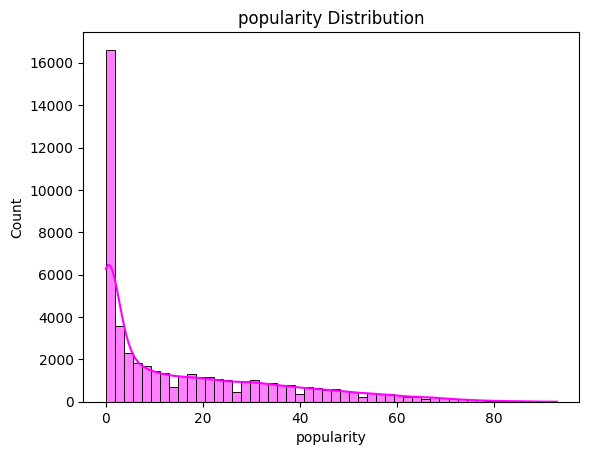


2. Analysing acousticness
Central Tendency of acousticness:
   Mean acousticness: 0.35
   Median acousticness: 0.26
   Mode acousticness: [0.164]

   acousticness Description:
count    49234.000000
mean         0.352189
std          0.320066
min         -1.000000
25%          0.055000
50%          0.260000
75%          0.625000
max          0.996000
Name: acousticness, dtype: float64

   Kurtosis of acousticness: -0.9300
   Skewness of acousticness: 0.4828



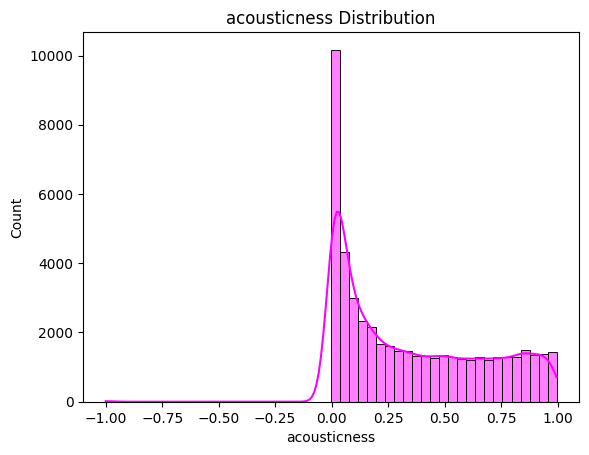


3. Analysing danceability
Central Tendency of danceability:
   Mean danceability: 0.59
   Median danceability: 0.63
   Mode danceability: [0.708]

   danceability Description:
count    49234.000000
mean         0.590449
std          0.190964
min         -1.000000
25%          0.488000
50%          0.627000
75%          0.726000
max          0.979000
Name: danceability, dtype: float64

   Kurtosis of danceability: 3.1743
   Skewness of danceability: -1.1007



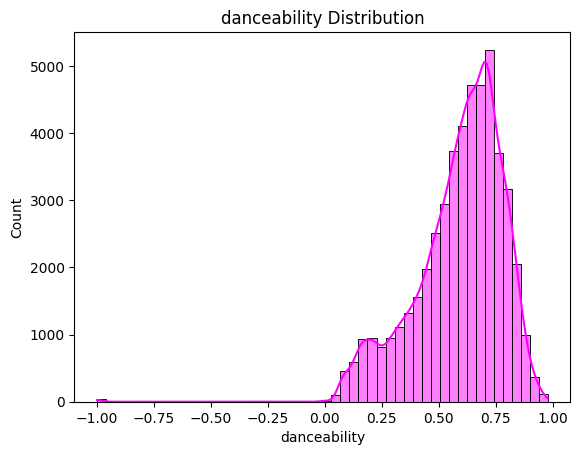


4. Analysing duration_min
Central Tendency of duration_min:
   Mean duration_min: 3.89
   Median duration_min: 3.81
   Mode duration_min: [3.8771166666666668]

   duration_min Description:
count    49234.000000
mean         3.891254
std          1.708615
min          0.083333
25%          3.147783
50%          3.813117
75%          4.611767
max         76.358050
Name: duration_min, dtype: float64

   Kurtosis of duration_min: 313.2476
   Skewness of duration_min: 10.2917



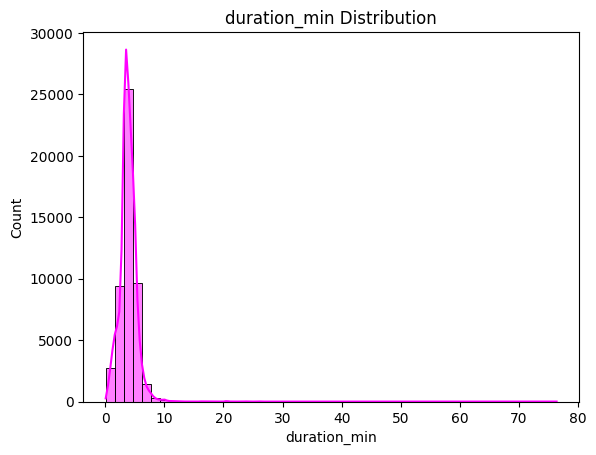


5. Analysing energy
Central Tendency of energy:
   Mean energy: 0.60
   Median energy: 0.65
   Mode energy: [0.65]

   energy Description:
count    49234.000000
mean         0.601245
std          0.252940
min         -1.000000
25%          0.434000
50%          0.645000
75%          0.807000
max          1.000000
Name: energy, dtype: float64

   Kurtosis of energy: 0.4354
   Skewness of energy: -0.7100



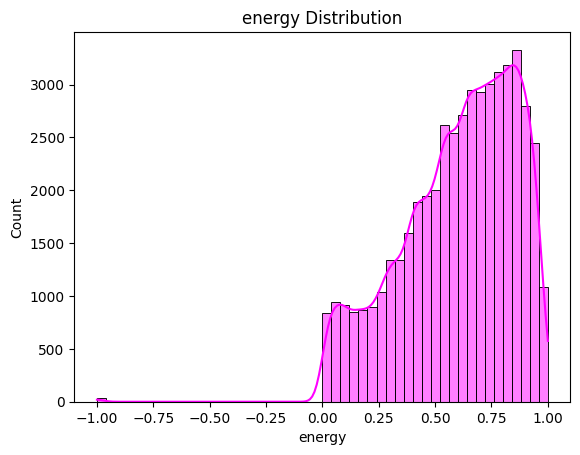


6. Analysing instrumentalness
Central Tendency of instrumentalness:
   Mean instrumentalness: 0.16
   Median instrumentalness: 0.00
   Mode instrumentalness: [0.0]

   instrumentalness Description:
count    49234.000000
mean         0.163804
std          0.322999
min         -1.000000
25%          0.000000
50%          0.000025
75%          0.036500
max          0.999000
Name: instrumentalness, dtype: float64

   Kurtosis of instrumentalness: 0.9434
   Skewness of instrumentalness: 1.5870



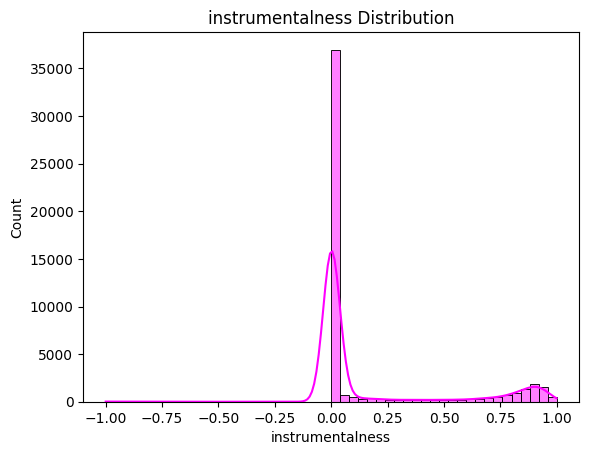


7. Analysing liveness
Central Tendency of liveness:
   Mean liveness: 0.20
   Median liveness: 0.13
   Mode liveness: [0.11]

   liveness Description:
count    49234.000000
mean         0.199487
std          0.179562
min         -1.000000
25%          0.094000
50%          0.126000
75%          0.253000
max          0.998000
Name: liveness, dtype: float64

   Kurtosis of liveness: 6.3419
   Skewness of liveness: 1.9444



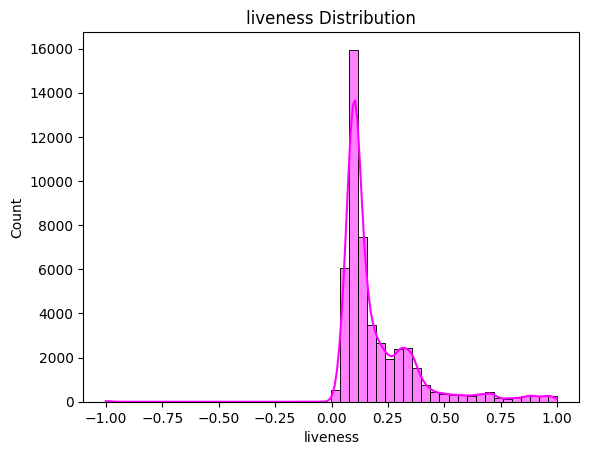


8. Analysing speechiness
Central Tendency of speechiness:
   Mean speechiness: 0.09
   Median speechiness: 0.05
   Mode speechiness: [0.0419]

   speechiness Description:
count    49234.000000
mean         0.089396
std          0.122485
min         -1.000000
25%          0.037000
50%          0.048600
75%          0.089100
max          0.959000
Name: speechiness, dtype: float64

   Kurtosis of speechiness: 26.2989
   Skewness of speechiness: 3.6164



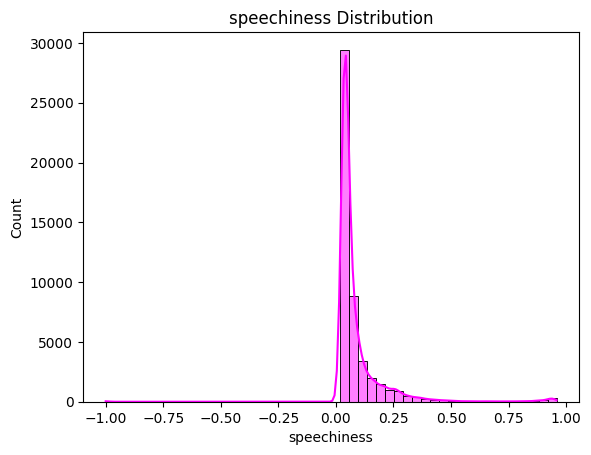


9. Analysing tempo
Central Tendency of tempo:
   Mean tempo: 117.99
   Median tempo: 118.17
   Mode tempo: [90.015]

   tempo Description:
count    49234.000000
mean       117.986141
std         28.596865
min         -1.000000
25%         95.999000
50%        118.167000
75%        135.026750
max        232.198000
Name: tempo, dtype: float64

   Kurtosis of tempo: 0.0038
   Skewness of tempo: 0.3107



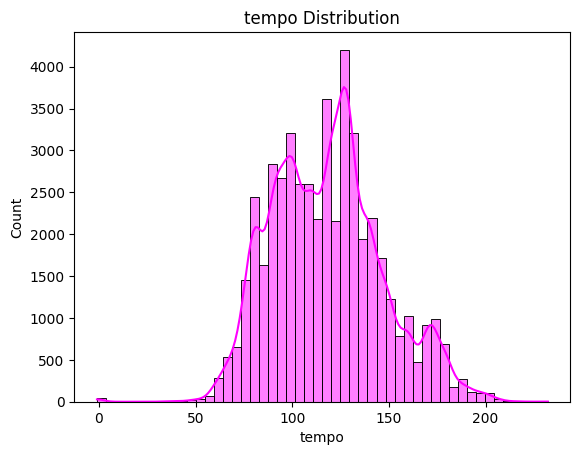


10. Analysing valence
Central Tendency of valence:
   Mean valence: 0.49
   Median valence: 0.50
   Mode valence: [0.758]

   valence Description:
count    49234.000000
mean         0.486379
std          0.267806
min         -1.000000
25%          0.282000
50%          0.497000
75%          0.702000
max          0.995000
Name: valence, dtype: float64

   Kurtosis of valence: -0.4454
   Skewness of valence: -0.2069



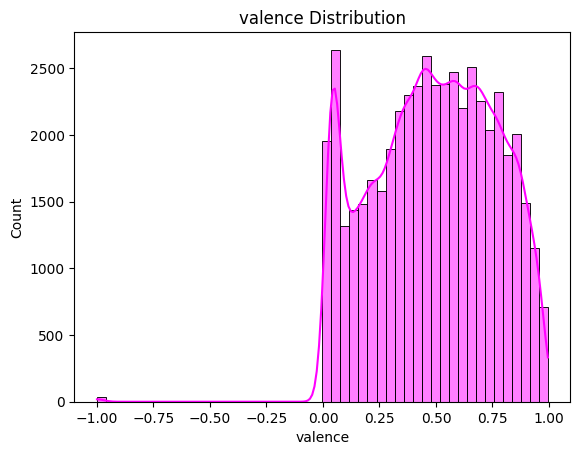


11. Analysing loudness
Central Tendency of loudness:
   Mean loudness: -80.07
   Median loudness: -7.31
   Mode loudness: [-8.999, -6.046]

   loudness Description:
count     49234.000000
mean        -80.067304
std        2665.099328
min     -100000.000000
25%         -10.819000
50%          -7.313500
75%          -5.289000
max           0.894000
Name: loudness, dtype: float64

   Kurtosis of loudness: 1401.8163
   Skewness of loudness: -37.4667



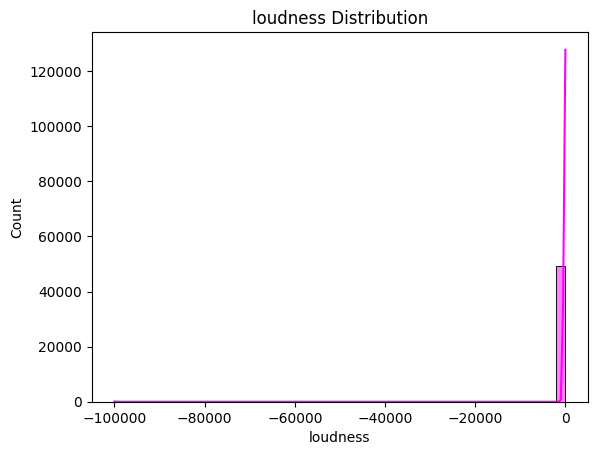


12. Analysing mode
Central Tendency of mode:
   Mean mode: 0.58
   Median mode: 1.00
   Mode mode: [1.0]

   mode Description:
count    49234.000000
mean         0.578300
std          0.495274
min         -1.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mode, dtype: float64

   Kurtosis of mode: -1.8412
   Skewness of mode: -0.3347



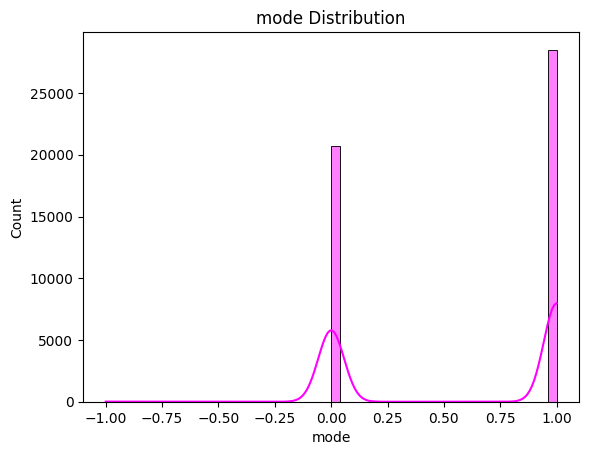

In [ ]:
colsToAnalyse=['popularity' , 'acousticness' , 'danceability' , 'duration_min' ,'energy' , 'instrumentalness' , 'liveness', 'speechiness', 'tempo', 'valence','loudness','mode']
i=1
for col in colsToAnalyse:
  #Statistical analysis
  print(f'{i}. Analysing {col}')
  print(f"Central Tendency of {col}:")
  print(f"   Mean {col}: {df[col].mean():.2f}")
  print(f"   Median {col}: {df[col].median():.2f}")
  print(f"   Mode {col}: {df[col].mode().tolist()}") # .mode() can return multiple if equally frequent
  print(f"\n   {col} Description:")
  print(df[col].describe())
  print(f"\n   Kurtosis of {col}: {df[col].kurtosis():.4f}")
  print(f"   Skewness of {col}: {df[col].skew():.4f}")
  print()
  i+=1
  #Visualisation with Histplots
  sns.histplot(data=df, x=col, kde=True,bins=50, color='magenta', edgecolor='black')
  plt.title(f'{col} Distribution')
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  plt.xticks(rotation = 0)
  plt.grid(False)
  plt.show()
  print()

**INTERPRETATION**

**1. Popularity**

The analysis of the 'popularity' variable clearly shows a highly skewed distribution, which is typical for real-world consumption data.
 The Mean is heavily inflated by the few highly popular tracks in the dataset's tail. The Median provides a much more robust measure of "typical" popularity, indicating that 50\% of all tracks have a popularity score of 8 or less. ​

Variability and Data Spread ​The standard deviation and quartiles show the wide range of track popularity: ​High Variability: The Standard Deviation is 19.08, which is higher than the Mean (16.18). This high variability confirms that popularity is highly inconsistent across the dataset; the average track is not a good representation of a typical track.
  
 ​Quartile Distribution: The spread is concentrated at the low end: ​75\% of the tracks have a popularity of 28 or less. ​This means that the top 25\% of songs are driving the entire upper range, including the hits up to 93.
   
​"Popularity is Highly Skewed: Hits are Rare. The analysis of the 'popularity' variable immediately reveals a classic 'long-tail' distribution, characterized by extreme positive skew (1.17). The overwhelming finding is that the vast majority of tracks in the dataset have very low popularity.
   
 The Mode is 0, indicating the most frequent score, and the histogram confirms a massive concentration of tracks near this minimum.The difference between the measures of central tendency is stark and informative: the Mean Popularity is 16.18, but the Median is only 8.00. This 50% difference confirms the Mean is inflated by a small number of extremely popular songs. The typical track in this dataset has a popularity of 8 or less." ​"Furthermore, the high standard deviation (19.08) relative to the mean shows that track success is highly variable and unpredictable. Only the top quartile of songs (those above a score of 28) contribute significantly to the overall high-end of popularity (up to 93)."

 **2. Acousticness:**

Preference for Produced Music: The distribution is heavily clustered at the low end (near 0.0), confirmed by the low Median (0.26) and Mode (0.164). This indicates that the dataset is dominated by non-acoustic, digitally produced, or amplified music.

 ​Presence of Acoustic Genre: The long tail extending toward 1.0 suggests a small but significant number of tracks are highly acoustic, potentially representing genres like folk, classical, or unplugged recordings.

**3. Danceability:**

High Danceability Preference: The dataset is heavily biased towards highly danceable tracks. The Mode (0.708) and the strongly negative skew indicate a high concentration of songs with great rhythmic stability and tempo.

​Above-Average Rhythm: With the Mean (0.59) and Median (0.63) both well above the mid-point of 0.5, it's clear the collection of music is primarily designed for movement.

**4. Duration:**

Standardized Track Length: The vast majority of tracks are tightly clustered between 3 and 5 minutes. The Mean (3.89 min) and Median (3.81 min) are very close, indicating a strong central tendency around the industry standard length for a pop/radio song.

​Outlier Influence (Extreme Skew): The extreme positive skew (10.29) and the long tail extending to Maximum 7.36 minutes show that while the core data is tight, there are very long tracks (e.g., classical pieces, long jams, or podcast episodes) that heavily pull the Mean up. The high Kurtosis (not shown but implied by the visual peak) confirms the "needle-like" concentration around the mode.

**5. Energy:**

Dominance of Upbeat Music: Similar to danceability, the distribution for 'energy' is significantly skewed toward the high end (near 1.0). The Median (0.65) and Mean (0.60) being well above the mid-point of 0.5 demonstrates that the vast majority of music in the dataset is fast, loud, and active. ​Low Energy is Rare: There is a relatively sharp drop-off of tracks below an energy score of 0, suggesting that very calm, ambient, or slow songs are underrepresented.

**6. Instrumentalness:**

Vocal Dominance: The most striking finding is the extreme concentration of tracks with virtually no instrumental content. The Mode and Median are both 0, and 75% of all tracks have an instrumentalness score of only 0.0365 or less. This heavily suggests the dataset is dominated by vocal-centric popular music.  

 Niche Genre: The high positive skew and long tail extending to 0.999 indicate that purely instrumental music (such as classical, electronic, or film scores) is a small, niche category within the dataset.

 **7. Liveness:**

Studio Recording Dominance: The distribution is highly concentrated near 0, with the Median (0.13) and Mean (0.20) both very low. This suggests the vast majority of tracks are studio-recorded and heavily produced, not live performances.

 Low Threshold for Live Music: Liveness scores above 0.8 are typically considered "live." The steep drop-off above 0.35 confirms that tracks detected as genuinely live performances are extremely rare in this sample. ​

 **8. Speechiness:**

Focus on Sung Vocals: The distribution is extremely peaked at close to zero, with a massive cluster having a speechiness score of 0.05 or less. This indicates that the dataset is almost entirely composed of music with sung vocals, not spoken word (like podcasts, audiobooks, or rap/spoken-word poetry, which typically have scores above 0.33). ​Rarity of Spoken Content: The extremely high skew (3.61) and high Kurtosis (implied by the sharp peak) confirm that tracks with significant speech content are exceptional outliers.

**9. Tempo(BPM):**

Bimodal Tendency (or Strong Peaks): Unlike the other features, the 'tempo' distribution is complex and suggests the presence of multiple distinct musical styles. While the overall mean is near 118 BPM, the graph clearly shows a strong peak around 90 BPM (the Mode) and another strong peak around 120-130 BPM.

​Moderate Tempo Dominance: The distribution is relatively centered between 90 and 130 BPM, indicating a clear preference for moderate to mid-tempo tracks (typical of pop, rock, and dance music). The near-zero skew confirms that the tempos are evenly spread around the center.

**10. Valence (Positivity):**

Neutral Emotional Center: The Mean (0.49) and Median (0.50) are almost identical and centered around the 0.5 mark. This suggests that, on average, the emotional character of all music in the dataset is neutral (equally balanced between positive and negative moods). ​Bias Towards Positivity (Mode): Despite the neutral center, the Mode (0.758) and the shape of the distribution show a higher frequency of positive tracks than negative ones, with a notable peak in the upper-positive range (e.g., cheerful, euphoric, or happy music).

**11. Loudness**

 ​High Commercial Loudness: By focusing on the robust Median (-7.31 dB) and the 75th Percentile (-5.29 dB), it's clear the core of the dataset consists of highly compressed and mastered music. This range is typical for modern commercial pop, rock, and dance tracks, designed for high-impact streaming.

 ​Concentration: The distribution plot shows a vast majority of tracks clustered in a small, tight range near 0 dB (after ignoring the extreme negative outlier on the left), confirming that most music adheres to modern loudness standards.

**12. Mode**

Major Key Dominance: Tracks in the Major key (Mode = 1) are more prevalent than those in the Minor key (Mode= 0). The Mode is 1.0, and the visual distribution shows the count at 1.0 is substantially higher than the count at 0.0.

 ​Preference for 'Happy' Moods: Since Major keys are generally associated with positive, happy, or triumphant feelings, this dominance aligns with the earlier finding that 'valence' (positivity) also tends to be clustered in the higher ranges. This suggests a consumer preference for upbeat emotional content.

**Popularity Analysis**

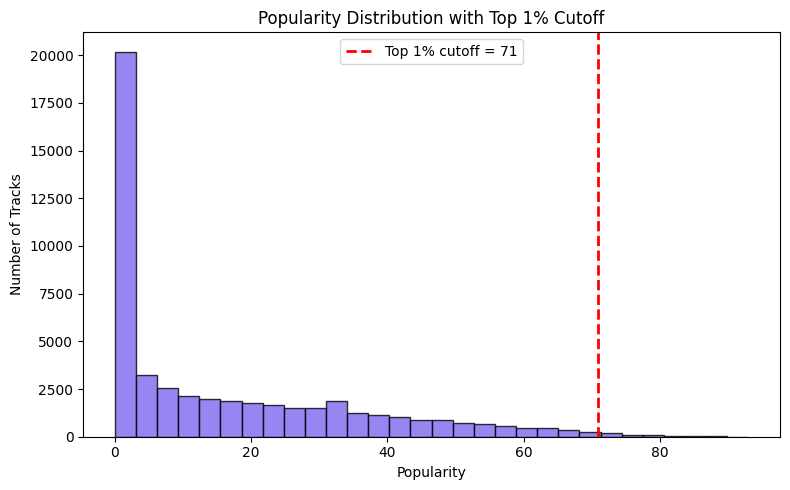

In [ ]:
# Extract popularity
pop = pd.to_numeric(df["popularity"], errors="coerce").dropna()

# Top 1% cutoff
n = len(pop)
k1 = max(1, int(np.floor(n * 0.01)))
cutoff = pop.sort_values(ascending=False).iloc[k1 - 1]

# Plot histogram with cutoff line
plt.figure(figsize=(8,5))
plt.hist(pop, bins=30, color="#7B68EE", edgecolor="black", alpha=0.8)
plt.axvline(cutoff, color="red", linestyle="--", linewidth=2,
            label=f"Top 1% cutoff = {cutoff}")
plt.title("Popularity Distribution with Top 1% Cutoff")
plt.xlabel("Popularity")
plt.ylabel("Number of Tracks")
plt.legend()
plt.tight_layout()
plt.show()

 ​ **The Elite Barrier (Top 1% Cutoff)**

 ​The histogram clearly visualizes the massive skew in popularity, and the top 1\% cutoff defines what constitutes a true "hit" in this dataset.

 ​High Barrier to Entry: The Top 1% cutoff is 71. This means that a track needs a popularity score of at least 71 to be considered among the most successful 1 in 100 songs.

​Highly Exclusive Club: Given the high number of tracks clustered near 0, a popularity score of 71 represents an extraordinary achievement, confirming the difficulty of breaking into the elite tier of music succes.
  
​Elite Mean Popularity: The 492 tracks in the Top 1% have a significantly high Mean Popularity of 76.852, highlighting their status as the dataset's undeniable hits.

Total tracks analyzed: 49234
Top 1% count = 492, share of total popularity = 4.75% , mean popularity (top1) = 76.852
Top 5% count = 2461, share of total popularity = 20.18%
Top10% count = 4923, share of total popularity = 35.81%
Mean popularity (rest): 15.563


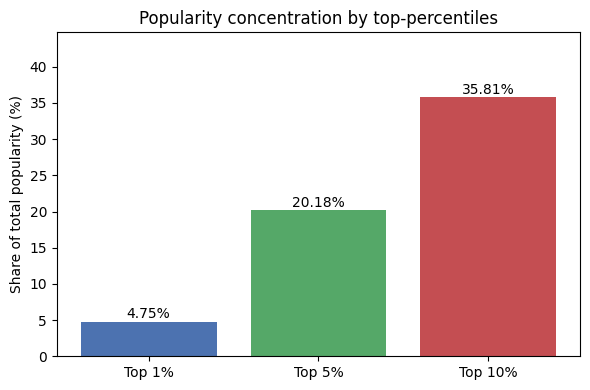

In [ ]:
# Simple Popularity Concentration (Top 1% vs Rest) - minimal & robust
# normalize column names
df.columns = [c.strip().lower().replace(" ", "").replace("-", "") for c in df.columns]

if "popularity" not in df.columns:
    raise SystemExit("Dataset must contain a 'popularity' column.")

# coerce to numeric and drop missing
pop = pd.to_numeric(df["popularity"], errors="coerce").dropna().reset_index(drop=True)
n = len(pop)
if n == 0:
    raise SystemExit("No valid numeric values found in 'popularity' column.")

# percentile counts (ensure at least 1)
k1 = max(1, int(np.floor(n * 0.01)))
k5 = max(1, int(np.floor(n * 0.05)))
k10 = max(1, int(np.floor(n * 0.10)))

# sort descending for top-k selection
sorted_desc = pop.sort_values(ascending=False).reset_index(drop=True)

total_pop = pop.sum()
top1 = sorted_desc.iloc[:k1]
top5 = sorted_desc.iloc[:k5]
top10 = sorted_desc.iloc[:k10]
rest = sorted_desc.iloc[k1:] if n > k1 else pd.Series(dtype=float)

# shares and means
top1_share = top1.sum() / total_pop * 100
top5_share = top5.sum() / total_pop * 100
top10_share = top10.sum() / total_pop * 100

mean_top1 = top1.mean()
mean_rest = rest.mean() if len(rest) > 0 else np.nan

print(f"Total tracks analyzed: {n}")
print(f"Top 1% count = {k1}, share of total popularity = {top1_share:.2f}% , mean popularity (top1) = {mean_top1:.3f}")
print(f"Top 5% count = {k5}, share of total popularity = {top5_share:.2f}%")
print(f"Top10% count = {k10}, share of total popularity = {top10_share:.2f}%")
print(f"Mean popularity (rest): {mean_rest:.3f}")



# --- Bar chart of percentile shares ---
groups = ["Top 1%", "Top 5%", "Top 10%"]
shares = [top1_share, top5_share, top10_share]
plt.figure(figsize=(6,4))
bars = plt.bar(groups, shares, color=["#4C72B0","#55A868","#C44E52"])
for i, v in enumerate(shares):
    plt.text(i, v+0.5, f"{v:.2f}%", ha='center')
plt.ylabel("Share of total popularity (%)")
plt.title("Popularity concentration by top-percentiles")
plt.ylim(0, max(shares)*1.25 if shares else 1)
plt.tight_layout()
plt.show()



Extreme Concentration of Success: ​The bar chart detailing popularity concentration powerfully illustrates the financial and streaming realities of the music industry. ​The 80/20 Rule Applied: ​The Top 1% of tracks (492 songs) account for 4.75% of the total popularity. ​The Top 5% of tracks (2,461 songs) account for 20.18% of the total popularity. ​The Top 10% of tracks (4,923 songs) account for a remarkable 35.81% of the total popularity.

Interpretation of the Long Tail: This finding strongly validates the "long tail" model for digital music consumption:

The Head (The Hits): A disproportionately large share of success is concentrated among a small number of tracks. The top 10% of songs drive over one-third of the total popularity measured in the dataset. ​The Tail (The Rest): Conversely, the remaining 90% of tracks (over 44,000 songs) are left to share the remaining 64.19% of total popularity. Their mean popularity is extremely low (approximately 15.563), demonstrating that most uploaded music receives very little attention.

##**7. EDA- Univariate Analysis of Categorical Variables**

**Visualisation with Donut Chart**

**Proportional Distribution of Languages**

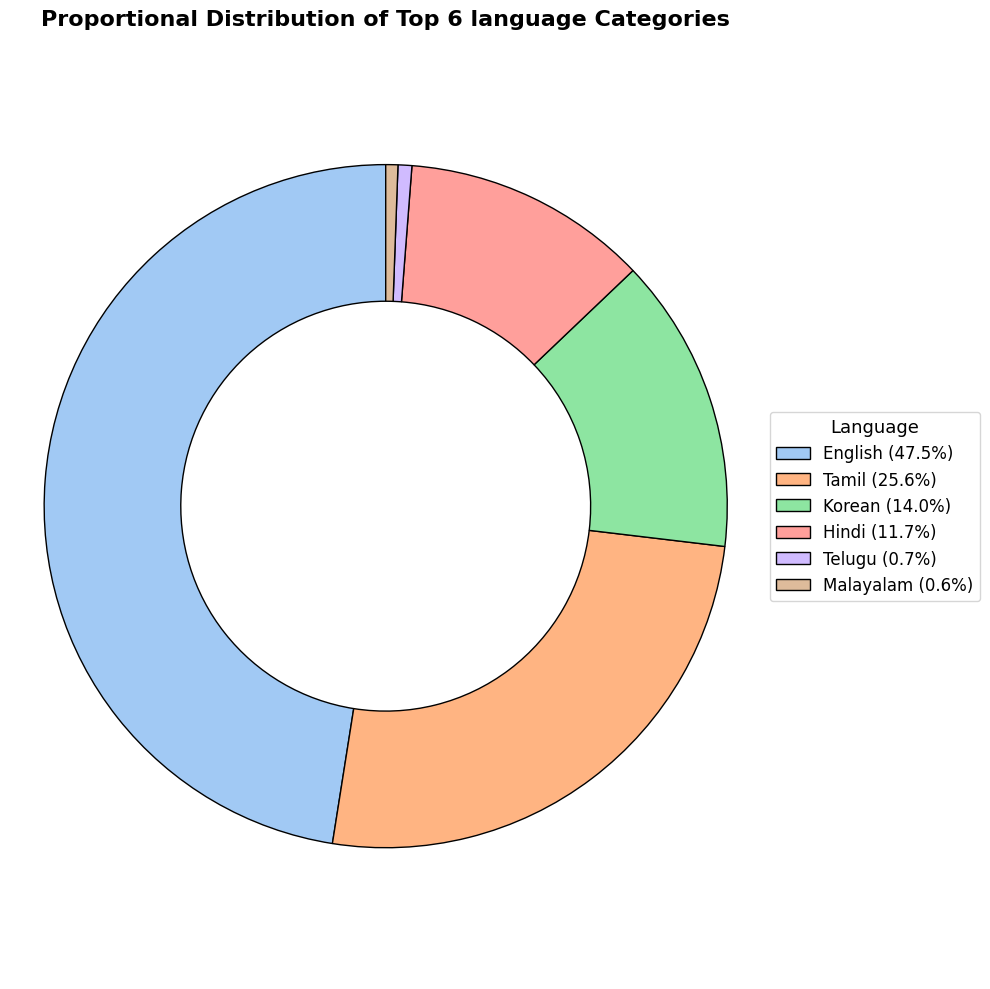

In [ ]:
def plot_categorical_donut_with_legend(dataframe, column_name, n_categories=7, figsize=(10, 10)):
    """
    Generates and displays a donut chart for the top N categories of a specified column,
    using a legend with percentages instead of direct labels to avoid clutter.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the categorical column to plot.
    - n_categories (int): Number of top categories to show, rest grouped as 'Other'.
    - figsize (tuple): Figure size (width, height).
    """
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Value counts
    counts = dataframe[column_name].value_counts()

    # Top categories + Other
    if len(counts) > n_categories:
        top_n = counts.head(n_categories)
        other_sum = counts.iloc[n_categories:].sum()
        plot_data = pd.concat([top_n, pd.Series({'Other': other_sum})]) if other_sum > 0 else top_n
    else:
        plot_data = counts

    # Calculate percentages for legend labels
    total = plot_data.sum()
    percentages = plot_data / total * 100
    legend_labels = [f"{label} ({percent:.1f}%)" for label, percent in zip(plot_data.index, percentages)]

    # Colors
    colors = sns.color_palette('pastel', n_colors=len(plot_data))
    if 'Other' in plot_data.index:
        colors[-1] = 'gray'  # Make 'Other' gray

    # Plot
    fig, ax = plt.subplots(figsize=figsize)

    wedges, _ = ax.pie(
        plot_data,
        labels=None,               # No labels inside
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1)
    )

    # Add legend with percentages
    ax.legend(
        wedges,
        legend_labels,
        title=column_name.capitalize(),
        loc='center left',
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=12,
        title_fontsize=13
    )

    ax.set_title(f'Proportional Distribution of Top {n_categories} {column_name} Categories',
                 fontsize=16, fontweight='bold')
    ax.axis('equal')  # Ensure circular donut
    plt.tight_layout()
    plt.show()

# Example usage
plot_categorical_donut_with_legend(df, 'language', n_categories=6, figsize=(10, 10))

**​Key Insights:**

 ​English Dominance: English is the primary language, representing almost half (47.5%) of the total tracks, confirming its status as the most widely represented language in this specific dataset.

 ​Strong South Asian Presence: The combination of Tamil (25.6%) and Hindi (11.7%) shows a significant representation of South Asian music, collectively accounting for over one-third (37.3%) of the tracks. This suggests dataset may be drawn from a region or platform with high Indian language music consumption.

  ​Global Popularity: Korean music also holds a notable share at 14.0%, likely reflecting the global influence of K-Pop.
  
   ​Minority Languages: Languages like Telugu (0.7%) and Malayalam (0.6%) represent a minimal fraction of the dataset.

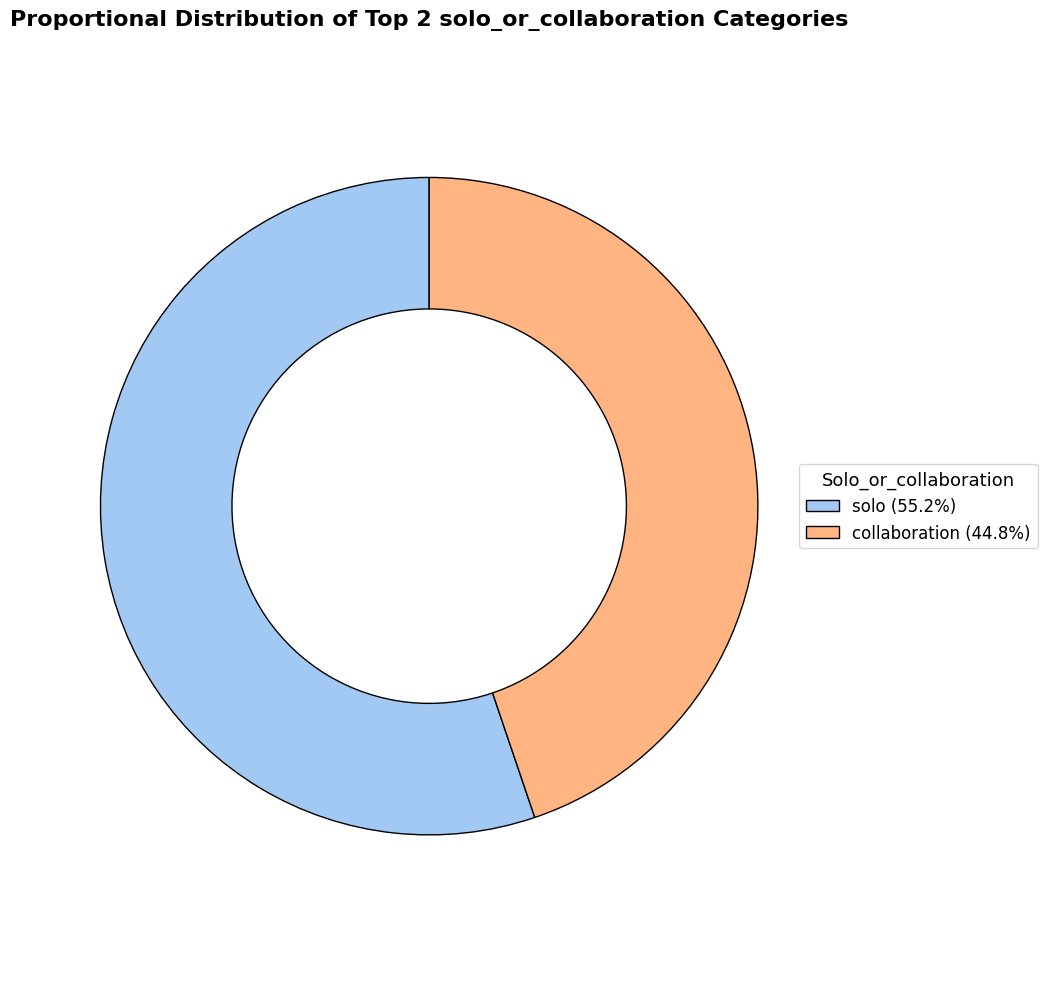

In [ ]:
#Proportional distribution of solos and collaborations
plot_categorical_donut_with_legend(df, 'solo_or_collaboration', n_categories=2, figsize=(10, 10))

**Solo vs. Collaboration :**

 ​Solo Tracks Slightly Edge Out: Tracks made by a single artist (Solo) slightly dominate the dataset, accounting for 55.2%.

  High Collaboration Frequency: Despite the Solo majority, Collaborations are very frequent, making up a substantial 44.8% of all tracks. This high percentage reflects the modern music trend of artists working together, often across different genres or geographies, to pool fanbases and create new sounds.

**Proportional Distribution of Year Groups**

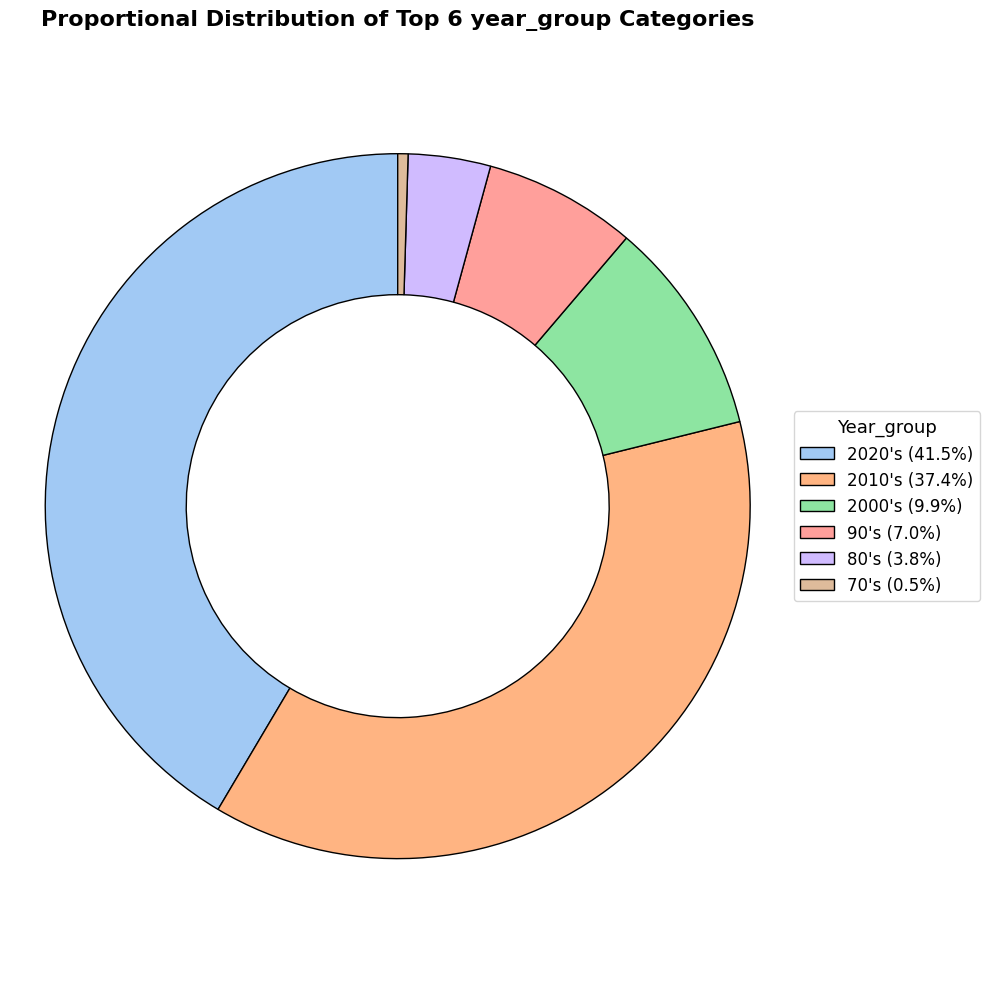

In [ ]:
plot_categorical_donut_with_legend(df, 'year_group', n_categories=6, figsize=(10, 10))

​**Track Distribution by Year Group:**

 ​Heavy Contemporary Bias: The dataset is overwhelmingly dominated by recent music. The 2020s and 2010s collectively account for 78.9% of all tracks (41.5% + 37.4%). This suggests the catalog is heavily focused on current or modern popular releases. ​Rapid Decline in Older Music: The share of music drops off rapidly before the year 2000. Tracks from the 80s and 70s combined make up a mere 4.3\% of the dataset, indicating that older music is severely underrepresented compared to the last two decades. ​The 2000s Bridge: The 2000s (9.9%) act as a clear transition period, marking the significant surge in track volume seen in the subsequent decades.

##**8. Bivariate Analysis- Numerical vs Numerical**

**Analysis with JointPlots**

1. Analysing acousticness


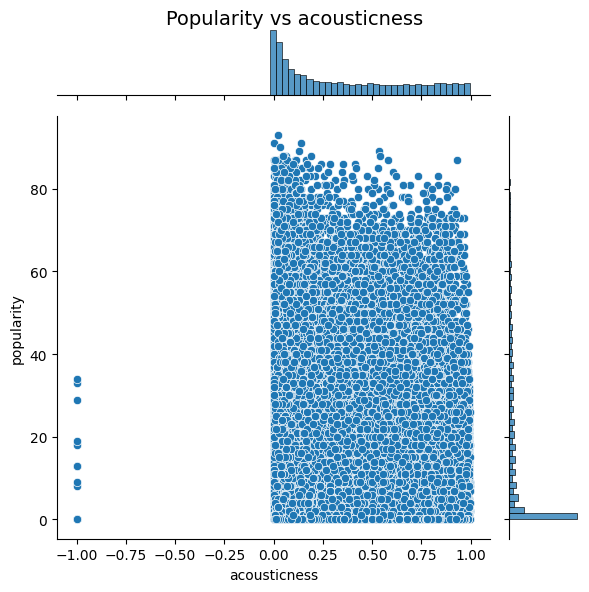

2. Analysing danceability


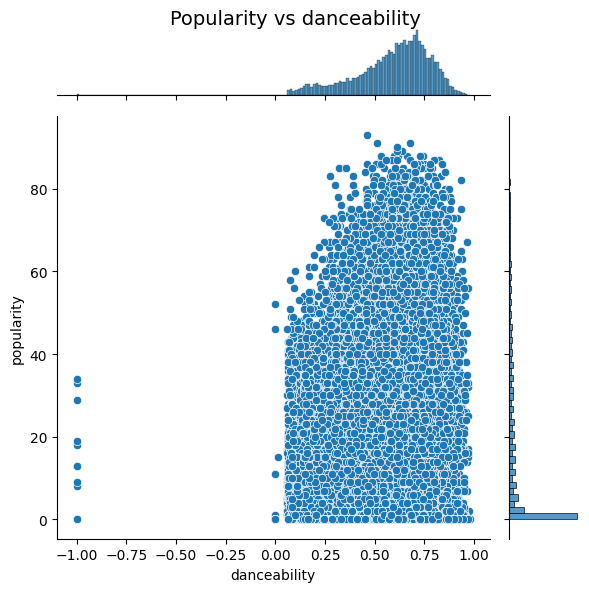

3. Analysing duration_min


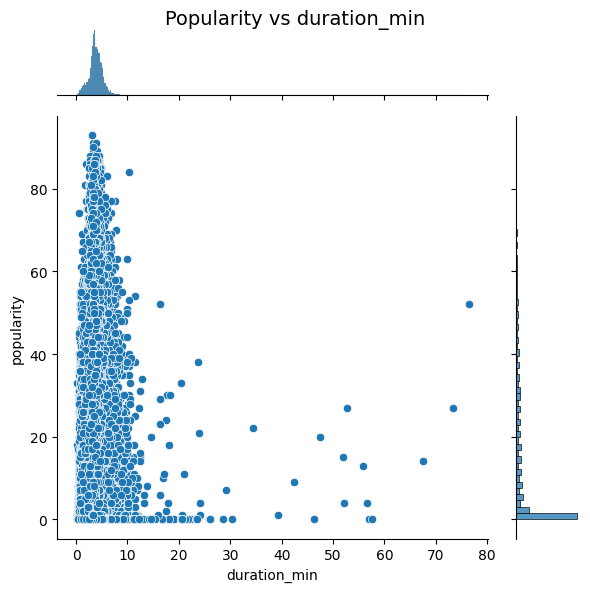

4. Analysing energy


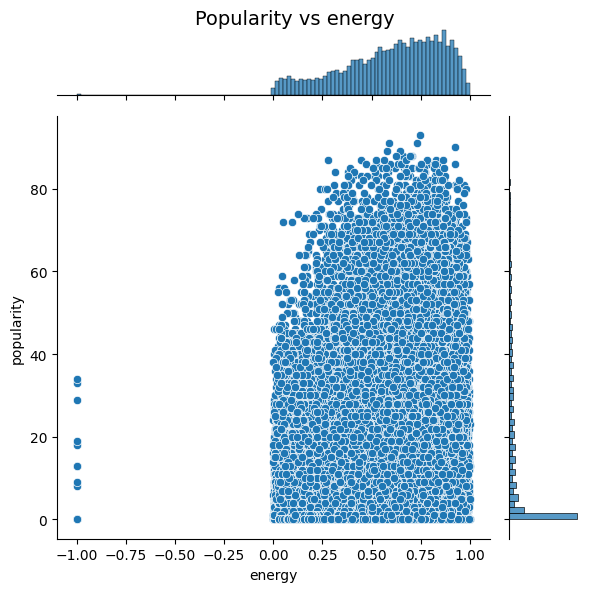

5. Analysing instrumentalness


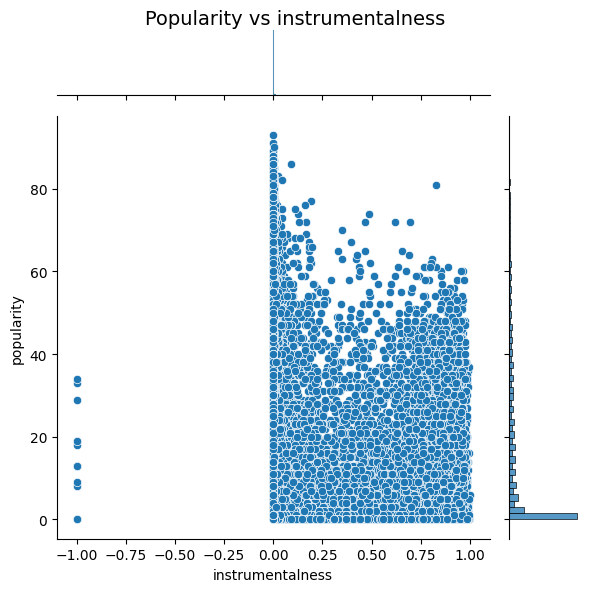

6. Analysing liveness


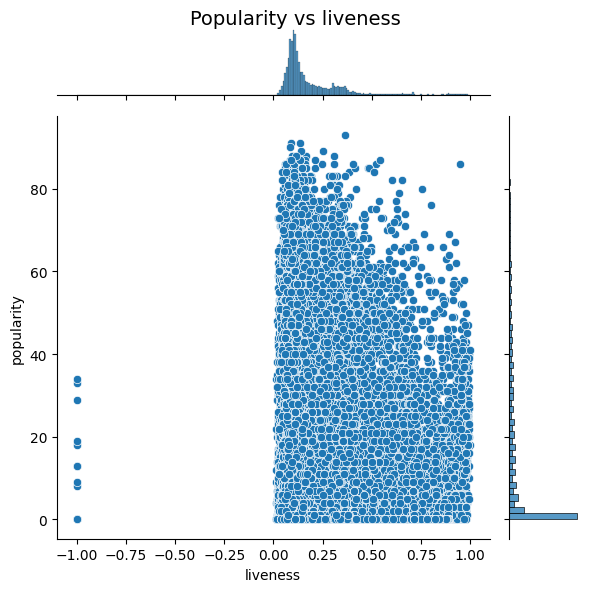

7. Analysing speechiness


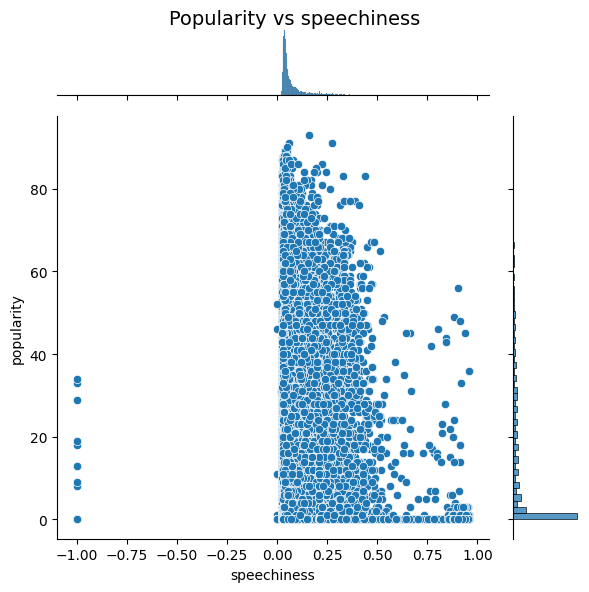

8. Analysing tempo


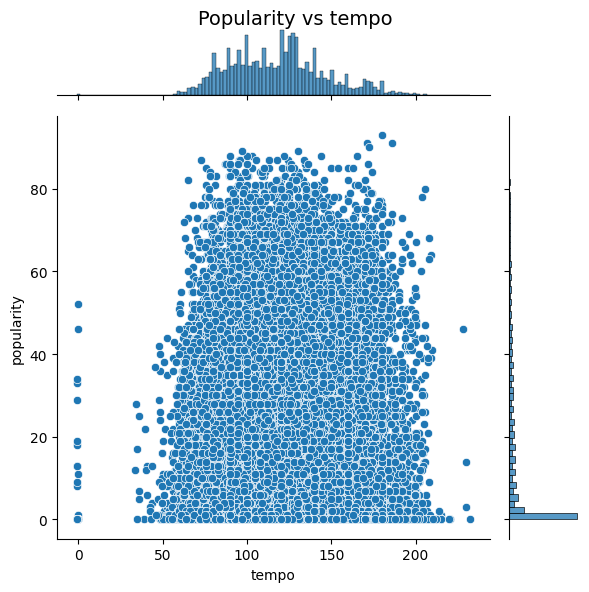

9. Analysing valence


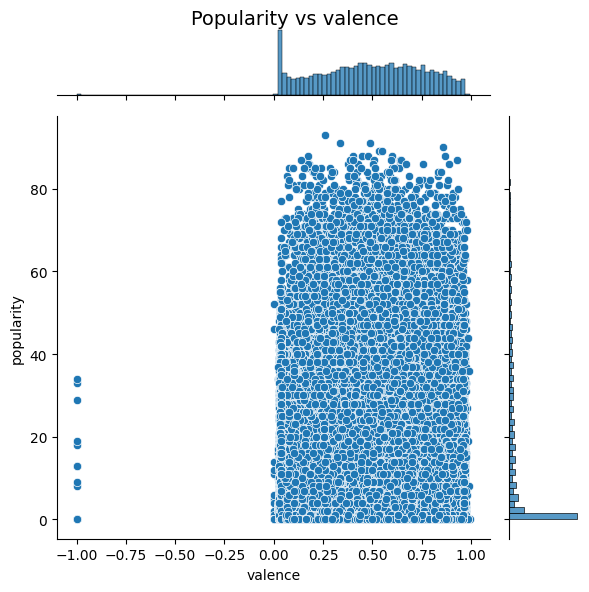

In [ ]:
colsToAnalyse=['acousticness' , 'danceability' , 'duration_min' ,'energy' , 'instrumentalness' , 'liveness', 'speechiness', 'tempo', 'valence']

i=1
for col in colsToAnalyse:
  print(f'{i}. Analysing {col}')
  g = sns.jointplot(x=col, y='popularity', data=df)
  g.fig.suptitle(f'Popularity vs {col}', fontsize=14)  # Set main title
  g.fig.tight_layout()  # Adjust layout
  g.fig.subplots_adjust(top=0.95)  # Prevent title from being cut off
  i+=1
  plt.show()

**1. Popularity vs. Acousticness :**

 The data shows no clear correlation with popularity. High popularity scores ( 80-90) are achieved across the entire acousticness spectrum (0.0 to 1.0). This means that both highly digital, non-acoustic tracks and purely acoustic tracks have the potential to become major hits, indicating that acousticness is genre-dependent rather than a universal barrier or driver of popularity.

 **2. Popularity vs. Danceability ​:**

  There is a strong visual prerequisite for danceability. Tracks with popularity scores above 40 rarely have a danceability score below 0.25. The highest popularity scores ( 85-90) are concentrated in the high danceability range (0.50 to 0.90). This suggests high danceability is a necessary ingredient for achieving breakout success.

**3. Popularity vs. Duration (min) :**

 There is a clear optimal duration window for popularity. The vast majority of popular tracks (popularity > 60) are tightly clustered under 6 minutes. Tracks longer than 10 minutes almost never exceed a popularity score of 25, demonstrating a strong listener preference for short-form content in popular music.

 **4. Popularity vs. Energy :**

  Similar to danceability, high energy is strongly correlated with maximum popularity. Tracks with the highest popularity scores ( 85-90) almost exclusively have an energy score above 0.25. Below 0.25, it is nearly impossible to achieve a popularity score above 60. High energy is a key feature for modern hits.

  **5. Popularity vs. Instrumentalness:**
  
   Instrumentalness is a strong negative factor for maximum popularity. The highest popularity scores (70+) are almost entirely found among less-instrumental tracks (0.0 to 0.25). This suggests that vocals are a necessary component to reach the elite level of success.

   **6. Popularity vs. Liveness:**
   
   The highest popularity scores (80) are predominantly found among tracks with a low liveness score (below 0.30), indicating they are studio recordings. While some moderately popular tracks exist at high liveness scores ( 0.80), live recordings face a lower ceiling for mass popularity compared to polished, studio-produced music.

   **7. Popularity vs. Speechiness:**
   
   There is a clear popularity ceiling for highly spoken-word tracks. While the highest popularity tracks are concentrated at the low end (0.0 to 0.40), tracks with a speechiness score above 0.50 (likely rap, spoken word, or podcast clips) rarely exceed a popularity score of 50 or 60. Sung music is overwhelmingly favored for maximum popularity.

   **8. Popularity vs. Tempo (BPM) :**
   
   Popularity is achieved across a wide but limited tempo range. The highest popularity scores ( 80-90) are concentrated between approximately 80 and 160 BPM, with a slightly denser concentration between 100 and 140 BPM. Tracks with extremely slow (below 50 BPM) or extremely fast (above 200 BPM) tempos have a significantly lower popularity ceiling.

   **9. Popularity vs. Valence (Mood/Positivity)  :**
   
   Popularity is generally achievable across the entire valence spectrum (0.0 to 1.0). However, the data cloud is slightly denser and taller in the high valence (positive mood) range (0.50 to 1.00). This indicates that while sad or dark tracks can be hits, the market may have a slight bias or greater capacity for cheerful, positive music.

**Visualisation with Heatmap**

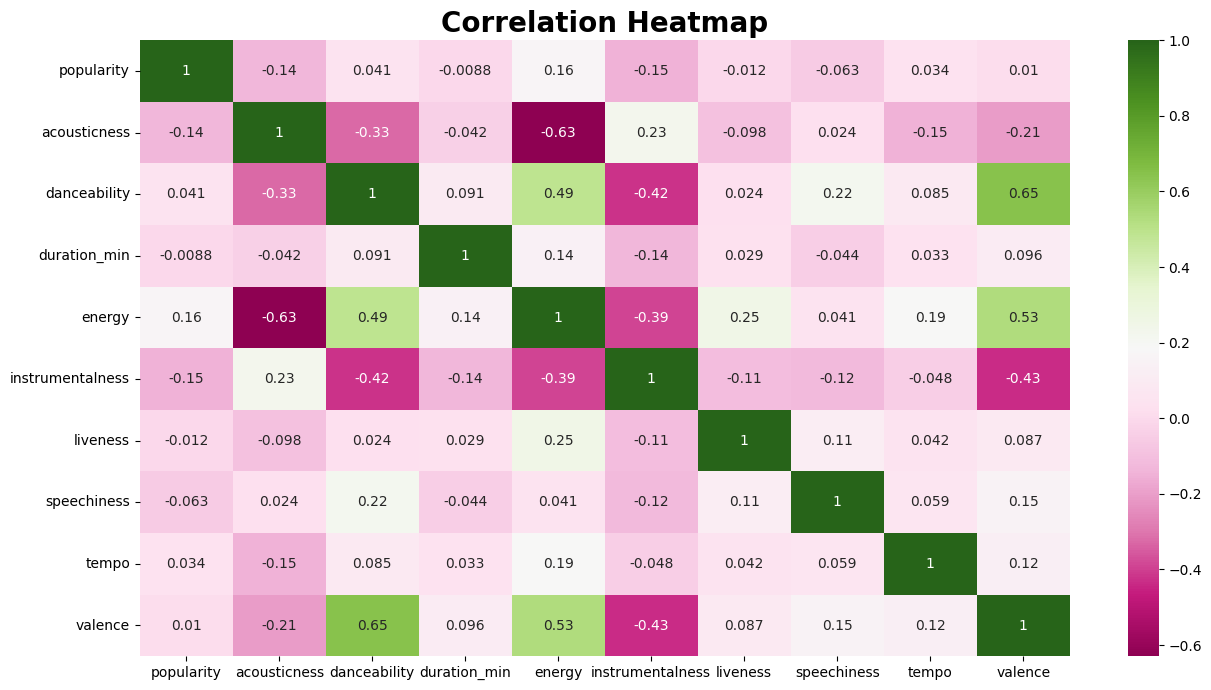

In [ ]:
#Columns to plot in map
columns = ['popularity' , 'acousticness' , 'danceability' , 'duration_min' ,'energy' , 'instrumentalness' , 'liveness', 'speechiness', 'tempo', 'valence']


plt.figure(figsize=(15, 8))
sns.heatmap(df[columns].corr(method='pearson') , annot = True , cmap = 'PiYG')

plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.show()

The correlation heatmap is crucial for understanding what drives (or kills) popularity. Here is the short and to-the-point version: ​

**Key Correlation Insights**

 ​1. Popularity Drivers & Barriers (vs. Popularity) ​These correlations, though weak, indicate linear trends for success:

  ​Primary Driver: Energy (r=0.16) is the strongest positive predictor. Upbeat, intense tracks are slightly more likely to be popular.
  
 ​Primary Barrier: Instrumentalness (r=-0.15) and Acousticness (r=-0.14) are the strongest negative predictors. Music without vocals and organic, non-produced sounds are less likely to be highly popular.

  ​Neutral Factors: Valence (r=0.01) and Duration (r \approx 0.0) have virtually no linear relationship with popularity; hits can be happy or sad, and length is a poor predictor.

 ​2. Strongest Feature Relationships (Feature vs. Feature) ​These show how song characteristics naturally group together:

 ​Dance & Mood Go Together: Danceability and Valence (positivity) have the strongest positive link (r=0.65). Tracks that are easy to dance to are overwhelmingly positive in mood. ​The Production Trade-Off: Energy and Acousticness have the strongest negative link (r=-0.63). High-energy music is rarely acoustic, confirming the divide between modern production and organic sound. ​Instrumental is Low-Mood: Instrumentalness is moderately negative with both Valence (r=-0.43) and Danceability (r=-0.42), suggesting instrumental music tends to be less cheerful or rhythmically simple.

**9.Bivariate Analysis- Numerical vs Numerical**

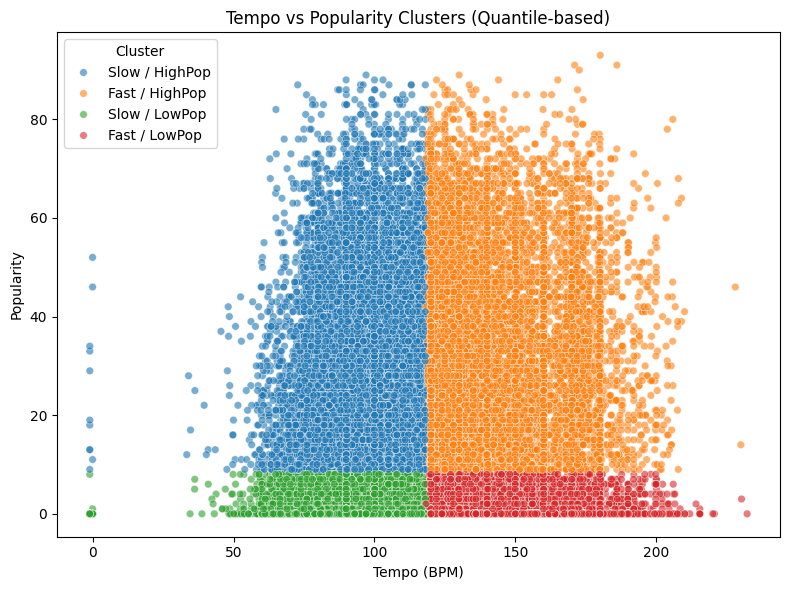

In [ ]:
# Prepare data
data = df[["tempo", "popularity"]].dropna().copy()

# Split into quantile bins
data["tempo_bin"] = pd.qcut(data["tempo"], q=2, labels=["Slow", "Fast"])
data["pop_bin"] = pd.qcut(data["popularity"], q=2, labels=["LowPop", "HighPop"])

# Create combined cluster labels
data["cluster"] = data["tempo_bin"].astype(str) + " / " + data["pop_bin"].astype(str)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x="tempo",
    y="popularity",
    hue="cluster",
    palette="tab10",
    alpha=0.6,
    s=30
)
plt.title("Tempo vs Popularity Clusters (Quantile-based)")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Popularity")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

**Cluster Insights:**

 Tempo vs. Popularity, ​The analysis effectively splits the dataset based on both Tempo (Slow/Fast, likely split around 120-130 BPM) and Popularity (High/Low, likely split around a median/quartile cutoff).

 ​1. High Popularity Clusters (The Hits) ​Tracks with high popularity are generally found in both slow and fast tempos, but the split is revealing: ​Slow/HighPop (Blue Cluster): This cluster represents tracks that achieve success despite having a slower tempo (approximately 60 to 125 BPM). These hits often include genres like ballads, mid-tempo pop, or hip-hop that emphasize rhythm over speed.

  ​Fast/HighPop (No Cluster): Crucially, there is no designated "Fast/HighPop" cluster in this image. The high popularity scores (Popularity > 10) in the faster tempo range (Tempo > 125 BPM) are absorbed into the Fast/LowPop (Orange Cluster). This means that while fast songs can be hits (points exist high up in the orange area), a much larger proportion of the fast songs do not achieve high popularity compared to the slow songs.
  
 ​2. Low Popularity Clusters (The Majority) ​Low popularity is concentrated at both ends of the tempo spectrum: ​

 Fast/LowPop (Orange Cluster): This is the largest cluster in terms of count (volume of data points), occupying the upper range of tempo (approximately 125 to 200 BPM). The density of points is high throughout the low-popularity range (Popularity approx 0-10). This suggests a large volume of fast music is produced that fails to gain traction.

 ​Slow/LowPop (Green Cluster): This cluster represents slow songs that are unpopular. It is clearly the smallest cluster in terms of area/count, occupying a small space at the bottom-left of the plot (Tempo approx 60-125 BPM). This visually suggests that songs in the slow tempo range have a higher overall chance of being popular than fast songs.

  ​Conclusion ​The distribution suggests that low-tempo tracks are a more "efficient" path to popularity in this dataset. While there are popular tracks in both the slow and fast ranges, the Slow/HighPop cluster is more clearly defined and dense than its fast counterpart, and the volume of successful slow songs appears visually balanced against the unsuccessful ones. Conversely, the Fast/LowPop cluster is enormous, showing that high-tempo production is extremely saturated and highly competitive.

##**9. Bivariate Analysis- Numerical vs Categorical**

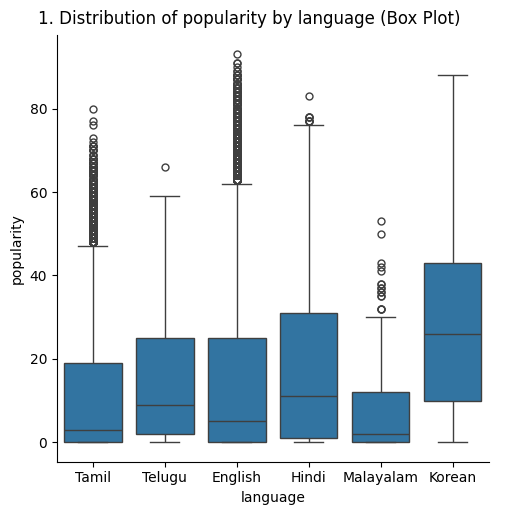

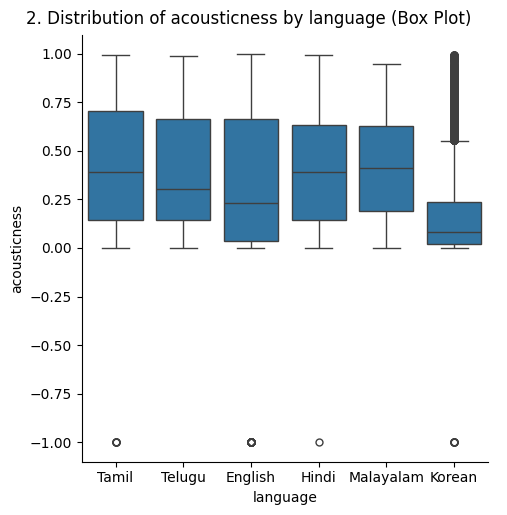

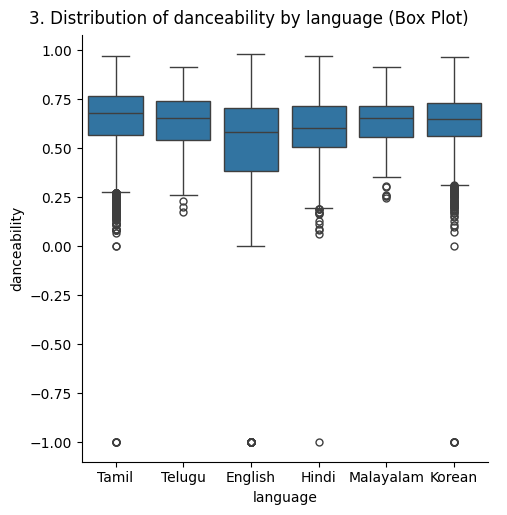

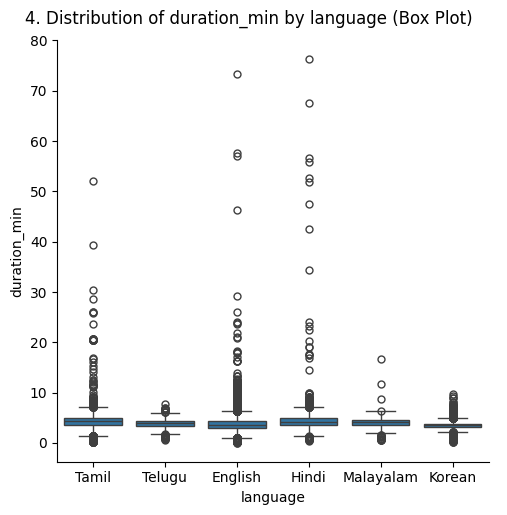

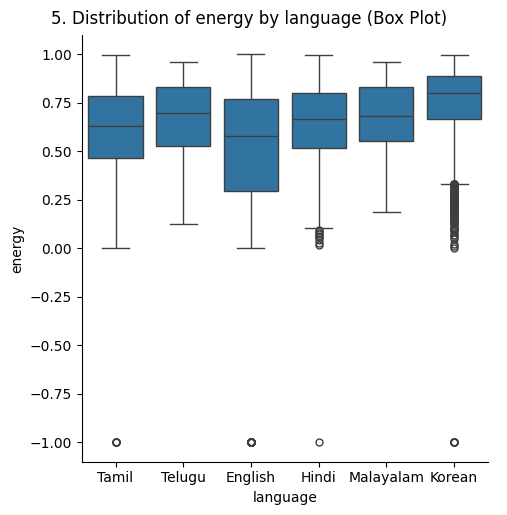

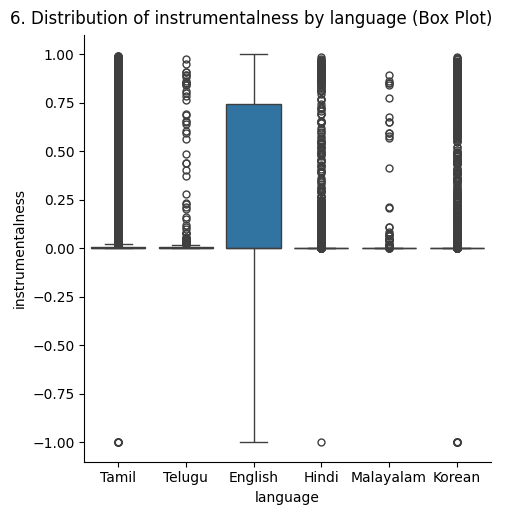

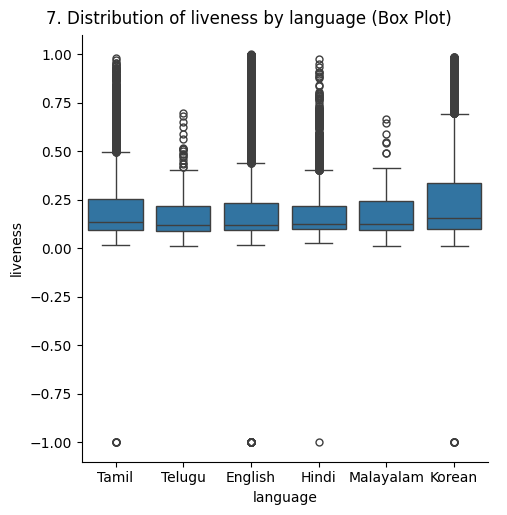

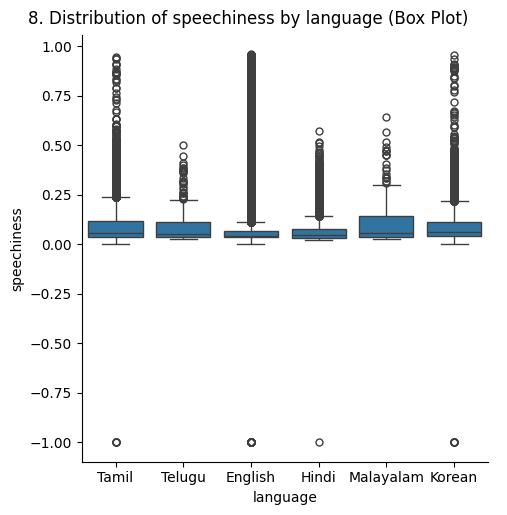

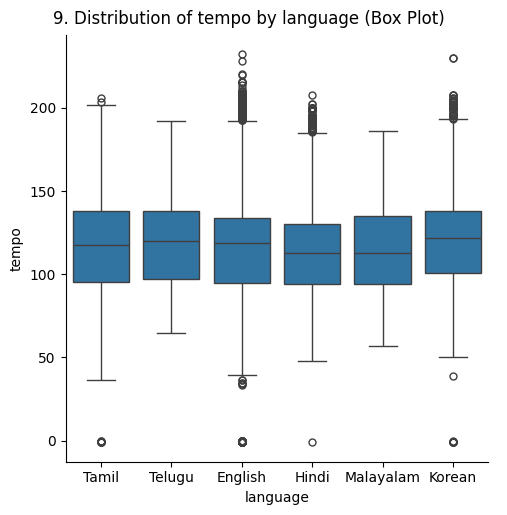

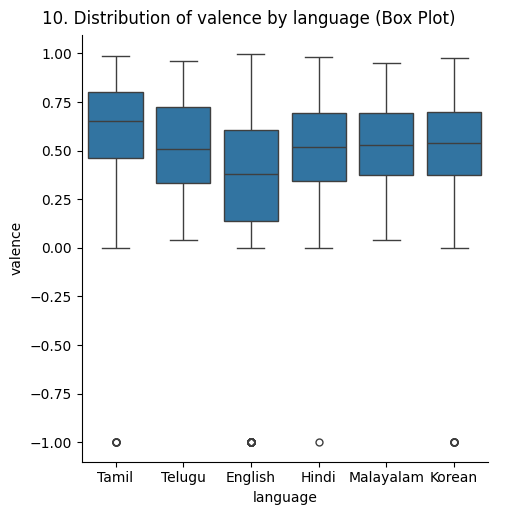

In [ ]:
colsToAnalyse=['popularity','acousticness' , 'danceability' , 'duration_min' ,'energy' , 'instrumentalness' , 'liveness', 'speechiness', 'tempo', 'valence']
i=1
for col in colsToAnalyse:
  sns.catplot(x="language", y=col, data=df, kind="box")
  plt.suptitle(f'{i}. Distribution of {col} by language (Box Plot)', y=1.02)
  i+=1
  plt.show()

**INTERPRETATION**

**1. Popularity by Language :**

English tracks show the highest potential for extreme popularity, as evidenced by the tallest box plot and the highest density of top outliers (approximately 90).

 ​Comparative Median Success: Korean and Hindi tracks have the highest median popularity, indicating that their typical (50th percentile) track is more popular than the median tracks in other languages.

Low Success Floor: Telugu and Malayalam tracks have the lowest popularity floor (25th percentile) and lowest overall median, suggesting tracks in these languages are less likely to achieve high popularity in this dataset.

**​2. Acousticness by Language :**

 Korean music is significantly less acoustic than all other languages. The median acousticness for Korean is near 0.0, and the box is very compressed at the low end. This suggests Korean music in this dataset is overwhelmingly digital and electronically produced. ​Highest Acoustic Scores: Hindi, Malayalam, and Tamil have higher median acousticness (0.35 to 0.40), indicating a greater presence of acoustic instrumentation or less heavily produced sound styles.

**3. and 5. Danceability & Energy by Language:**

Korean : Korean tracks are characterized by the second highest median Danceability and the highest median Energy. This aligns with the previous finding and reinforces that the Korean music in this sample is strongly biased toward upbeat, rhythmically active, and high-intensity sounds (e.g., K-Pop).

**4. Duration by Language :**

The core duration (Median) is remarkably consistent across all languages (4 minutes), confirming the universal standard song length. Hindi and English have the most extreme long outliers (up to approximately 75 minutes), likely due to non-standard music content or genre variations.

**​6. Instrumentalness by Language :**

 English shows the greatest spread of instrumentalness and has the highest presence of tracks in the upper quartiles. This suggests that the English group contains a wider variety of genres, including more instrumental-heavy subgenres (e.g., electronic, ambient, jazz) compared to the other languages, which are mostly clustered near 0.0 (vocal-centric).

**7. Liveness by Language :**

 Tamil and Korean tracks tend to have slightly higher median and upper quartile liveness scores (0.25 to 0.30) compared to the other languages. This may indicate a slightly higher frequency of live recordings or performances captured within those language groups. ​

General Low Liveness: Overall, Liveness remains low across all languages, confirming the general dominance of studio production. ​

**8. Speechiness by Language :**

 While all languages have a low median speechiness (0.05), Tamil, English and Korean show the tallest outliers reaching 1.0 and the highest density of outliers above 0.50. This suggests that tracks with substantial spoken-word content (e.g., rap, podcasts, dialogue) are most commonly found in these two language groups.

**9.Tempo by Language:**

 Tempo is highly consistent across all languages, with the median falling between 100 and 120 BPM. Hindi is slightly slower overall (lower median), while English shows the largest range of high-tempo outliers

 ​General Consistency: All language groups maintain a generally high level of median danceability (0.60) and energy (0.60), but Korean consistently sits at the top quartile​

Vocal Dominance: For all South Asian languages (Tamil, Telugu, Hindi, Malayalam), instrumentalness is tightly clustered at the extreme low end (Median is approximately 0.0), emphasizing their focus on sung vocals.



**10. Valence (Mood) by Language :**

 Tamil tracks exhibit the highest median and upper quartile valence, suggesting a stronger tendency toward positive, cheerful, or happy moods compared to the other languages. ​Neutral-to-Positive: Most other languages have a median valence near 0.50, indicating an overall balance between positive and negative moods, but all show a box extending well into the positive range. But English tracks show a noticeable dip in the lower quartile, indicating a considerable presence of negative songs.

**How Popularity Changes with Mode & Collaboration**

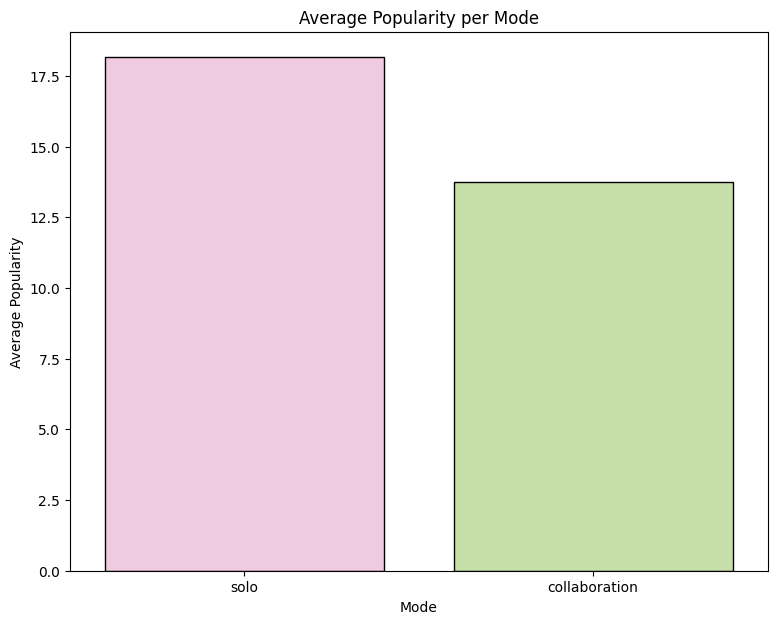

In [ ]:
#Mean popularity per mode
plt.figure(figsize = (9,7))
sns.barplot(df.groupby('solo_or_collaboration')['popularity'].mean().sort_values(ascending=False) ,palette='PiYG', edgecolor = 'black')
plt.title('Average Popularity per Mode')
plt.xlabel('Mode')
plt.ylabel('Average Popularity')
plt.xticks(rotation = 0)
plt.grid(False)
plt.show()

This bar chart compares the average popularity of Solo tracks versus Collaboration tracks. ​Solo Tracks are More Popular: The average popularity of Solo tracks is visually higher (approx 17.8) than the average popularity of Collaboration tracks (approx 13.8).

 ​Contradictory Finding: This contradicts the common industry assumption that collaborations always boost popularity by combining fanbases. In this dataset, tracks by a single artist are, on average, more successful.

 ​Hypothesis: This result suggests that the inclusion of collaborations in this specific dataset may involve many less-popular, niche, or unknown team-ups, bringing the average down. The highly popular tracks are often successful studio singles by a single established artist.

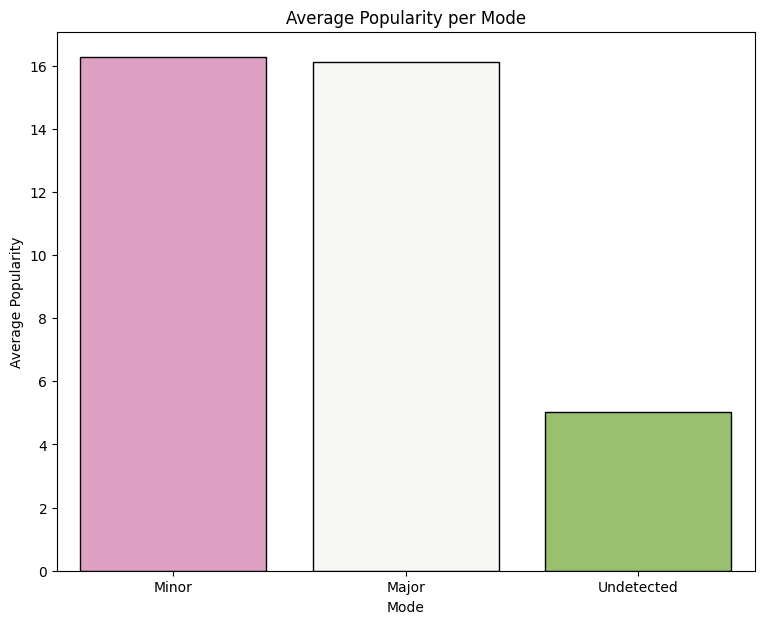

In [ ]:
#Mean popularity per solo or collaboration
plt.figure(figsize = (9,7))
sns.barplot(df.groupby('mode_mapped')['popularity'].mean().sort_values(ascending=False) ,palette='PiYG', edgecolor = 'black')
plt.title('Average Popularity per Mode')
plt.xlabel('Mode')
plt.ylabel('Average Popularity')
plt.xticks(rotation = 0)
plt.grid(False)
plt.show()

This bar chart compares the average popularity of tracks categorized by their musical 'mode' (key: Major, Minor, or Undetected).

 ​The analysis shows that there is no significant difference in average popularity between Major and Minor key tracks, while tracks whose mode could not be detected are much less popular.

​Equal Success for Major and Minor: ​Tracks in a Minor key have the highest average popularity (approx 16.2). ​Tracks in a Major key are almost equally popular (approx 16.0).

 ​Insight: This suggests that the emotional context of the key—whether happy/bright (Major) or sad/dark (Minor)—does not determine average commercial success. Both moods are equally capable of achieving widespread popularity.

 ​Low Popularity for Undetected Mode: ​Tracks with an Undetected mode show a drastically lower average popularity (approx 5.0).

​Insight: "Undetected" mode often points to music that is highly experimental, extremely ambient, lacks a clear harmonic center (atonality), or has poor data quality. This finding indicates that music with unconventional or ambiguous harmonic structure is overwhelmingly unpopular.

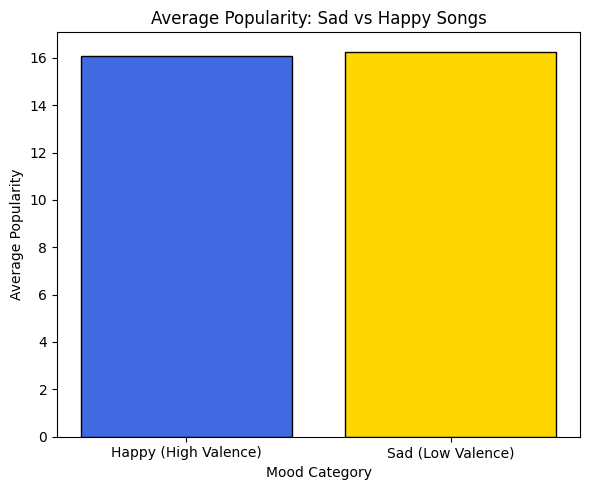

                   mood  popularity
0  Happy (High Valence)   16.087280
1     Sad (Low Valence)   16.262831


In [ ]:
# Ensure valence & popularity are numeric
df["valence"] = pd.to_numeric(df["valence"], errors="coerce")
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")

# Drop missing values and make a copy (fixes the warning)
data = df.dropna(subset=["valence", "popularity"]).copy()

# Classify songs: Sad (valence < 0.5) vs Happy (valence >= 0.5)
data["mood"] = data["valence"].apply(lambda x: "Sad (Low Valence)" if x < 0.5 else "Happy (High Valence)")

# Group by mood and calculate average popularity
mood_popularity = data.groupby("mood")["popularity"].mean().reset_index()

# Plot
plt.figure(figsize=(6,5))
plt.bar(mood_popularity["mood"], mood_popularity["popularity"],
        color=["#4169E1","#FFD700"], edgecolor="black")
plt.title("Average Popularity: Sad vs Happy Songs")
plt.ylabel("Average Popularity")
plt.xlabel("Mood Category")
plt.tight_layout()
plt.show()

print(mood_popularity)

This bar chart compares the average popularity of songs categorized by their 'valence' (mood) into 'Happy' (High Valence) and 'Sad' (Low Valence).

 Insights on Popularity by Song Mood ​The analysis shows a remarkable finding regarding song mood and success: ​Mood is Not a Predictor of Average Popularity: Tracks categorized as Happy (High Valence) have an average popularity of 16.087, while tracks categorized as Sad (Low Valence) have an average popularity of 16.262.

  ​Equal Success: The average popularity is virtually identical across both mood categories. The minuscule difference (Sad songs being slightly, but negligibly, higher) confirms the finding from the correlation heatmap: the emotional tone of a track (positive or negative) does not, on average, determine its level of commercial success.
  
  ​Conclusion: This indicates that the market has an equal appetite for both happy/upbeat and sad/melancholic music; both moods are equally capable of achieving widespread average popularity.

##**10. Multivariate Analysis**

**Languagewise Analysis of Various Numerical Variables over Year Groups**

1. Analysing popularity:


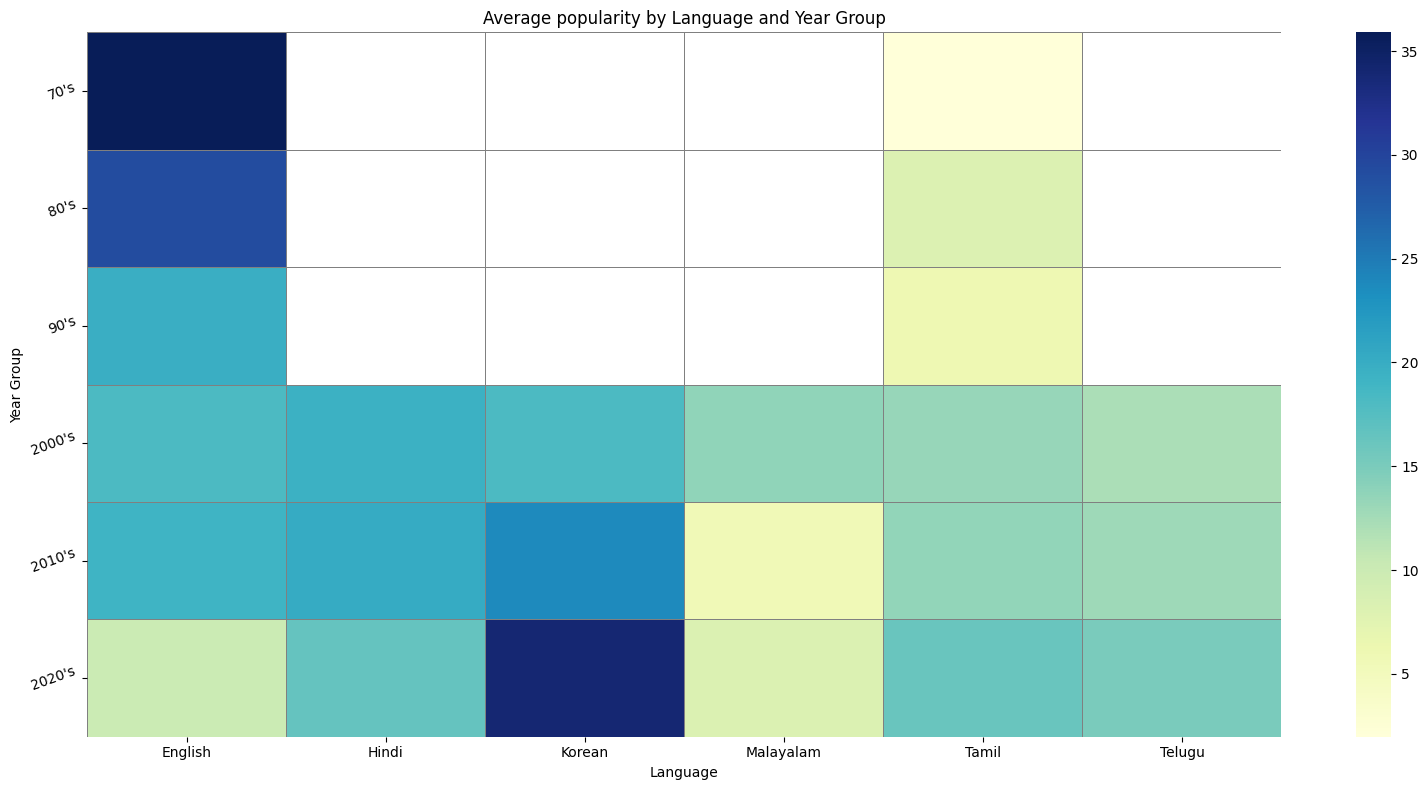

2. Analysing acousticness:


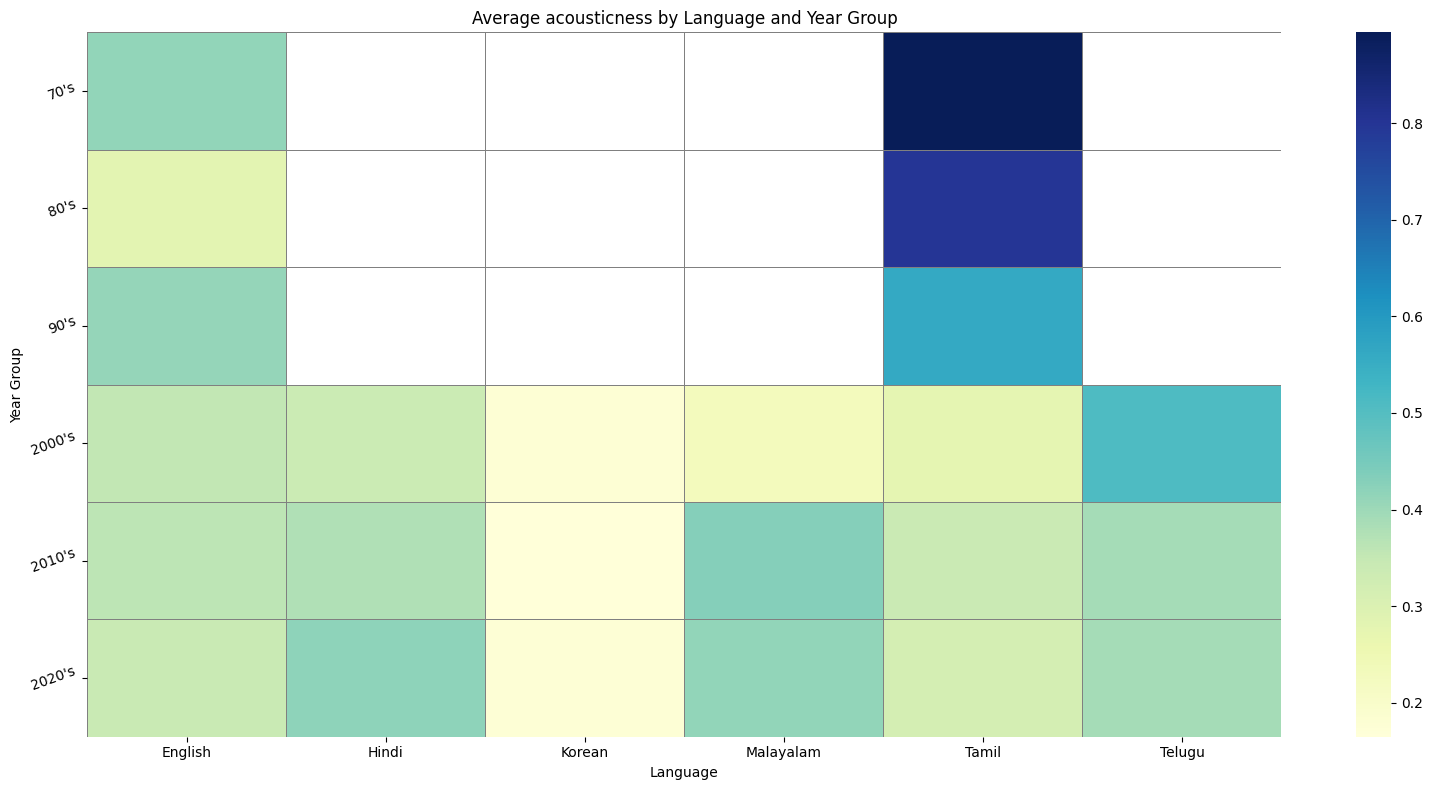

3. Analysing danceability:


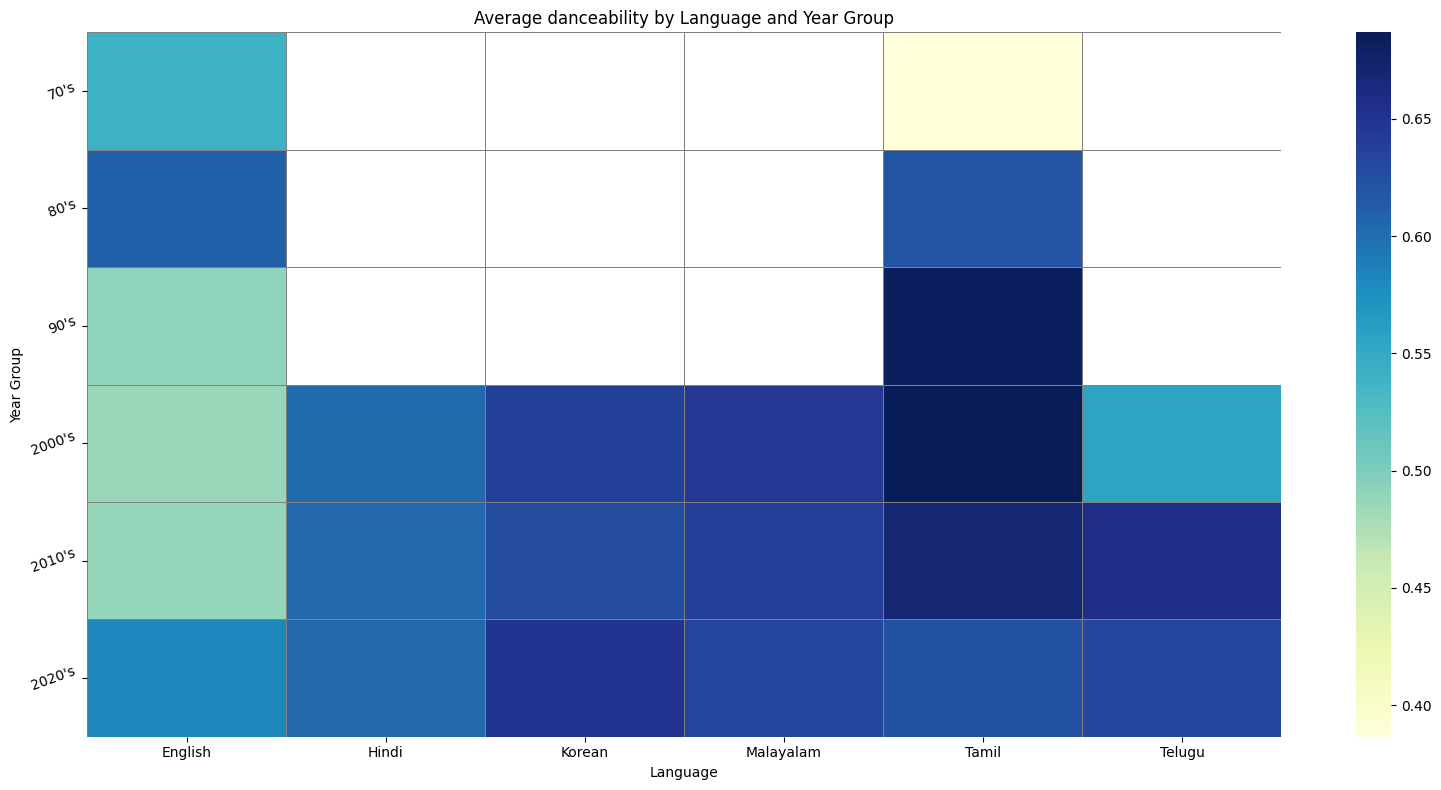

4. Analysing duration_min:


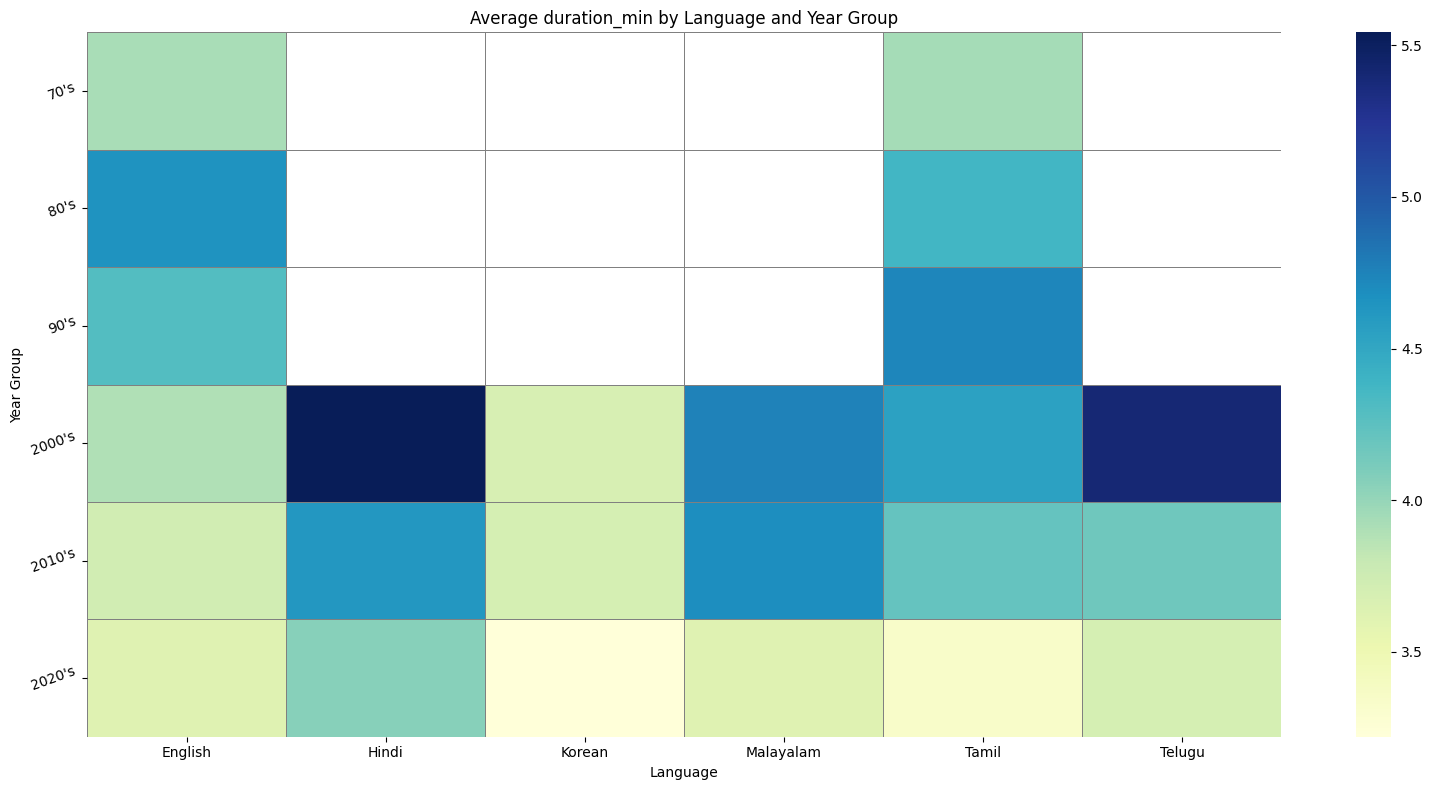

5. Analysing energy:


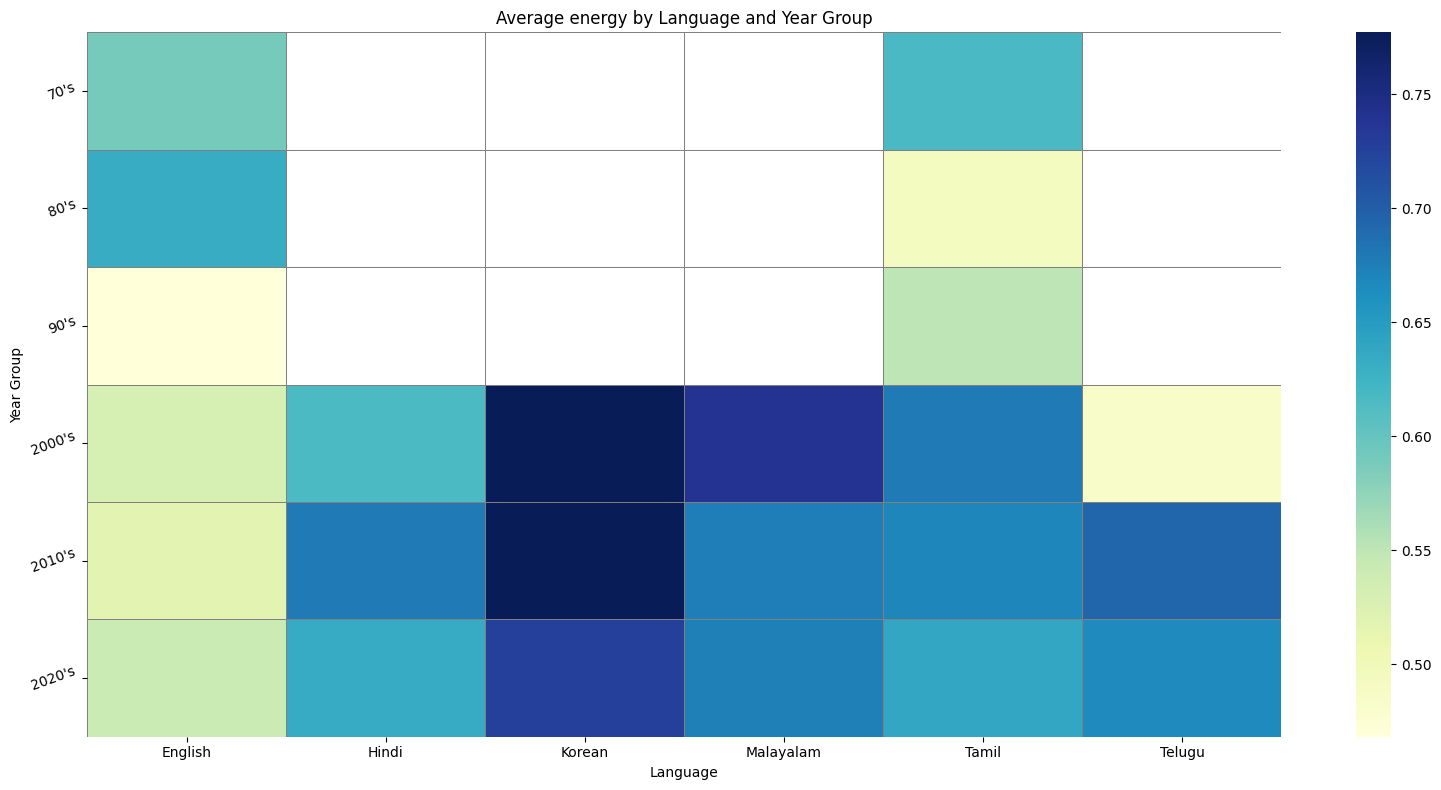

6. Analysing instrumentalness:


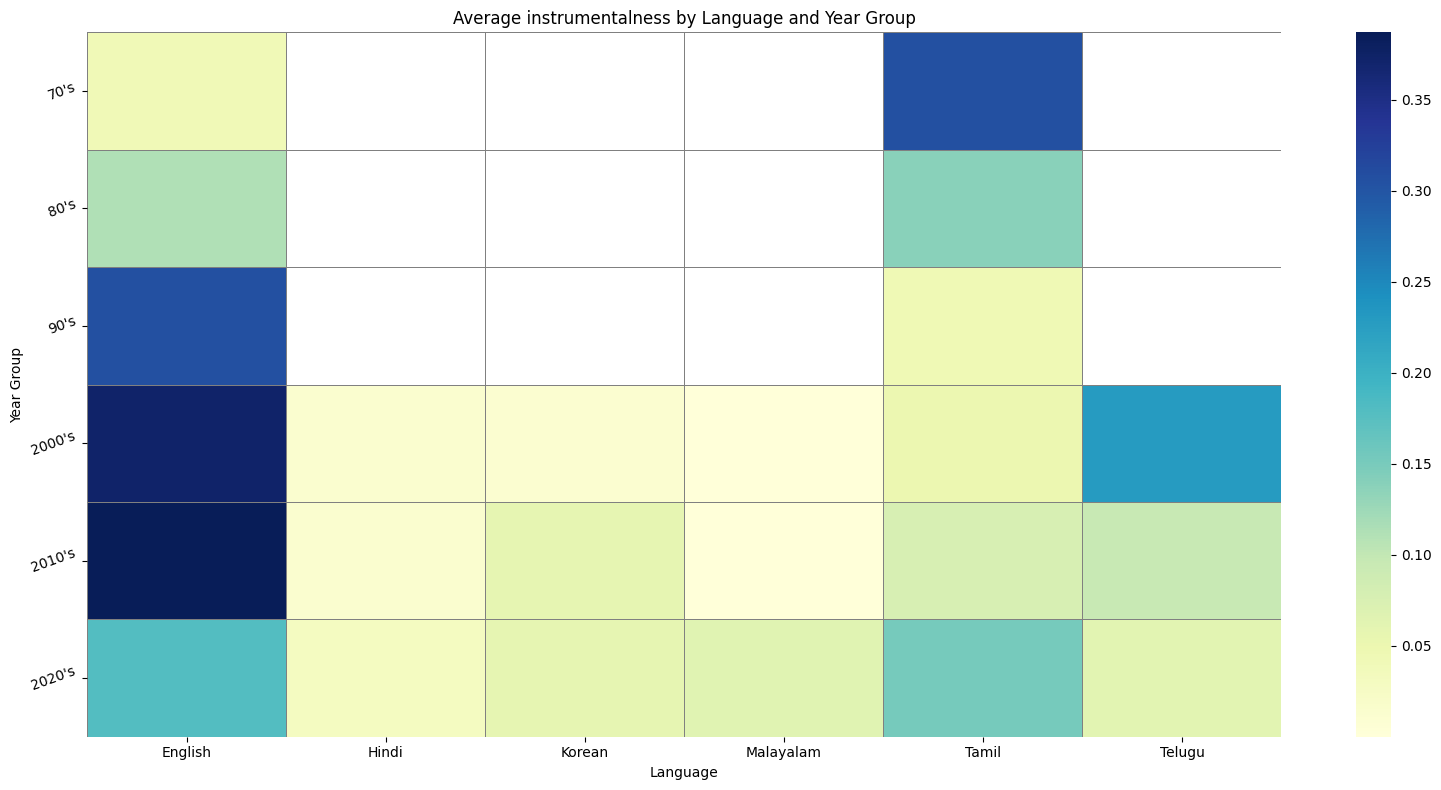

7. Analysing liveness:


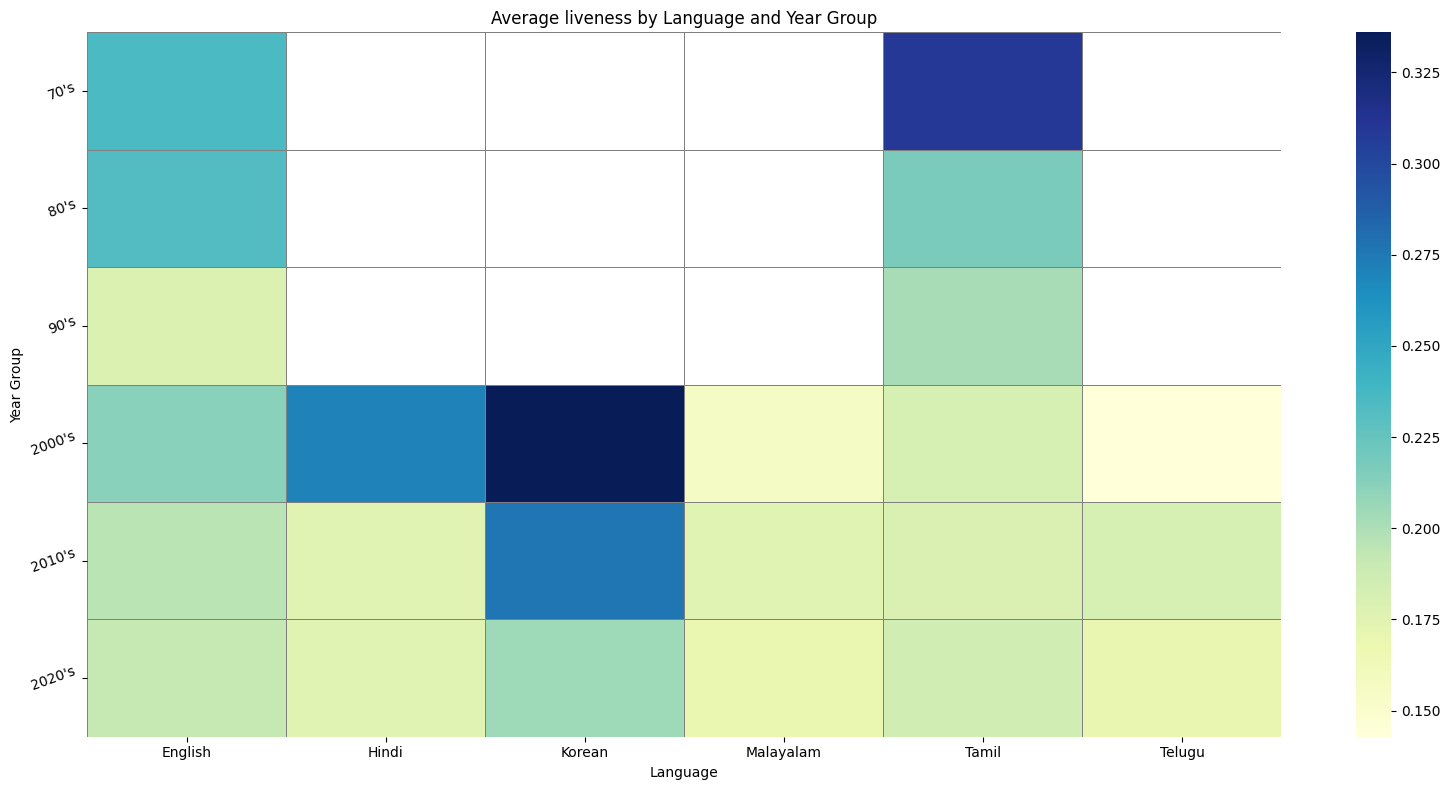

8. Analysing speechiness:


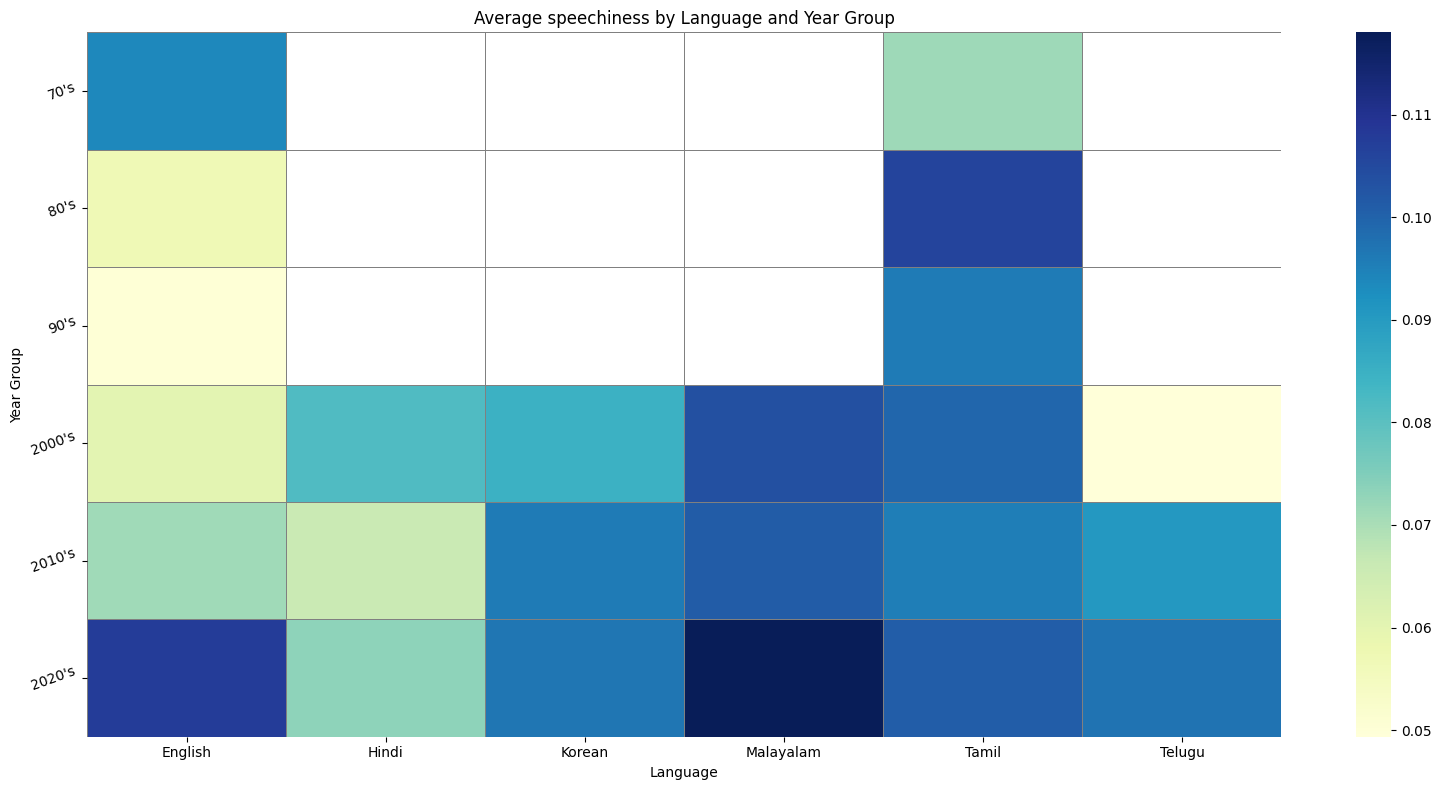

9. Analysing tempo:


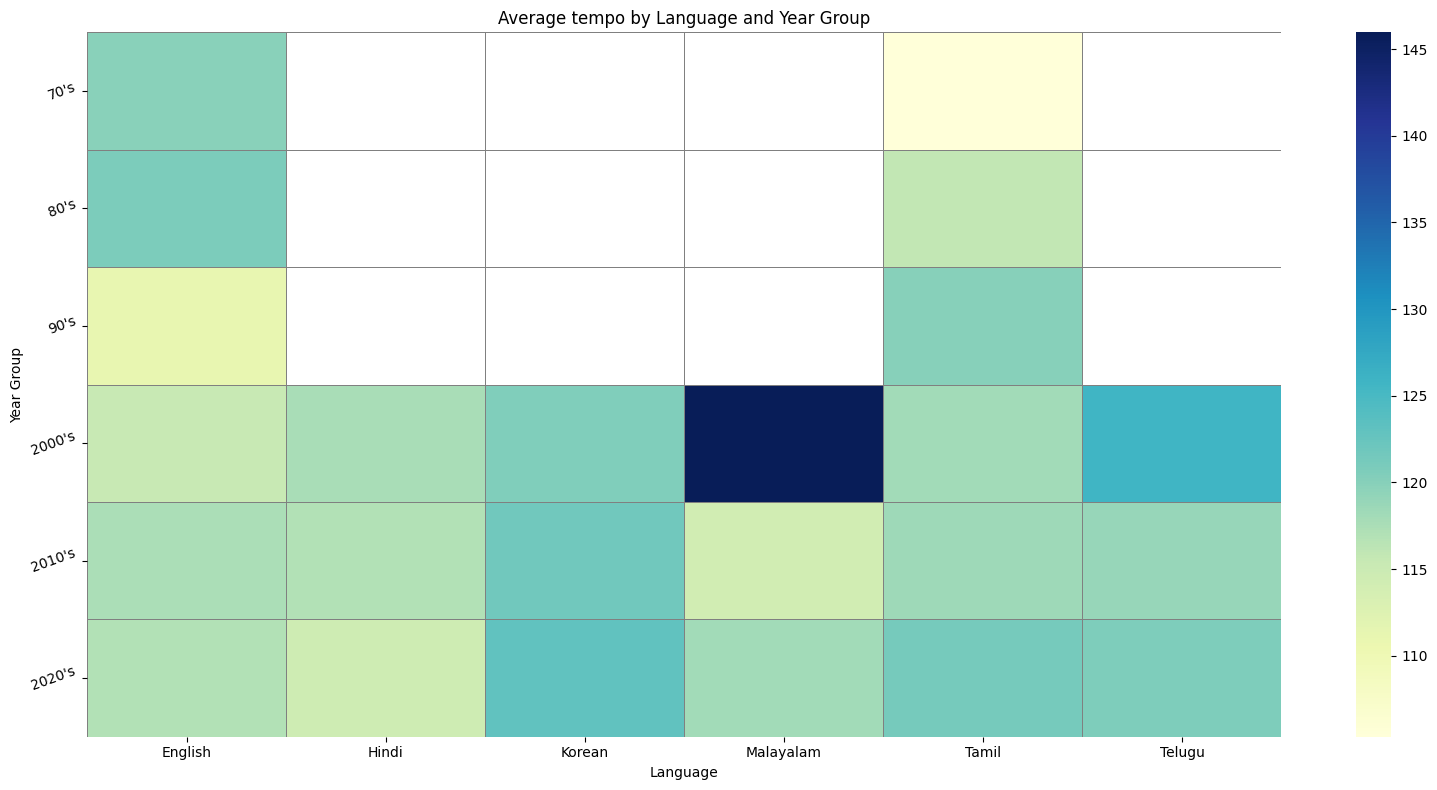

10. Analysing valence:


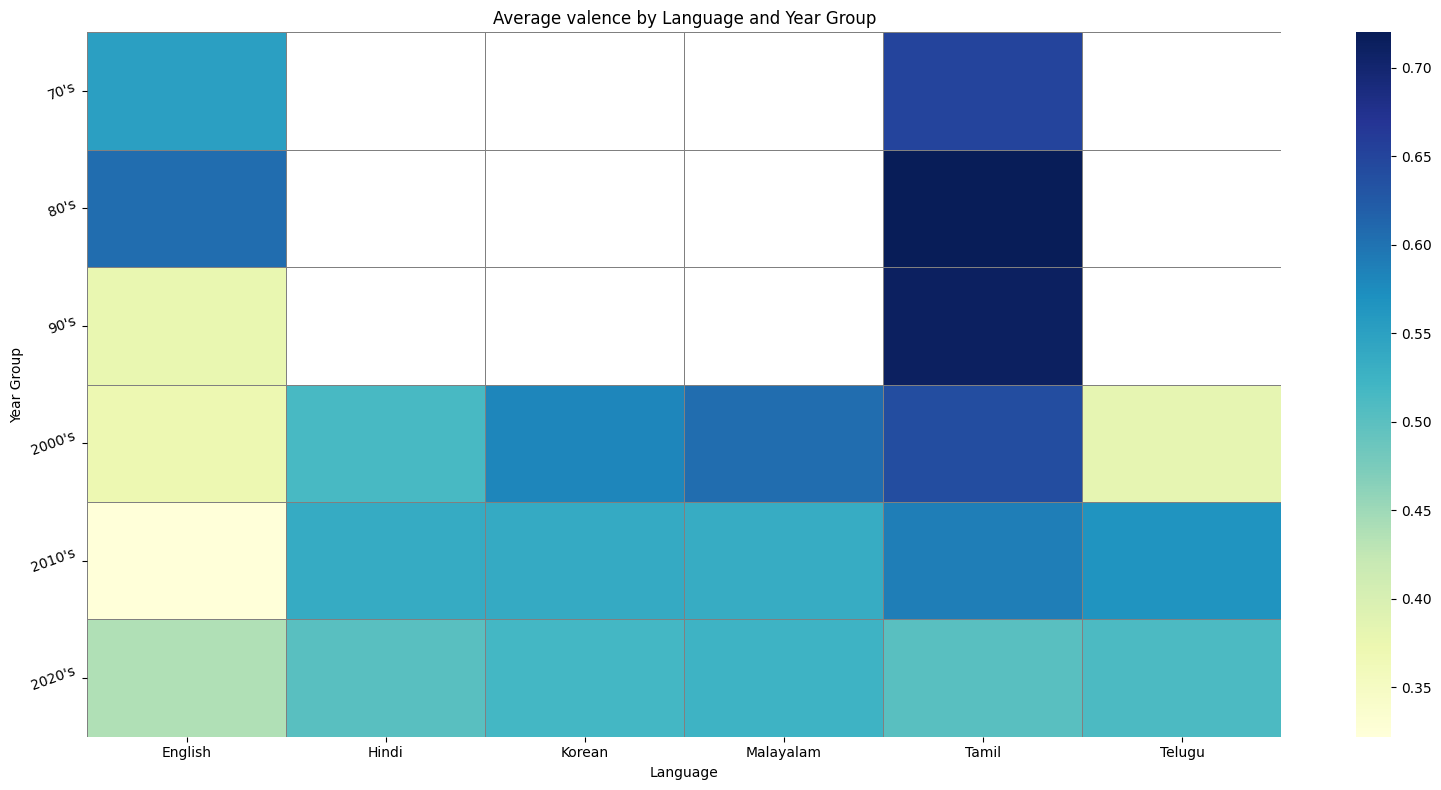

In [ ]:
colsToAnalyse=['popularity' , 'acousticness' , 'danceability' , 'duration_min' ,'energy' , 'instrumentalness' , 'liveness', 'speechiness', 'tempo', 'valence']
i=1
for col in colsToAnalyse:
  #Statistical analysis
  print(f'{i}. Analysing {col}:')
  # Step 1: Group by year_group and language, then calculate mean value of numerical columns

  pivot_df = df.groupby(['year_group', 'language'],observed=False)[col].mean().reset_index()

  # Step 2: Pivot the data for heatmap format
  heatmap_data = pivot_df.pivot(index='year_group', columns='language', values=col)

  # Step 3: Plot the heatmap
  plt.figure(figsize=(16, 8))
  sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

  plt.title(f'Average {col} by Language and Year Group')
  plt.xlabel('Language')
  plt.ylabel('Year Group')
  plt.xticks(rotation=0)
  plt.yticks(rotation=20)
  plt.tight_layout()
  plt.show()
  i+=1

**1. Average Popularity by Language and Year Group:**


Key Insight (Temporal): Older English tracks dominate the historical popularity in this dataset. English music from the 70s, 80s, and 90s shows the highest average popularity scores (darkest blue). ​

Key Insight (Contemporary): For the most recent decade (2020s), Korean music shows the highest average popularity, while English popularity has comparatively decreased from its historical peaks.

Key Insight (Language Group): Malayalam music consistently shows lower average popularity (lighter colors) across all time periods compared to English and Korean.

**2. Average Acousticness by Language and Year Group:**


Key Insight (Temporal Shift): There is a universal trend of decreasing acousticness over time (except in Hindi and Malayalam). For every language that has data across multiple decades (especially English and Tamil), the colors move from dark/medium (high acousticness) in the 70s/90s to light (low acousticness) in the 2010s/2020s. This shows a global shift toward digital, non-acoustic production.

Key Insight (Language Contrast): Tamil music from the 70s and 80s had the highest average acousticness (darkest blue), while contemporary music from all groups (2010s/2020s) is highly non-acoustic.

**3. Average Danceability by Language and Year Group:**

 ​Key Insight (Modern Dance Focus): There is a strong trend toward increased danceability in recent years across several languages. Korean, Malayalam, and Telugu music in the 2010s and 2020s are consistently deep blue, indicating very high average danceability. ​

Key Insight (Cultural Difference): Korean, Malayalam, and Telugu consistently have higher modern danceability than English music in the 2010s.

**4. Average Duration (min) by Language and Year Group:**

Key Insight (Historical Length): English and Tamil music from the 90s and 80s had the longest average track durations. This reflects the era of longer album tracks and less streaming pressure.

Key Insight (Modern Standardization): Most modern music (2010s/2020s) across all languages shows a standardized, shorter average duration (lighter colors), confirming the pressure to reduce track length for streaming and rapid consumption.

Key Insight (Outlier): Hindi and Telugu music in the 2000s also showed a trend toward longer average tracks (dark squares).

**5. Average Energy by Language and Year Group:**

 ​Key Insight (Energy Decline): All languages have experienced decline in energy levels in 2020s. Although some languages (Hindi, Tamil & Telugu) had experienced an intermediate energy surge.
​Key Insight (English Trend): English music has been consistently low in energy (yellow/light green) for the past three decades, suggesting its energy levels have been stable, while other languages have experienced periods of rapid energy increase.

**6. Average Instrumentalness by Language and Year Group:**

 ​Key Insight (Niche Concentration): Instrumental music has never been a core feature. The darkest cells are scattered: 90s, 2000s and 2010s English and 70sTamil show the highest instrumental presence, likely due to niche subgenres of rock, jazz, or film scores from those periods.

​Key Insight (Korean, Malayalam and Hindi): Korean, Malayalam and Hindi music consistently show the lowest instrumentalness (lightest colors) across all recent decades, confirming the finding that they are almost exclusively vocal-centric.

 ​Key Insight (Modern English): English music shows a slight resurgence in instrumentalness in the 2020s (light blue), possibly reflecting the growth of instrumental electronic or ambient genres in the global market.

**7. Average Liveness by Language and Year Group:**

 ​Key Insight (Historical Liveness): The darkest cells are concentrated in theb70s/80s (English and Tamil) and the 2000s  (Hindi and Korean). These represent periods or genres where live performance recordings were more common or more frequently included in the dataset.

Key Insight (Modern Decline): Most languages in the 2010s/2020s are consistently very light (low liveness), reinforcing the shift towards polished studio recordings.

 ​Key Insight (Korean Anomaly): Korean music had a period of very high liveness in the 2000s (darkest square), but this dropped significantly by the 2010s, perhaps reflecting a shift in data collection or K-Pop production styles.

**8. Average Speechiness by Language and Year Group:**

Key Insight (Older Scenario): Tamil  music in the 80s and English music in the 70s show the highest average speechiness (darkest cells) in the older periods. This could be due to older genres of dialogue-heavy film songs or early rap/spoken-word forms in those regions.
[Since this dataset doesn't contain such old songs of other languages, we can't say if it is an isolated phenomena or it's applicable on other languages. ]

​Key Insight (Modern English and Malayalam): English and Malayalam music shows an increase in speechiness in the 2020s (darker blue), likely driven by the rising popularity of rap/hip-hop music.

Key Insight (Consistency): Most other languages remain consistently low or medium in speechiness across all recent decades.

**9. Average Tempo (BPM) by Language and Year Group:**

​Key Insight (Historical Speed): 70s/80s English music show the highest average tempo (darkest green/yellow). This may reflect the popularity of fast-paced dance and rock from those decades.

 ​Key Insight (Tempo Slowdown): English music shows a clear slowdown trend, moving from fast (dark green) in the 70s to much slower (light green/yellow) in the 2020s.

 ​Key Insight (2000s Spike): Malayalam music shows a distinct, localized spike in tempo in the 2000s  (darkest blue/black), indicating a specific genre trend for that period. Most languages have stabilized in the moderate tempo range (110-125 BPM).

**10. Average Valence (Mood) by Language and Year Group:**

 ​Key Insight (Historical Mood): 70s/80s English and 90s/80s Tamil music had the most positive average valence (darkest blue/black).

​Key Insight (Universal Decline in Positivity): There is a near-universal trend toward decreasing valence (more neutral/sad moods) across all languages over time. The colors become universally lighter/bluer (lower valence) in the 2010s/2020s.

 ​Key Insight (English and Tamil): English and Tamil music in 2020s show the lowest average valence (lightest blue), suggesting contemporary music in these languages is, on average, the least cheerful.

##**11. Time Series Analysis**

In [ ]:
songs_per_year = df.groupby(['year', 'language']).size().reset_index(name='song_count')

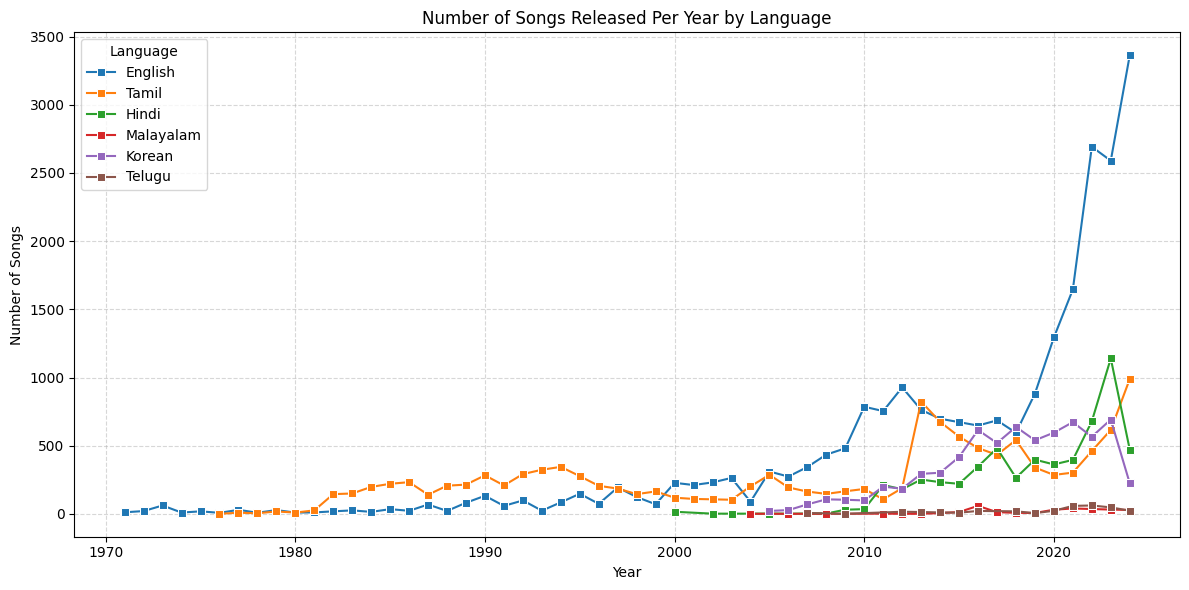

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=songs_per_year, x='year', y='song_count', hue='language', marker='s')

plt.title('Number of Songs Released Per Year by Language')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Language')
plt.tight_layout()
plt.show()

This line chart, showing the Number of Songs Released Per Year by Language, is crucial for understanding the volume and growth dynamics within the dataset. ​

 Insights on Song Release Volume Over Time

 ​1. The Global Explosion in English Releases ​Dominant Growth: The English language line (blue) shows the most dramatic and consistent growth, particularly from around 2010 onwards. ​Recent Spike: English tracks show an unprecedented, massive spike in the final years of the dataset (post-2020), indicating a huge surge in the availability and inclusion of English tracks. This is likely driven by the global expansion of music streaming platforms.

 ​2. High Volume and Consistency (Tamil) ​Long-Term Presence: Tamil (orange) shows a remarkable early and sustained presence, with a relatively high volume of releases starting as early as the late 1980s and remaining consistent through the 1990s and 2000s, often exceeding English volumes during that period. ​Modern Competition: While Tamil volumes remain high, they are overshadowed by the recent English spike.

 ​3. Rapid Emergence of Korean and Hindi ​Korean Boom (Purple): Korean tracks show a sharp and relatively recent acceleration, with volumes surging significantly around 2015 and accelerating rapidly into the final years. This visually represents the rise and global distribution of K-Pop. ​Hindi Growth (Green): Hindi tracks also show a strong period of growth, peaking around 2015 before slightly stabilizing. This confirms a substantial increase in Indian music content in the dataset over the last decade.

 ​4. Low Volume and Stability (Malayalam and Telugu) ​Minimal Growth: Malayalam (dark red) and Telugu (dark green/gray) consistently show the lowest number of annual releases throughout the entire period. Their lines are nearly flat, suggesting limited growth in volume compared to the other languages.

**Trends Over Years of Different Numerical Variables**

1. Analysing popularity


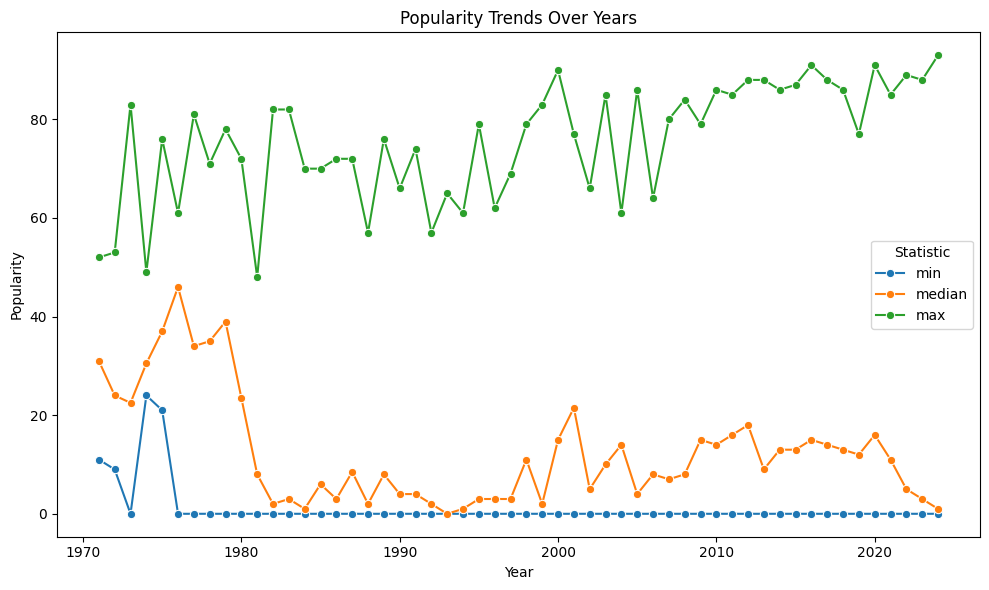

2. Analysing acousticness


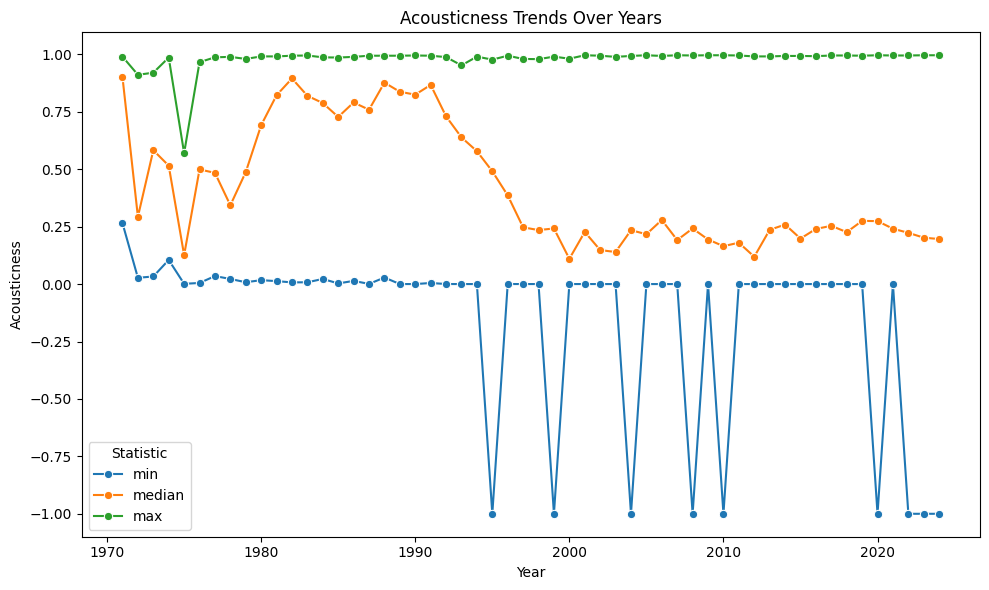

3. Analysing danceability


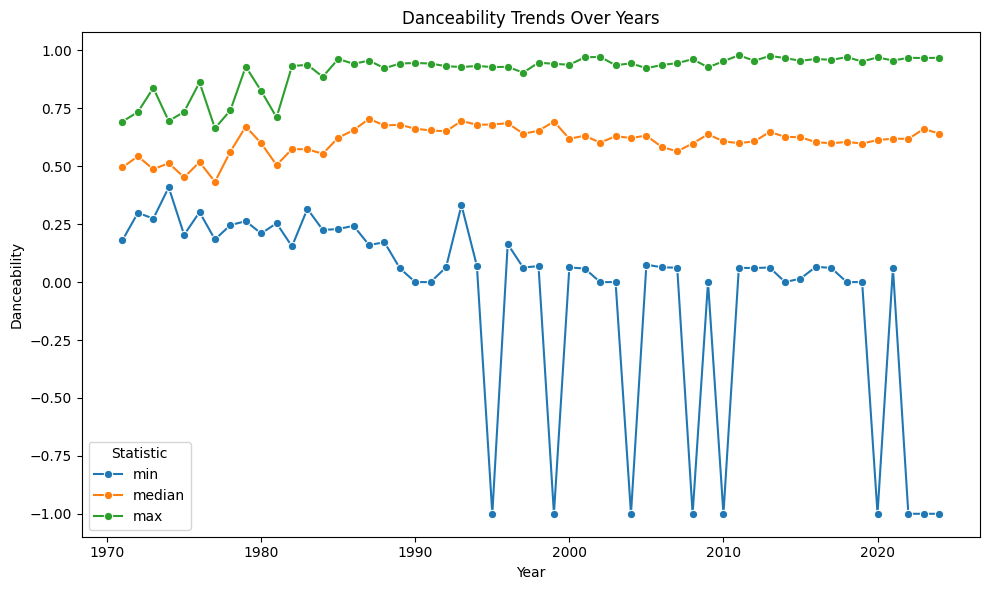

4. Analysing duration_min


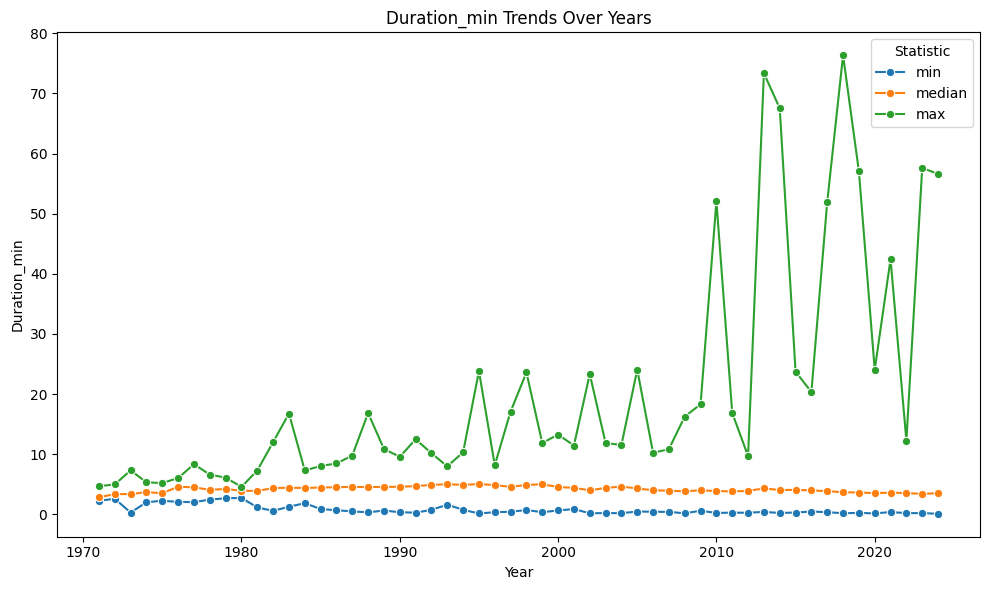

5. Analysing energy


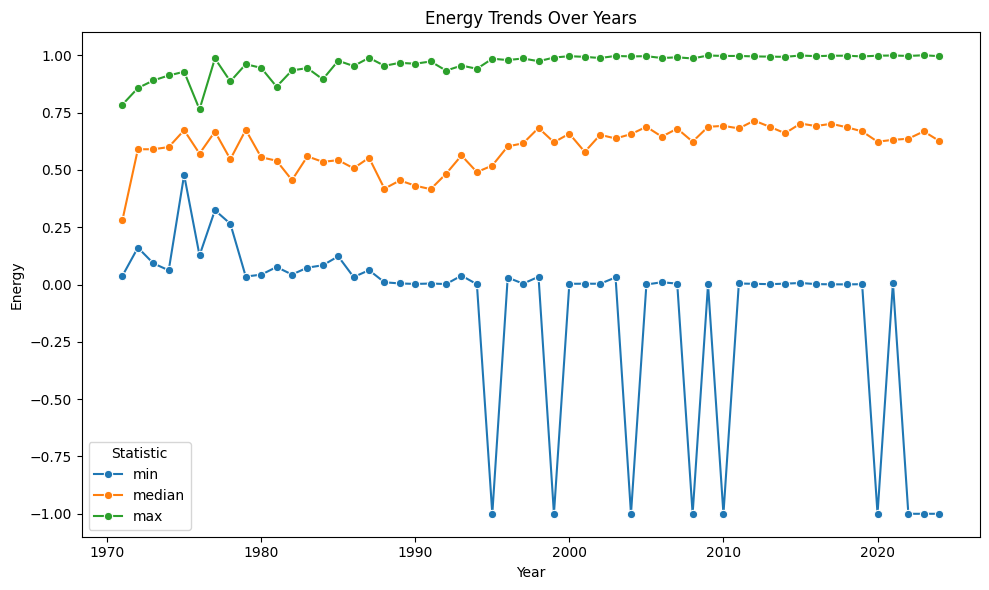

6. Analysing instrumentalness


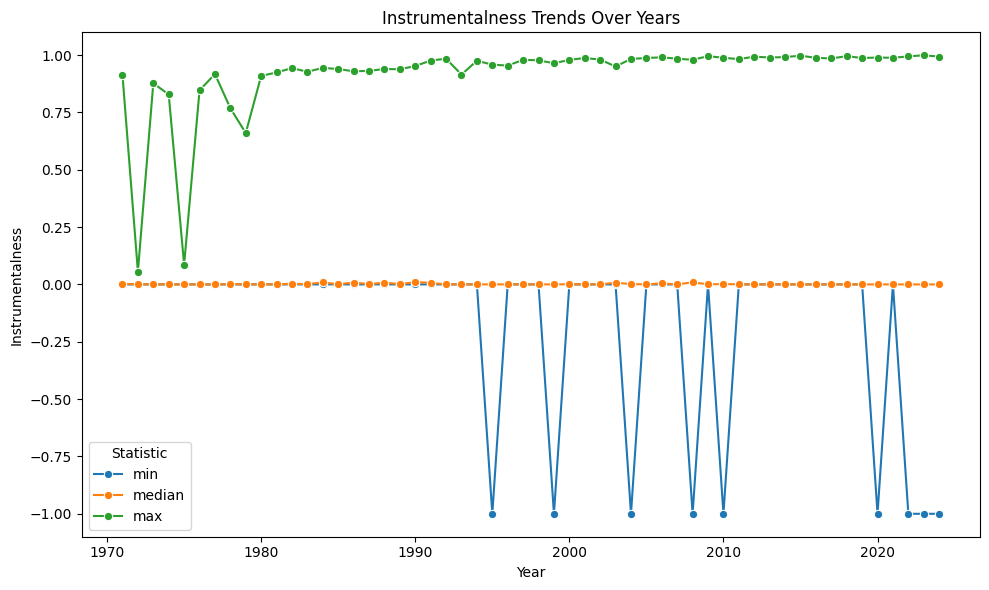

7. Analysing liveness


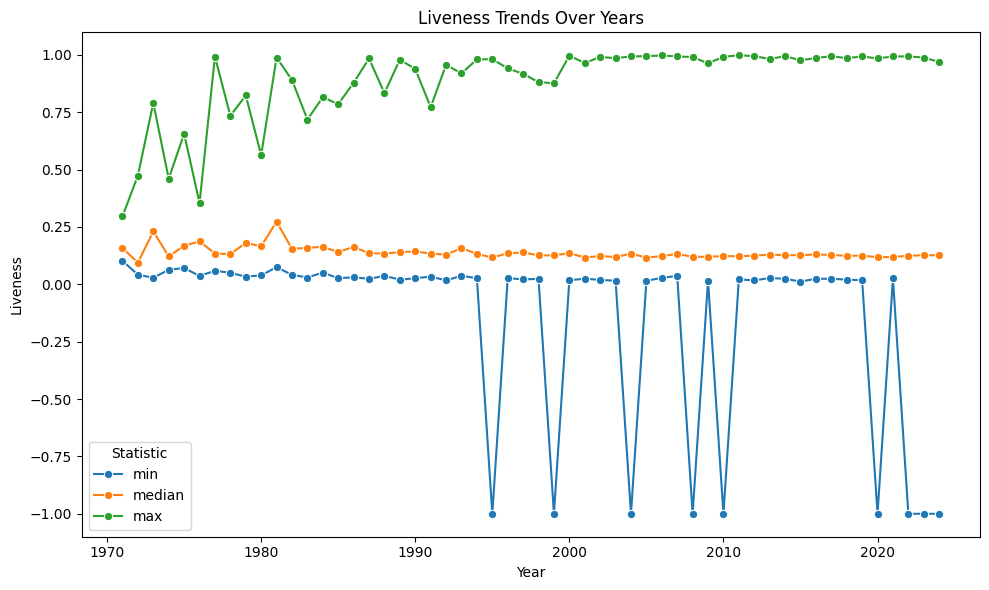

8. Analysing speechiness


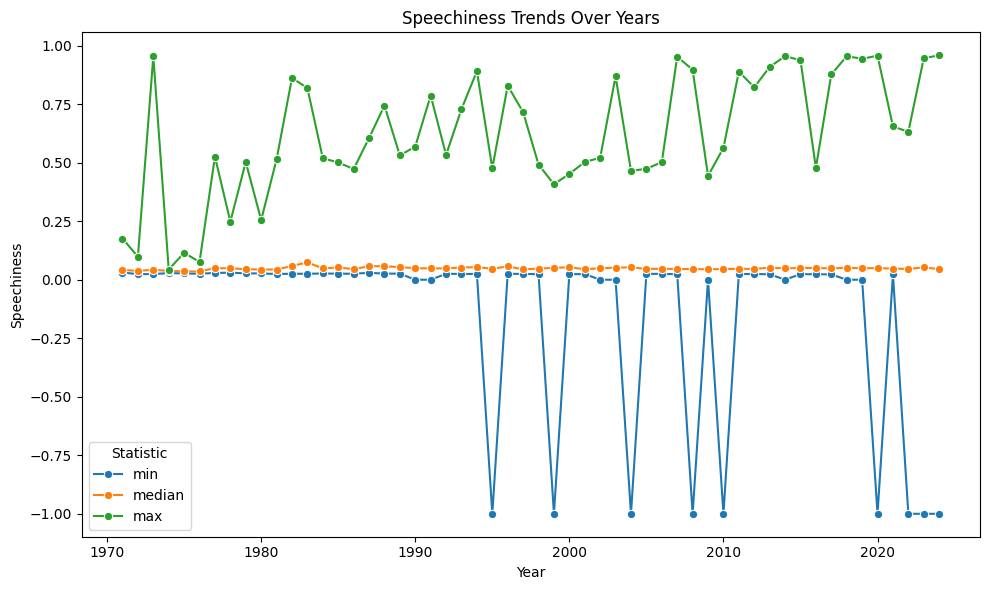

9. Analysing tempo


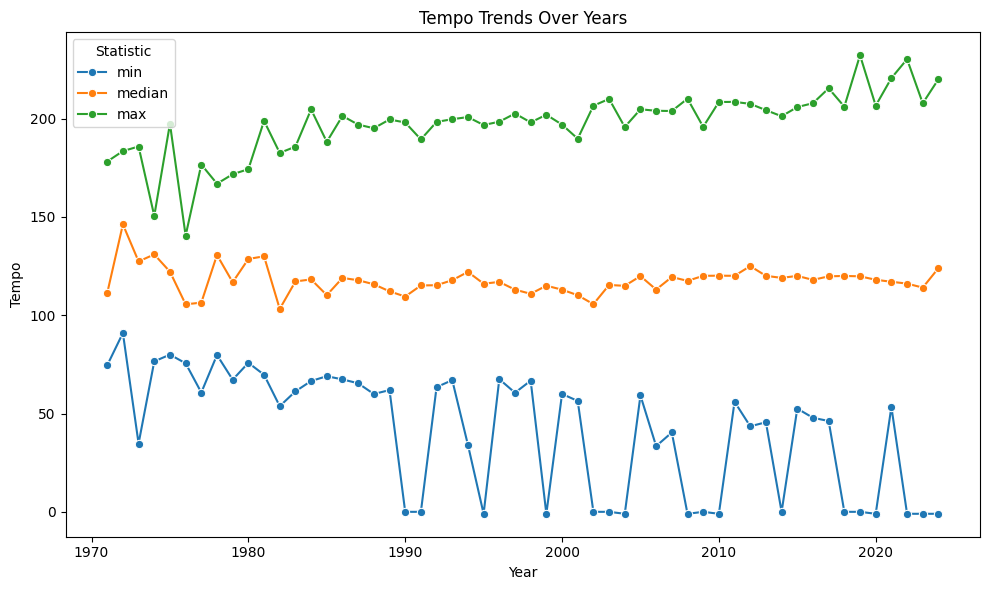

10. Analysing valence


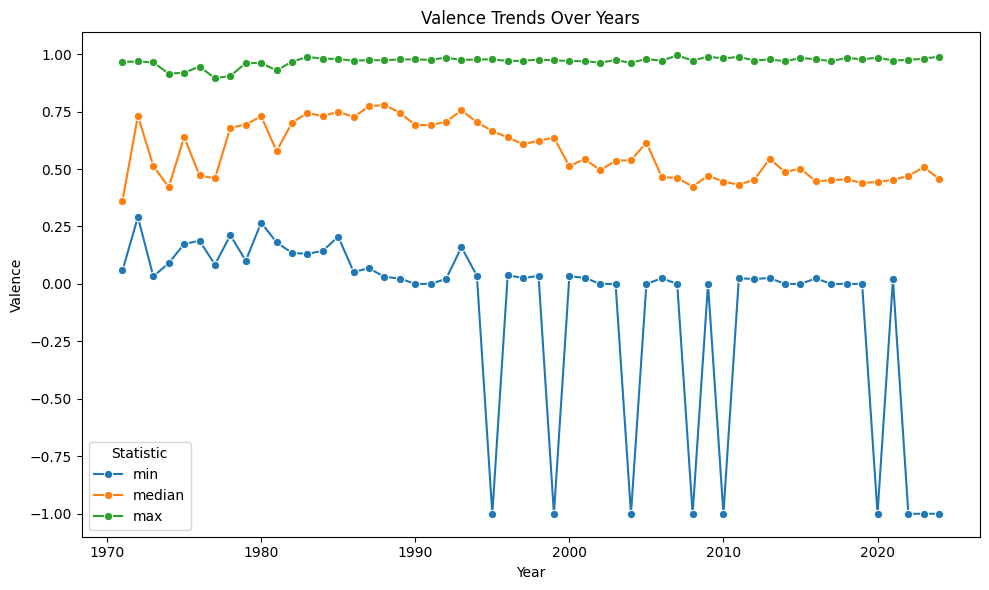

In [ ]:
colsToAnalyse=['popularity' , 'acousticness' , 'danceability' , 'duration_min' ,'energy' , 'instrumentalness' , 'liveness', 'speechiness', 'tempo', 'valence']
i=1
# Loop through each numerical column
for col in colsToAnalyse:
    print(f'{i}. Analysing {col}')
    # Group by year and calculate min, median, max
    stats = df.groupby('year')[col].agg(['min', 'median', 'max']).reset_index()

    # Melt the DataFrame for easier plotting
    stats_melted = stats.melt(id_vars='year', value_vars=['min', 'median', 'max'],
                              var_name='Statistic', value_name=col)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=stats_melted, y=col, x='year', hue='Statistic', marker='o')
    plt.title(f'{col.capitalize()} Trends Over Years')
    plt.ylabel(col.capitalize())
    plt.xlabel('Year')
    plt.grid(False)
    plt.legend(title='Statistic')
    plt.tight_layout()
    plt.show()
    i+=1

These line plots are excellent for revealing long-term temporal trends in music production and consumption since the 1970s. The 'median' line (orange) is the most critical for identifying these trends. ​Here are the insights for each plot, focusing on changes in the median value over time:

**​1. Popularity Trends Over Years:**

The maximum popularity (Max) of music has remained consistently high (approx 80-90) since the 1970s, indicating that hit-making potential has not changed. ​

Median: Median popularity has decreased significantly since the mid-1970s (when it peaked around 45). It has stabilized at a very low level (< 5) since the 1980s. This confirms the previously identified "Long Tail" effect: hits remain hits, but the median track gains almost no popularity in the modern era.

**​2. Acousticness Trends Over Years (Major Shift):**

Acousticness has seen the most dramatic decline of any feature. The median acousticness dropped sharply from a high ( 0.9) in the early 1990s to a sustained low (< 0.25) from the late 1990s onwards.

​Interpretation: This drop marks the decisive, industry-wide shift from analog/acoustic recording to digital, synthesized, and heavily produced music.

**​3. Danceability Trends Over Years (High Floor):**

Median danceability has been consistently high since the 1970s ( 0.50 to 0.65).

​Interpretation: This shows that music, on average, has always been designed to be rhythmically engaging. The peak of danceability was in the mid-1980s, stabilizing slightly lower today, but remaining firmly in the "danceable" range.

**4. Duration Trends Over Years (Stability):**

Median track duration is remarkably stable, hovering consistently between 3 and 5 minutes (the standard song length) throughout the entire period.

​Interpretation: The standard track length is an established constant in music production, despite large fluctuations in the maximum duration (which reflects long-form outliers).

**​5. Energy Trends Over Years (Energy Surge):**

Median energy dipped in the late 1980s/early 1990s but has steadily increased since the mid-1990s, moving from a low of 0.40 to a sustained level of 0.60.

​Interpretation: This suggests a cultural preference for louder, more intense, and more active music in the 21st century, complementing the decline in acousticness.

**​6. Instrumentalness Trends Over Years (Vocal Focus):**

 Median instrumentalness has remained at 0.0 for the entire period shown.

Interpretation: This confirms that the average track has virtually no instrumental content (i.e., it has vocals). The rise and fall of instrumental genres is only reflected in the minimum/maximum lines, but the typical track is vocal-focused.

**​7. Liveness Trends Over Years (Decline):**

 Median liveness has slightly decreased from 0.25 in the 1970s to a stable low level (0.10) since the 1990s.

​Interpretation: This confirms the move away from live recordings or recordings where the live environment is strongly audible, favoring polished, controlled studio environments.

**​8. Speechiness Trends Over Years (Stability):**

Median speechiness has remained at 0.0 throughout the entire period.

​Interpretation: This reinforces that the core content of the music in the dataset has always been sung vocals, with spoken-word content being a niche feature represented only by the fluctuating maximum line.

**​9.Tempo Trends Over Years (Stability):**

Median tempo has been very consistent, fluctuating mildly around 110 BPM since the 1980s.

​Interpretation: There is no long-term trend toward significantly faster or slower music; the average pace has remained in the moderate, mid-tempo range.

**​10. Valence (Mood) Trends Over Years (Decline in Positivity):**

 Median valence has steadily decreased from a high of 0.75 in the mid-1980s to a lower, stable level of 0.45 since the 2000s.

 ​Interpretation: Music has, on average, become less cheerful and positive over the past few decades, shifting towards more neutral or negative emotional content. This aligns with the global trend seen in the Language/Year heatmap.

**Change in Solo vs Collaboration over Time per each Language**

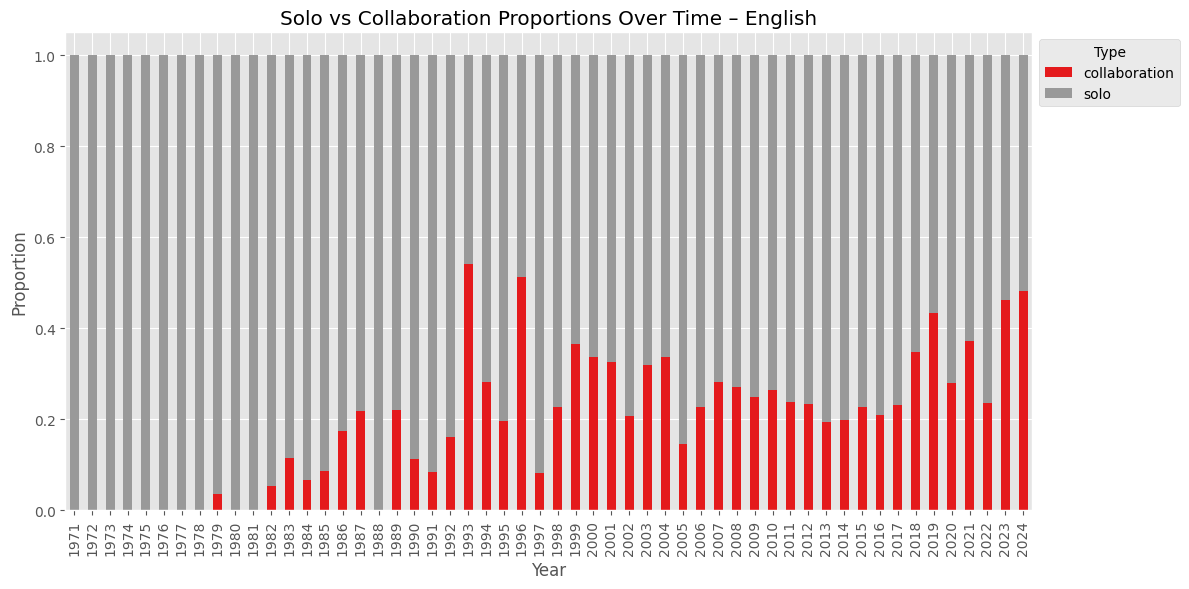

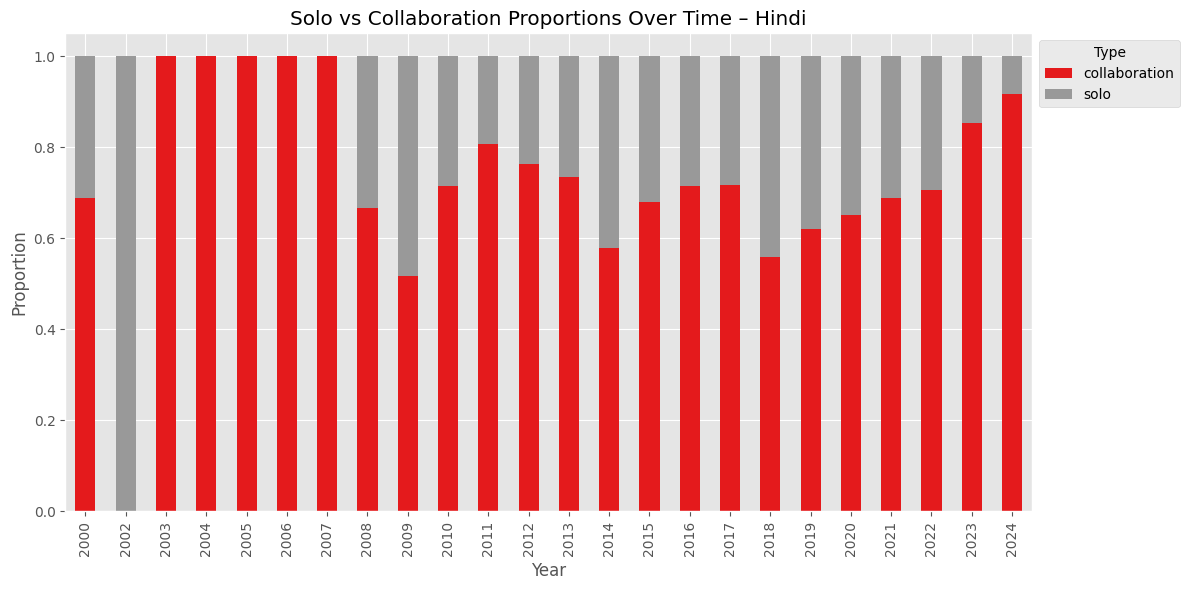

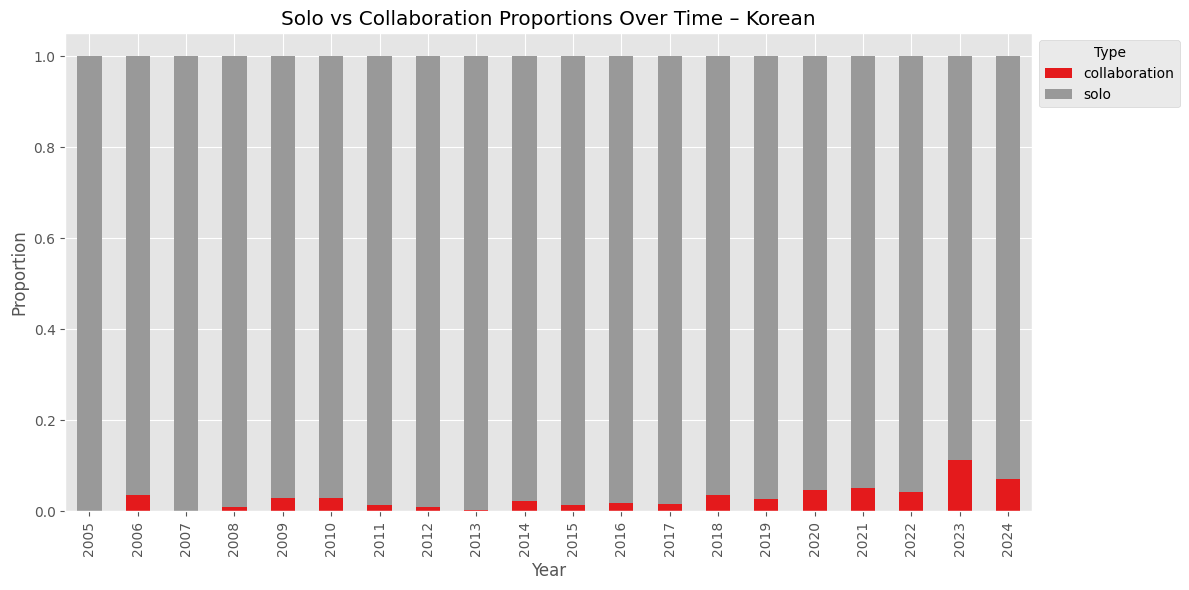

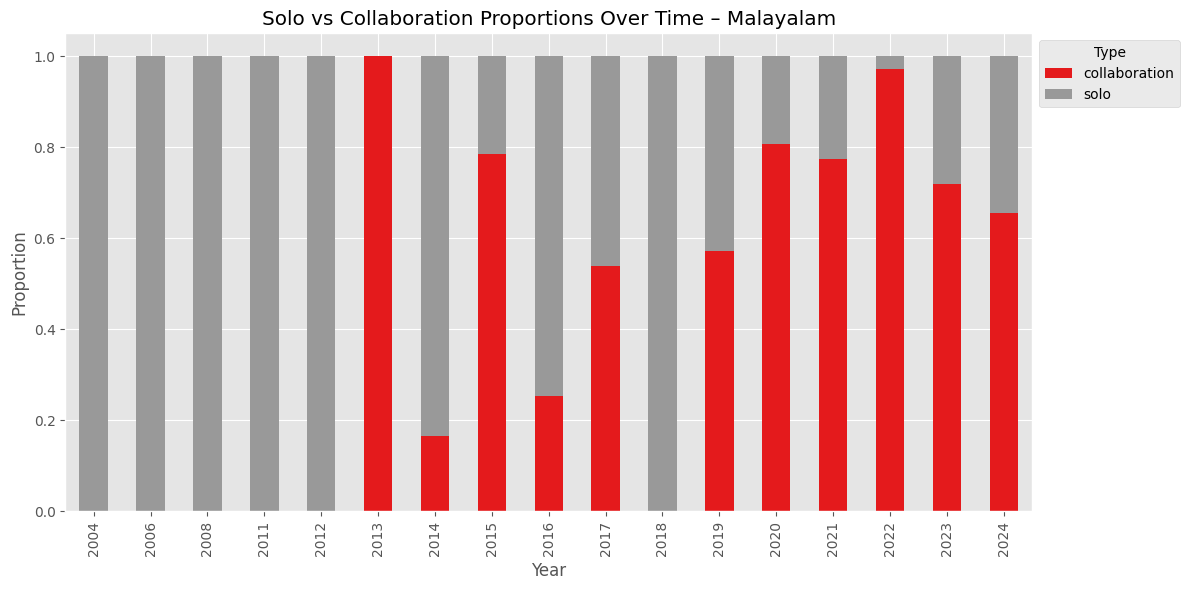

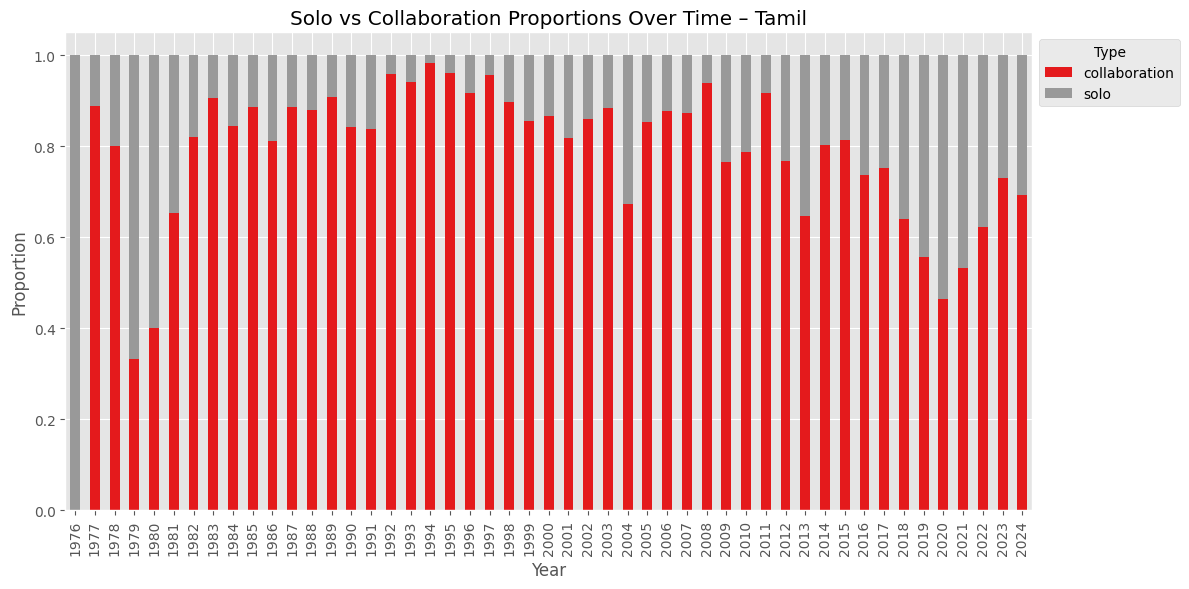

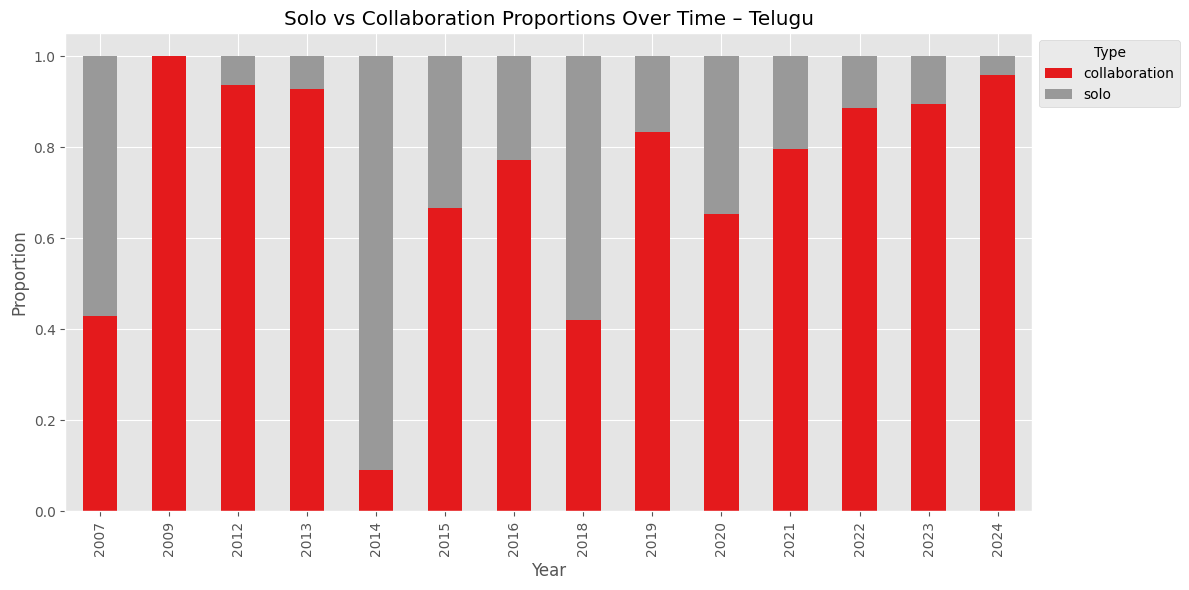

In [ ]:
# Count tracks per year-language-type
grouped = df.groupby(['year', 'language', 'solo_or_collaboration']).size().reset_index(name='count')

# Total tracks per year-language
total_per_year_lang = grouped.groupby(['year', 'language'])['count'].transform('sum')

# Add proportion column
grouped['proportion'] = grouped['count'] / total_per_year_lang

# Set plot style
plt.style.use('ggplot')

language=['English','Hindi','Korean','Malayalam','Tamil','Telugu']

for lang in language:
    data_lang = grouped[grouped['language'] == lang]

    # Pivot for stacked bar
    pivot_df = data_lang.pivot(index='year', columns='solo_or_collaboration', values='proportion').fillna(0)

    # Plot
    pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap ='Set1' )
    plt.title(f'Solo vs Collaboration Proportions Over Time – {lang}')
    plt.ylabel('Proportion')
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    # Move legend outside top right
    plt.legend(title='Type', bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.tight_layout()
    plt.show()

These stacked bar charts illustrate the temporal shift in the proportion of Solo versus Collaboration tracks for English, Hindi, Korean, Malayalam, Tamil and Telegu music. ​Here are the specific insights for each chart:

**​1. Solo vs Collaboration Proportions Over Time - English**

​Key Insight (Historical Trend): For decades, English music was overwhelmingly Solo-dominated. From the 1970s through the mid-1980s, collaborations (red) were negligible, accounting for less than 10% of releases.

​Key Insight (Modern Collaboration Surge): The proportion of Collaboration tracks shows a clear and accelerating upward trend, particularly starting around 1993-1996.

​Recent Peak: By the end of the period (2023 and 2024), collaborations reach a peak of approximately 45% to 50% of all releases. This reflects the modern industry strategy where artists frequently collaborate to cross-promote and pool streaming audiences.

**​2. Solo vs Collaboration Proportions Over Time - Hindi**

​Key Insight (High Collaboration Baseline): Hindi music has a significantly higher baseline for collaborations compared to English. Even in the early 2000s, collaborations represented around 30% of releases.

​Fluctuating Dominance: The period between 2003 and 2007 saw collaborations dominate releases, frequently exceeding 90% (up to 100%) of all tracks. This high rate suggests that collaborations (likely multi-singer film soundtracks or remix albums) were the primary mode of release during that specific era.   

​Return to Parity: While the proportion normalized back towards parity (approx 50%) in 2008 to 2022, it shows a sharp uptick again in 2023-2024, with collaborations again reaching a very high proportion, mirroring the recent global trend seen in English music.

**3. Solo vs Collaboration Proportions Over Time - Korean**

​Key Insight (Strong Solo Focus): Korean music is overwhelmingly dominated by Solo releases. For the entire period shown (2005-2024), collaborations (red) consistently account for less than 5% of all tracks.

​Recent Slight Increase: There is a minor, noticeable increase in collaboration proportion in the final years (2023-2024), reaching approximately 10%. This minimal rise suggests that while the overall culture remains solo-centric (reflecting strong reliance on individual artists and group releases), the global trend toward occasional collaborations is slowly beginning to take root.

​**4. Solo vs Collaboration Proportions Over Time - Malayalam**

​Key Insight (Fluctuating Parity): Malayalam music shows a trend of high variability and near parity between Solo and Collaboration. Collaborations spiked dramatically in 2013 (95%), but the proportion generally hovers around 50% to 70% in the post-2015 era.

​Contrast with Tamil: While sharing the South Asian tendency towards collaboration, Malayalam exhibits less consistent collaboration dominance than Tamil, with many years where Solo tracks take the majority (e.g. 2014).

**5. Solo vs Collaboration Proportions Over Time - Tamil**

​Key Insight (Historical Dominance): Collaboration (red) has been the dominant mode of release for Tamil music since the 2004s, often making up 80% to 95% of releases. This strong and sustained pattern is likely due to the nature of Indian cinema and film soundtracks, where songs typically feature multiple vocalists.

​High Consistency: Unlike English or Hindi, Tamil collaborations have not seen the dramatic fluctuations; they have simply maintained a uniformly high proportion for over four decades.

Recent Dip and Recovery: The proportion dipped slightly below 50% in 2013s but has rebounded sharply in 2022, with collaborations again representing 70% of releases.

**6. Solo vs Collaboration Proportions Over Time - Telugu**

​Key Insight (Collaboration is King): Similar to Tamil, Collaboration (red) consistently dominates Telugu releases, often constituting 80% to 95% of tracks throughout the available period.

​Solo as the Anomaly: Solo tracks are rare, serving as the minority mode of release. There is only one significant period where the Solo proportion (gray) briefly reached the majority (around 2014-2018), suggesting a temporary shift or anomaly in the data collection for those years.

**Change over Time of the Correlations of Numerical Variables with Popularity**

1. Analysing acousticness:


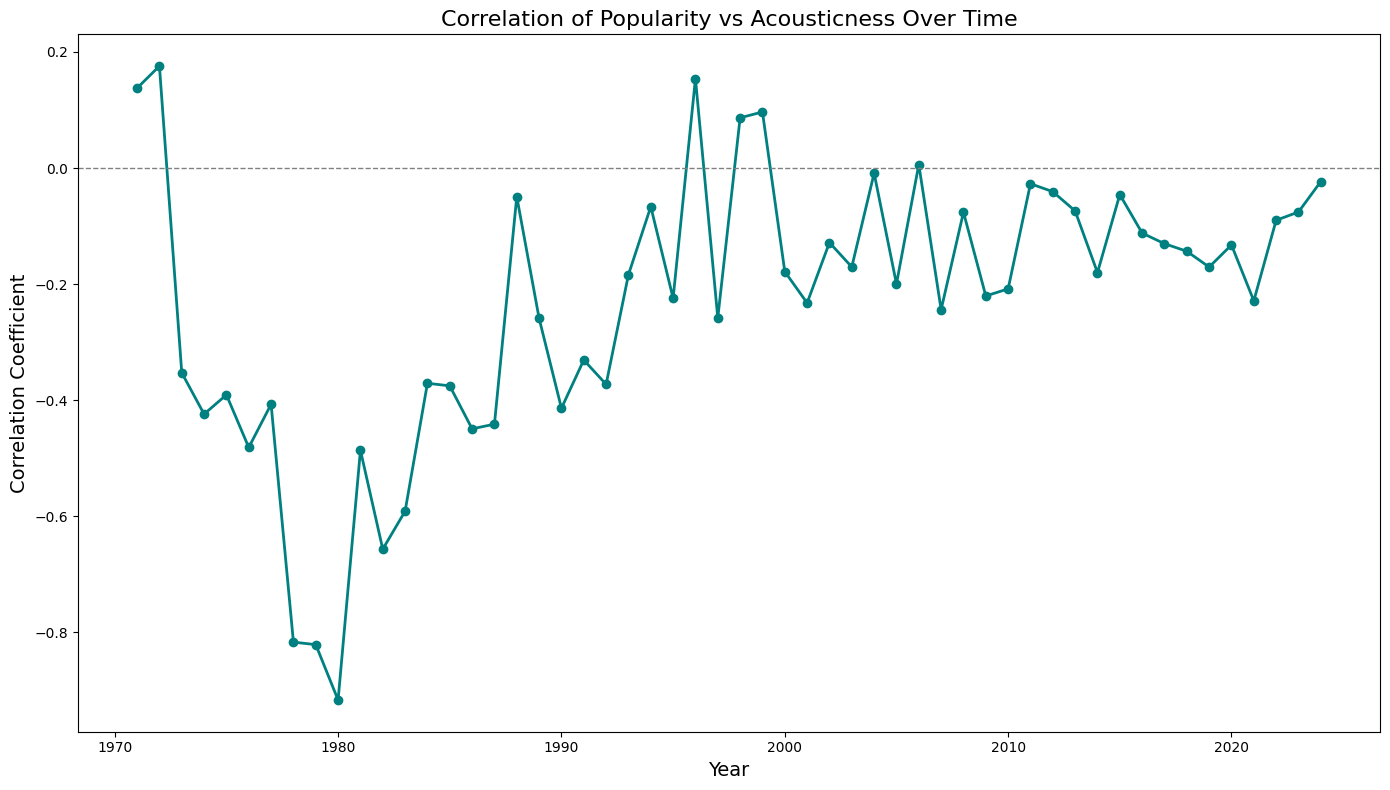

2. Analysing danceability:


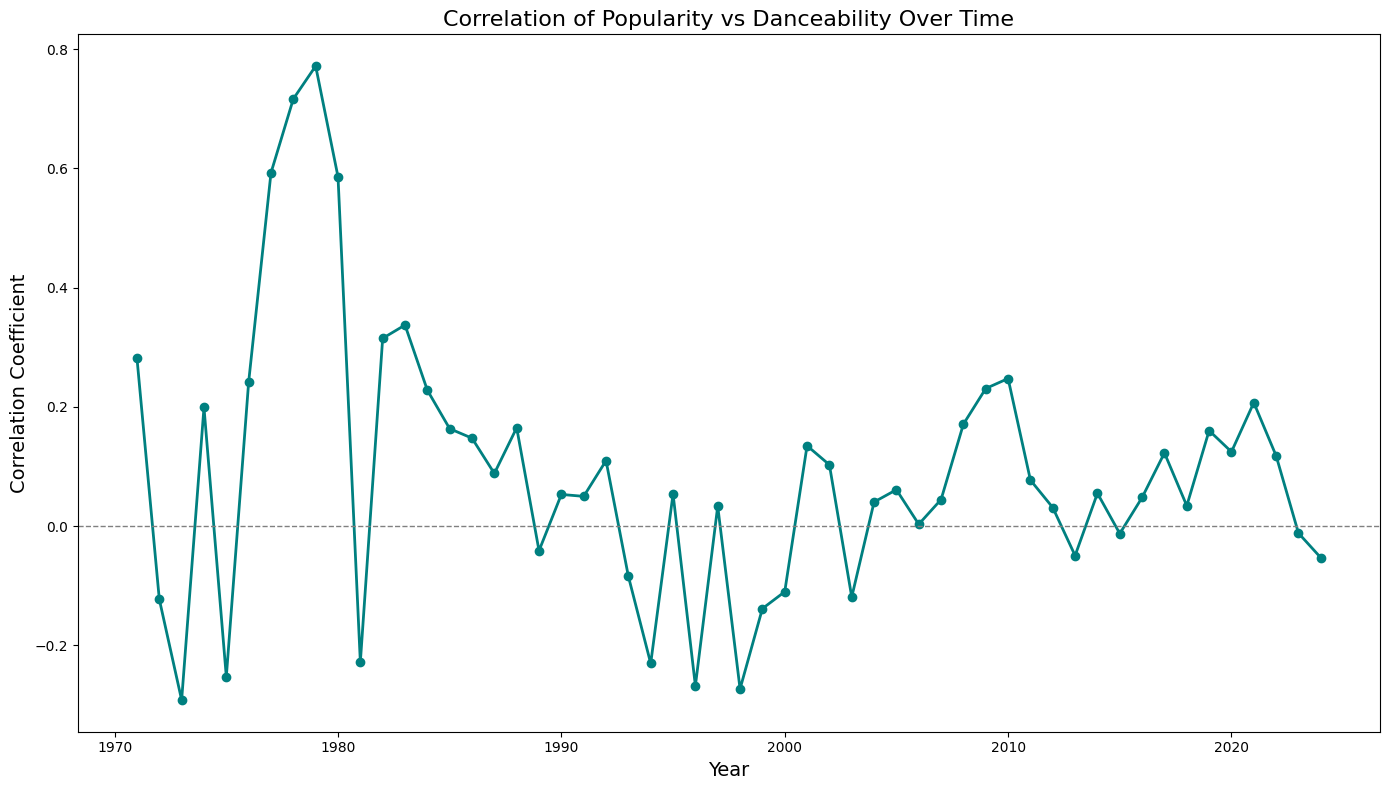

3. Analysing duration_min:


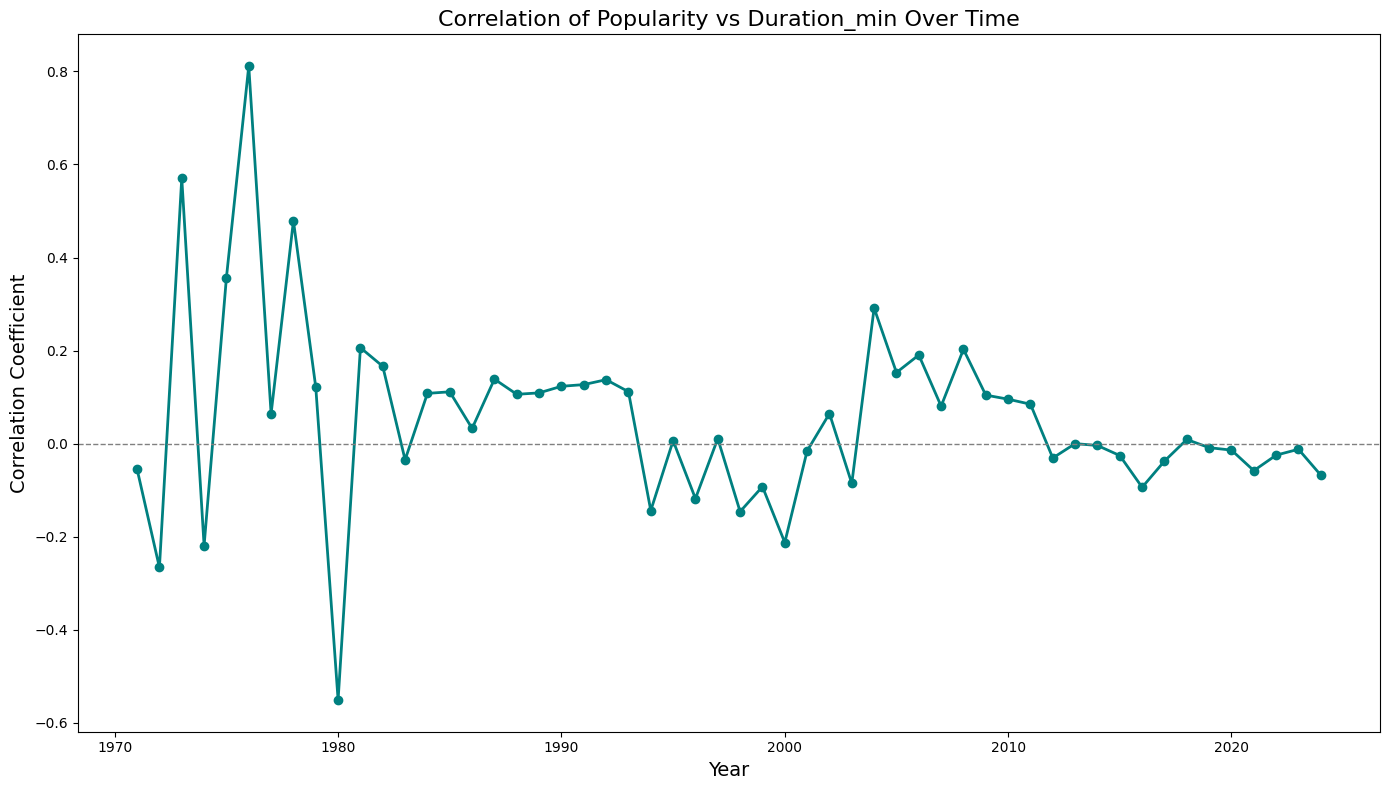

4. Analysing energy:


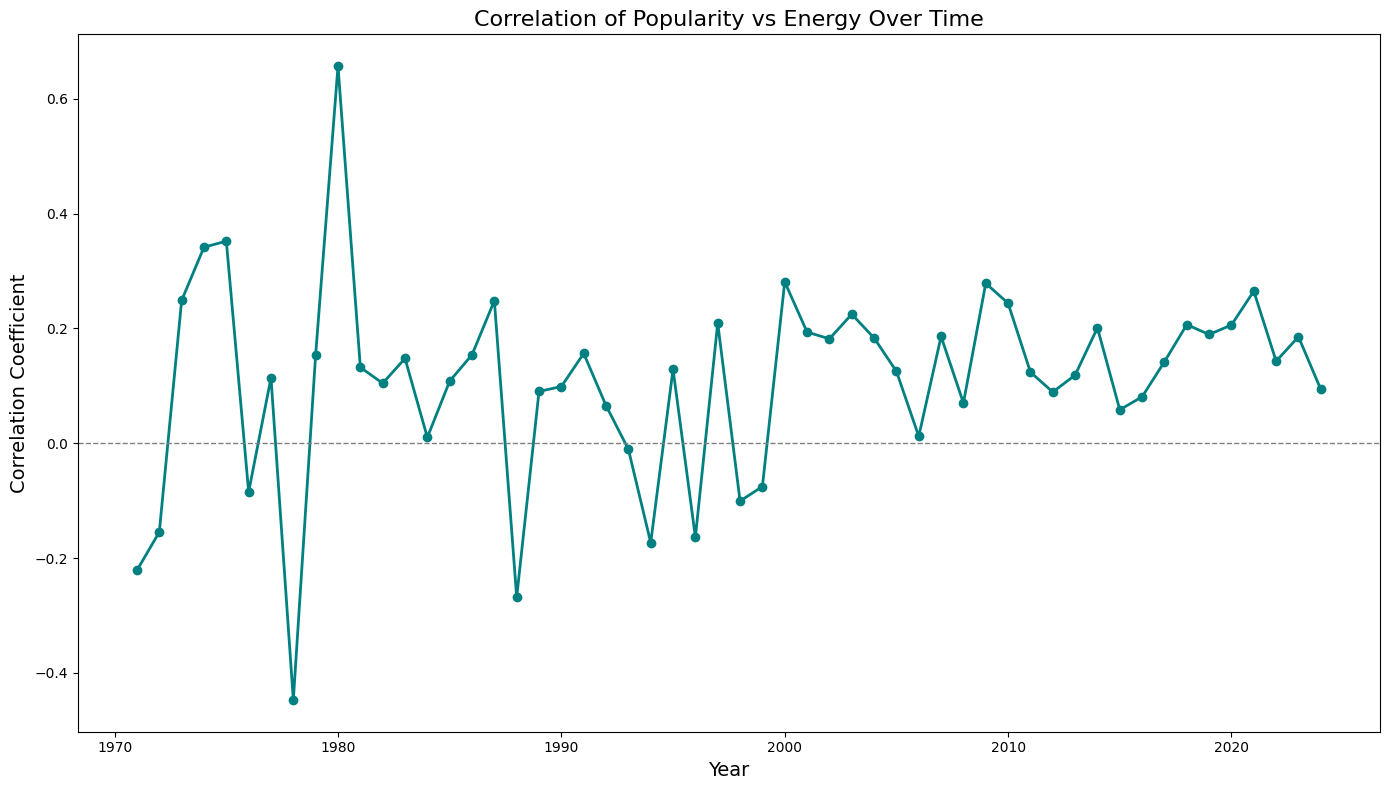

5. Analysing instrumentalness:


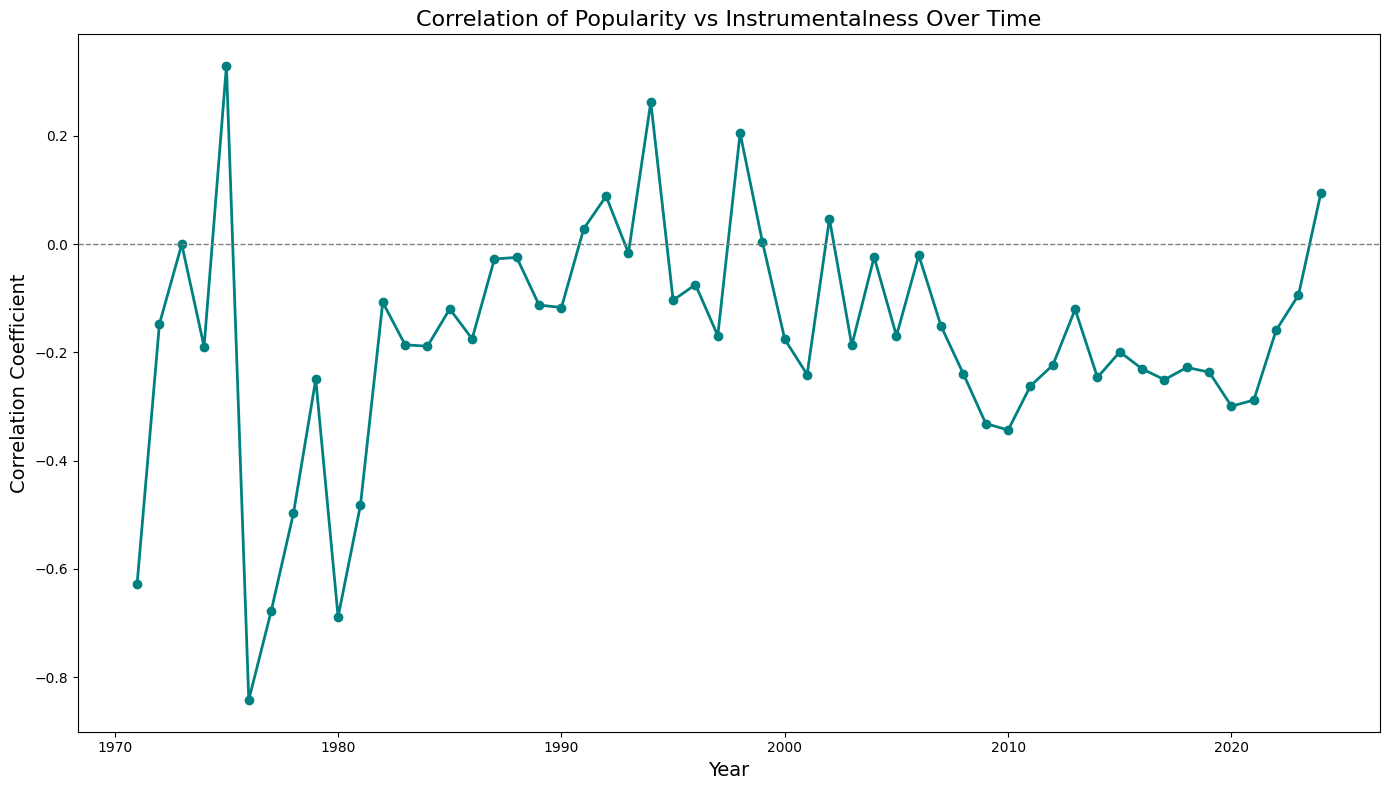

6. Analysing liveness:


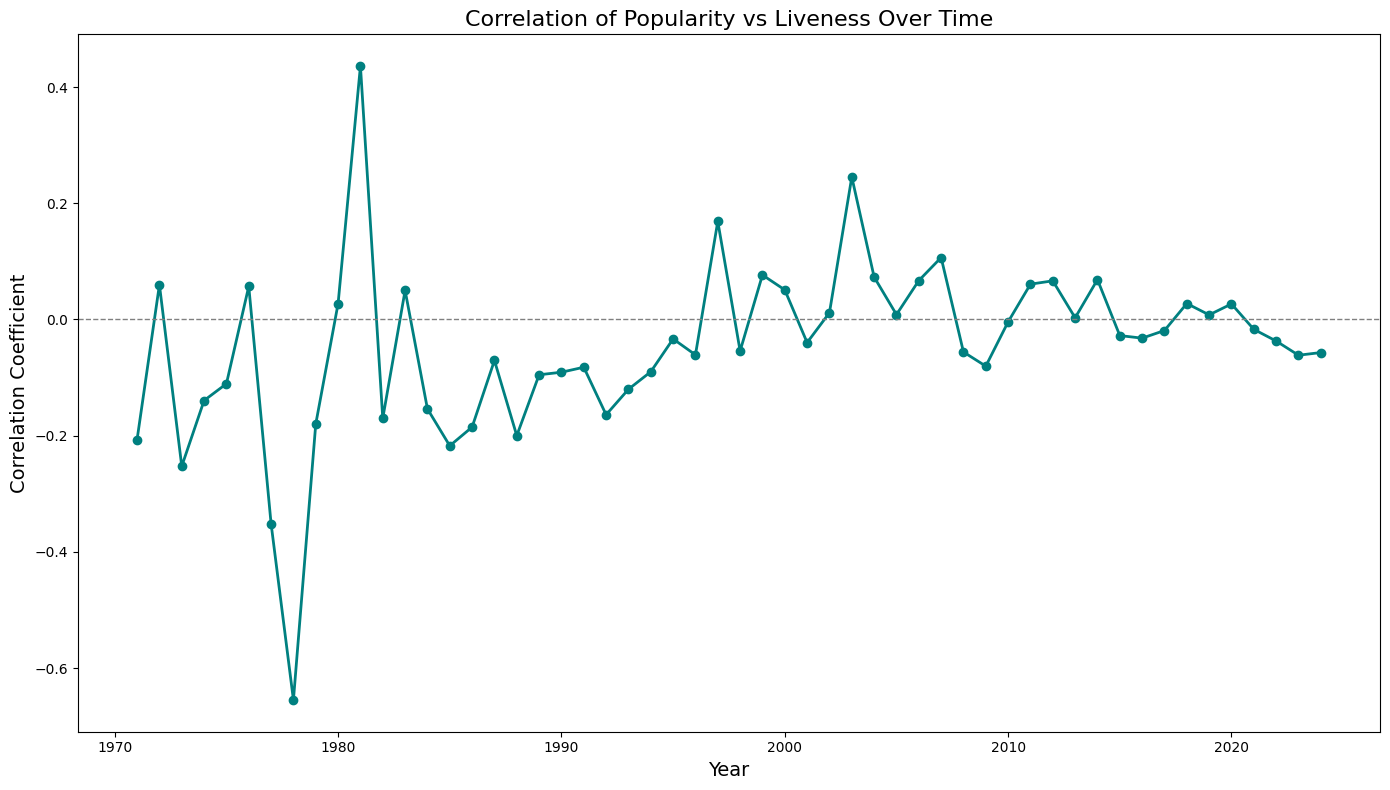

7. Analysing speechiness:


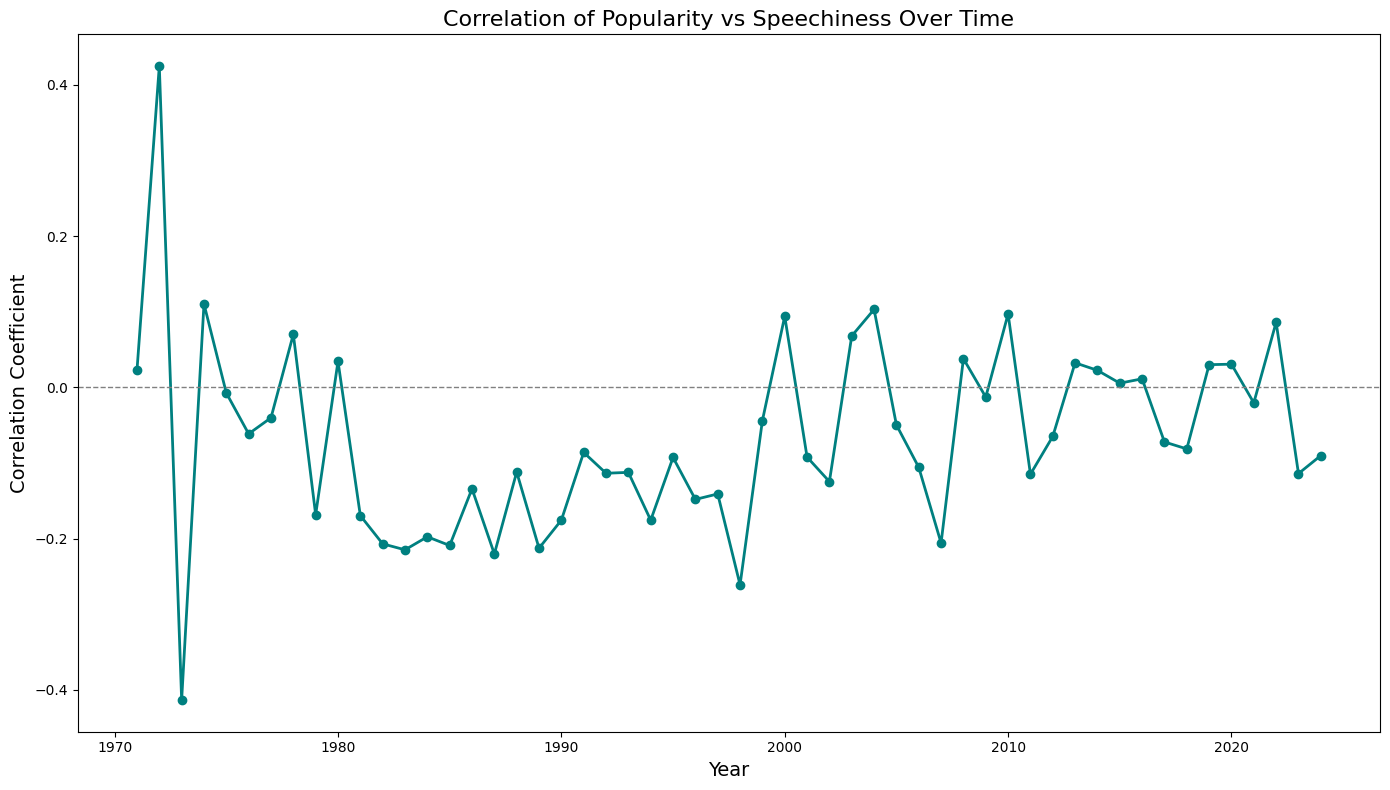

8. Analysing tempo:


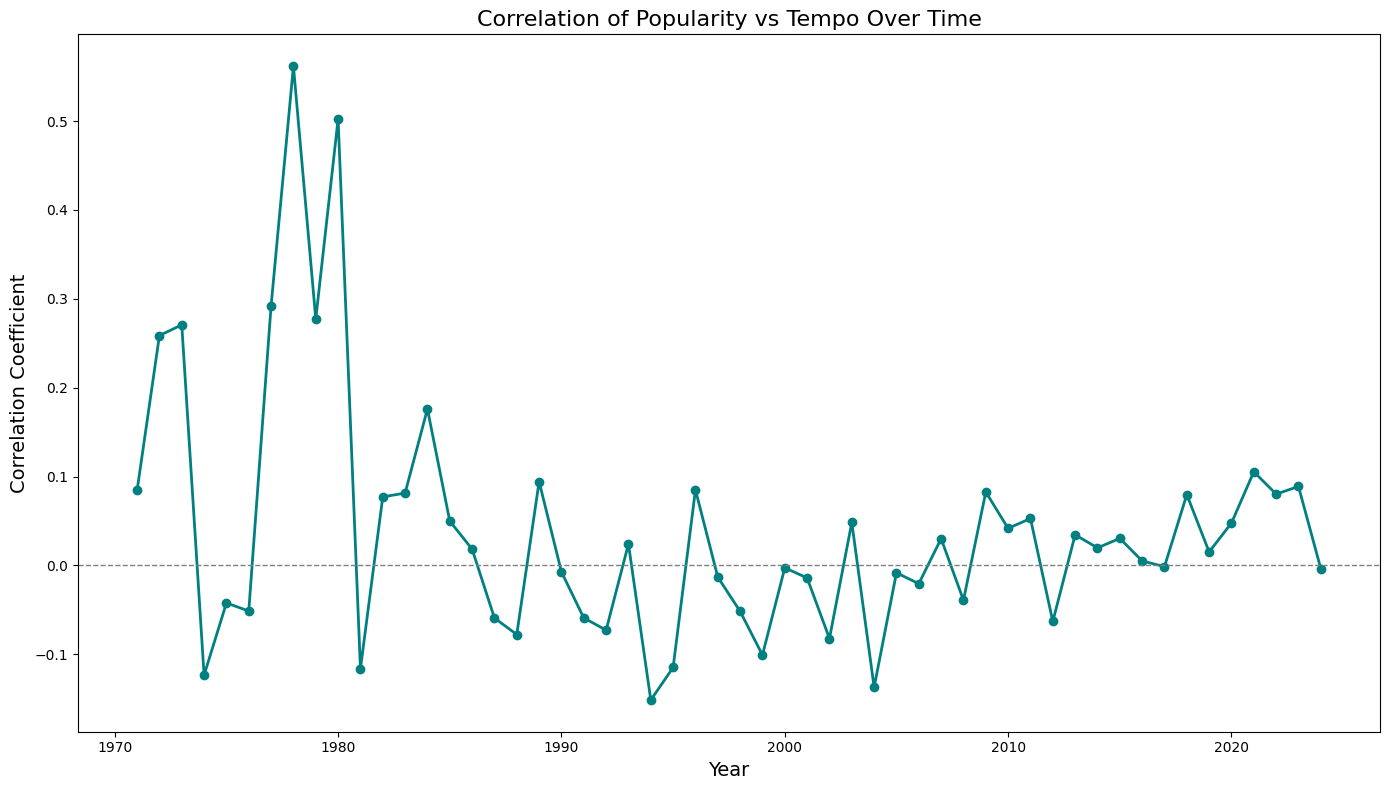

9. Analysing valence:


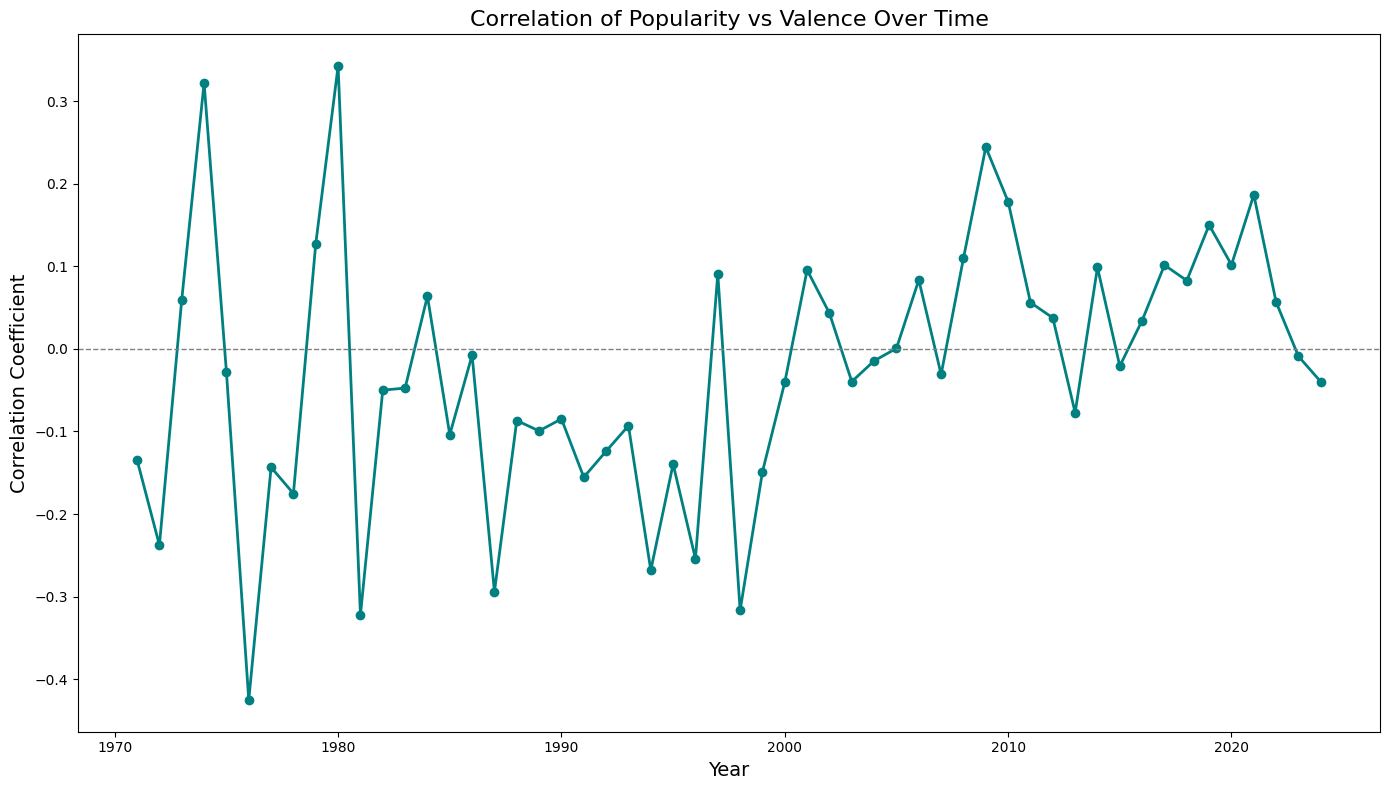

In [ ]:
# Step 1: Select relevant columns and drop missing values
features_to_correlate = ['acousticness' , 'danceability' , 'duration_min' ,'energy' , 'instrumentalness' , 'liveness', 'speechiness', 'tempo', 'valence']
df = df[['year', 'popularity'] + features_to_correlate].dropna()

# Step 2: Create a dictionary to store correlation trends
correlation_trends = {feature: [] for feature in features_to_correlate}
years = sorted(df['year'].unique())

# Step 3: Loop through each year and compute correlations
for year in years:
    yearly_data = df[df['year'] == year]
    for feature in features_to_correlate:
        corr = yearly_data['popularity'].corr(yearly_data[feature])
        correlation_trends[feature].append(corr)

# Step 4: Create a DataFrame for plotting
corr_df = pd.DataFrame(correlation_trends, index=years)

# Step 5: plotting
i=1
for feature in features_to_correlate:
    print(f'{i}. Analysing {feature}:')
    plt.figure(figsize=(14, 8))
    plt.plot(corr_df.index, corr_df[feature], marker='o', linewidth=2, color='teal')

    # Customize each plot
    plt.title(f'Correlation of Popularity vs {feature.capitalize()} Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Correlation Coefficient', fontsize=14)
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    i+=1
    print("===="*50)

**1. Correlation of Popularity vs. Acousticness**

Historical Extreme (Late 70s/Early 80s): The correlation hits its most extreme negative point around 1980 (approximately -0.85). This was the era of electronic music and heavily produced rock, where being highly acoustic was a massive barrier to mainstream success.

Stabilization (Post-2000s): Since the late 1990s, the relationship has stabilized to a weak negative correlation (approximately 0.1 to -0.3).

Conclusion: The negative predictive power of acousticness has significantly lessened compared to the 80s, but being non-acoustic still provides a slight advantage in today's market. The final years show a slight bump towards zero, suggesting acoustic music may be becoming less penalized.

**2. Correlation of Popularity vs. Danceability**

Historical Peak (Late 70s): Danceability shows the most dramatic historical peak, with a very strong positive correlation (approximately 0.78) around 1978-1979. This confirms the disco/dance craze of that period where danceability was a near-guarantee of a hit.

Volatility (1990-2000s): The correlation became highly erratic, swinging between positive and negative, demonstrating that danceability was no longer a reliable metric for hits in the post-disco landscape.

Modern Trend (Post-2010): The relationship stabilized into a weakly positive correlation (approximately 0.0 to 0.2) until around 2020. The final two points show a drop back towards a neutral/negative correlation, suggesting that danceability's role as a key predictor is diminishing.

**3. Correlation of Popularity vs. Duration (min)**

Historical Peak (Mid-70s): Duration once had a strong positive correlation (approximately 0.8) around 1976. This reflects an era where album tracks or longer cinematic pieces were more likely to become hits.

Modern Stabilization: The correlation became consistently weak and hovered tightly around the zero line from the 2010s onward (approximately -0.1 to 0.0).

Conclusion: The length of a track is currently not a meaningful linear predictor of its overall popularity, although its predictive power was once strong. This aligns with modern market preference for standardized track lengths.

**4. Correlation of Popularity vs. Energy**

Historical Peak (1980): Energy hit its maximum positive correlation (approximately 0.65) around 1980, indicating high-energy tracks were essential hits in the early 80s.

Sustained Positive Trend: Despite volatility, the correlation has been predominantly positive since the mid-1990s, consistently staying above the zero line (approximately 0.0 to 0.3).

Conclusion: Energy is the most consistent positive long-term predictor among the features examined. The current positive correlation suggests that tracks with higher intensity and volume have a lasting, stable advantage in achieving popularity.

**5. Correlation of Popularity vs. Instrumentalness**

Historical Trough (Late 70s): The correlation was initially strongly negative (approximately -0.85) in the late 1970s.

Modern Trend: It hovered around -0.2 from after 1980 to mid 2000s. The correlation has been consistently negative for the past 15 years.

Conclusion: Vocal presence has a clear and enduring advantage. While the final point shows a slight uptick toward positive correlation, the overall historical trend confirms that instrumental music faces a popularity penalty.

**6. Correlation of Popularity vs. Liveness**

Historical Volatility: Liveness shows extreme volatility in the early years, swinging sharply from positive (approximately 0.4) to negative (approximately -0.5).

Modern Trend: Since the late 1990s, the relationship has stabilized and clusters closely around the zero line (approximately -0.1 to 1.0).

Conclusion: After decades of dramatic swings, the liveness of a recording is now irrelevant to its popularity on average. Studio and live tracks are equally likely to become hits.

**7. Correlation of Popularity vs. Speechiness Over Time**

Historical Peak and Crash (Mid-70s): The plot shows a brief, sharp, and strong positive correlation (approximately 0.4) around 1974-1975, suggesting that for a short period, tracks with higher spoken-word content were highly favored hits. However, this peak was immediately followed by a steep plunge to a strong negative correlation (approximately -0.4), showing a dramatic and immediate rejection of high speechiness hits afterward.

Long-Term Trend (1980s-1990s): After the initial volatility, the correlation spent most of the 1980s and 1990s clustered in the negative territory (approximately -0.1 to 0.2), indicating that vocal-centric music was generally more popular than spoken word content during those decades.

Modern Stabilization (Post-2000s): Since the 2000s, the correlation has been highly volatile but has been centered near the zero line. This means that in the modern era, the relationship is neutral or only very weakly predictive.

Conclusion: High speechiness has not been a reliable driver of mass popularity for decades. Today, the correlation is too close to zero to be meaningful, confirming that spoken word content is a niche category that does not provide a statistical advantage in achieving mainstream success.

**8. Correlation of Popularity vs. Tempo**

Historical Peak (Late 70s): Tempo had a very strong positive correlation (approximately 0.55) in the late 1970s, indicating a clear market for high-tempo hits in that era.

Modern Stabilization: The correlation has been highly erratic but centered exactly on the zero line for the past 25 years.

Conclusion: Tempo is a non-predictive feature of popularity in the modern streaming environment. The speed of a song does not influence its overall likelihood of becoming a hit.

**9. Correlation of Popularity vs. Valence**

Historical Volatility: Valence has been the most volatile feature, swinging wildly between strong positive and strong negative correlations throughout the 1970s and 1980s.

Modern Trend: Since the early 2000s, the correlation has been highly erratic but centered on the zero line. There was a recent positive spike around 2010 (approximately 0.25) and from mid 2010s the correlation is slightly positive.

Conclusion: The mood of a track is not a reliable long-term predictor of success. While individual years may favor happy or sad songs, the overall trend is one of neutrality. In the most recent years positive mood seems to be slightly dominating.

##**11. Outlier Analysis**

In [ ]:
#Calculating the values of 1st and 3rd Quartile
Q3=df['popularity'].quantile(0.75)
Q1=df['popularity'].quantile(0.25)
#Calculating Inter Quartile Range
IQR=Q3-Q1
#Calculating Upper-extreme
up_extreme=Q3+1.5*IQR
print(up_extreme)

70.0


**Languagewise Outlier Distribution**

In [ ]:
#Filtering Outliers
outliers=df[df['popularity']>=up_extreme]

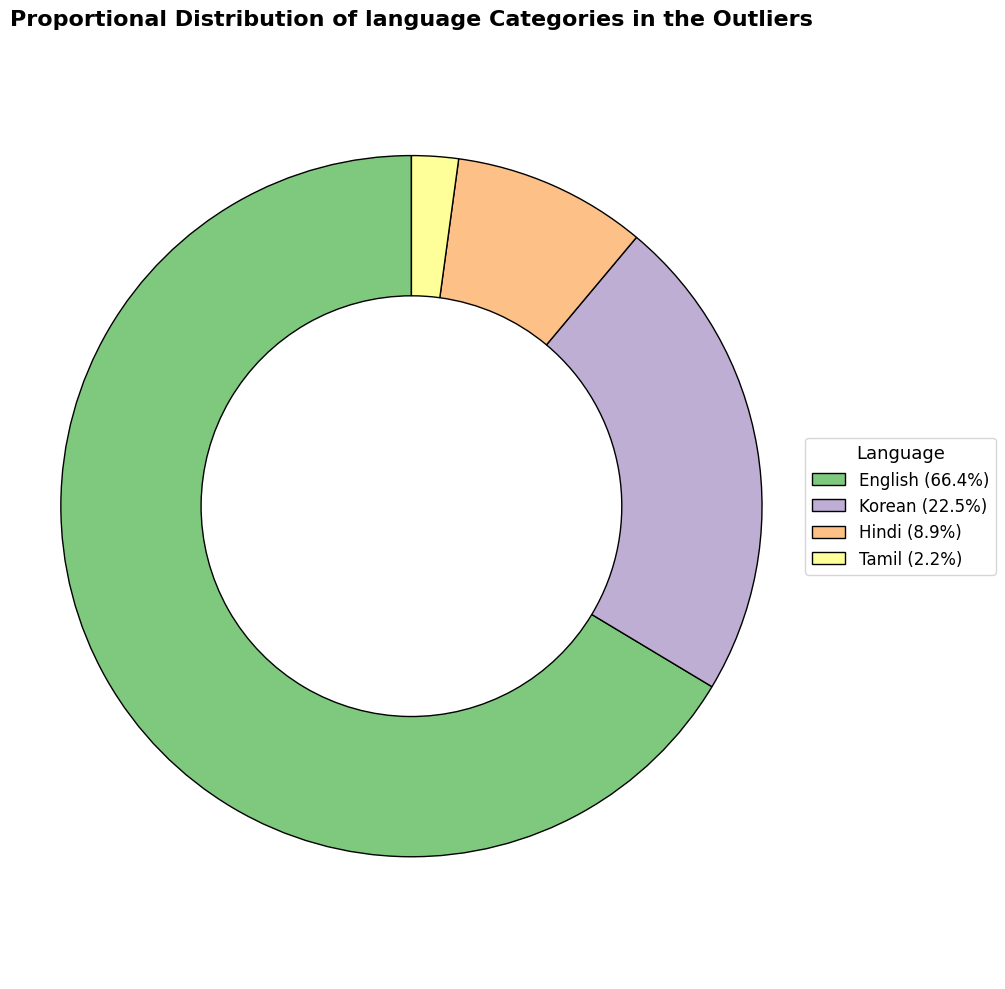

In [ ]:
def plot_categorical_donut_with_legend(dataframe, column_name, n_categories=7, figsize=(10, 10)):
    """
    Generates and displays a donut chart for the top N categories of a specified column,
    using a legend with percentages instead of direct labels to avoid clutter.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the categorical column to plot.
    - n_categories (int): Number of top categories to show, rest grouped as 'Other'.
    - figsize (tuple): Figure size (width, height).
    """
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Value counts
    counts = dataframe[column_name].value_counts()

    # Top categories + Other
    if len(counts) > n_categories:
        top_n = counts.head(n_categories)
        other_sum = counts.iloc[n_categories:].sum()
        plot_data = pd.concat([top_n, pd.Series({'Other': other_sum})]) if other_sum > 0 else top_n
    else:
        plot_data = counts

    # Calculate percentages for legend labels
    total = plot_data.sum()
    percentages = plot_data / total * 100
    legend_labels = [f"{label} ({percent:.1f}%)" for label, percent in zip(plot_data.index, percentages)]

    # Colors
    colors = sns.color_palette('Accent', n_colors=len(plot_data))
    if 'Other' in plot_data.index:
        colors[-1] = 'gray'  # Make 'Other' gray

    # Plot
    fig, ax = plt.subplots(figsize=figsize)

    wedges, _ = ax.pie(
        plot_data,
        labels=None,               # No labels inside
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1)
    )

    # Add legend with percentages
    ax.legend(
        wedges,
        legend_labels,
        title=column_name.capitalize(),
        loc='center left',
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=12,
        title_fontsize=13
    )

    ax.set_title(f'Proportional Distribution of {column_name} Categories in the Outliers',
                 fontsize=16, fontweight='bold')
    ax.axis('equal')  # Ensure circular donut
    plt.tight_layout()
    plt.show()

#Fuction call
plot_categorical_donut_with_legend(outliers, 'language', n_categories=5, figsize=(10, 10))


​Key Insight (English Dominance): English tracks overwhelmingly dominate the outliers, accounting for 66.4% of the total.
​Interpretation: This suggests that unusual, unique, or extreme music (whether due to experimental sounds, unusual length, or extreme production values) is far more likely to occur within the English-language music catalog compared to other languages. This is likely due to the sheer size and genre diversity of the global English music market.


​Key Insight (Korean Outliers): Korean music is the second-largest source of outliers at 22.5%, significantly higher than its overall proportion in the dataset.


​Interpretation: This is a noteworthy finding. It suggests that while the volume of Korean tracks is lower than English, the variability and extremity of those tracks are quite high. This could be due to the wide range of production styles or experimental tracks included from the K-Pop and K-Indie scenes.


​Minimal Outliers: Hindi (8.9%) and Tamil (2.2%) contribute very little to the outlier pool, indicating that music in these languages tends to adhere more closely to standard, common feature ranges.

**Year_group wise Outlier Distribution**

**A Brief Analysis of Outliers with Different Numerical variables**

1. Analysing popularity
Central Tendency of popularity:
   Mean popularity: 75.65
   Median popularity: 74.00
   Mode popularity: [70]

   popularity Description:
count    604.000000
mean      75.647351
std        4.933032
min       70.000000
25%       72.000000
50%       74.000000
75%       78.250000
max       93.000000
Name: popularity, dtype: float64

   Kurtosis of popularity: 0.0981
   Skewness of popularity: 0.9261



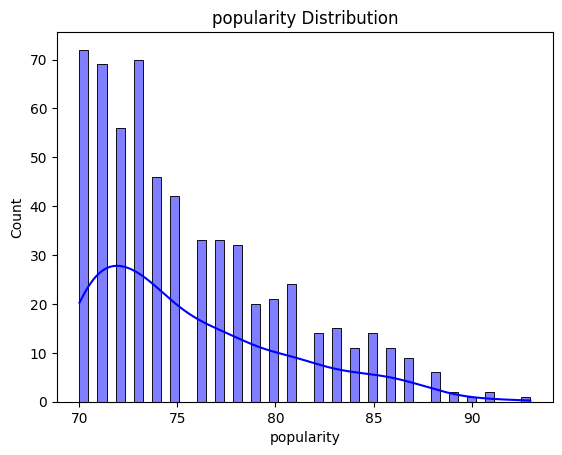


2. Analysing acousticness
Central Tendency of acousticness:
   Mean acousticness: 0.25
   Median acousticness: 0.13
   Mode acousticness: [0.111, 0.179]

   acousticness Description:
count    604.000000
mean       0.250584
std        0.273183
min        0.000220
25%        0.030975
50%        0.132500
75%        0.398000
max        0.964000
Name: acousticness, dtype: float64

   Kurtosis of acousticness: -0.1015
   Skewness of acousticness: 1.0754



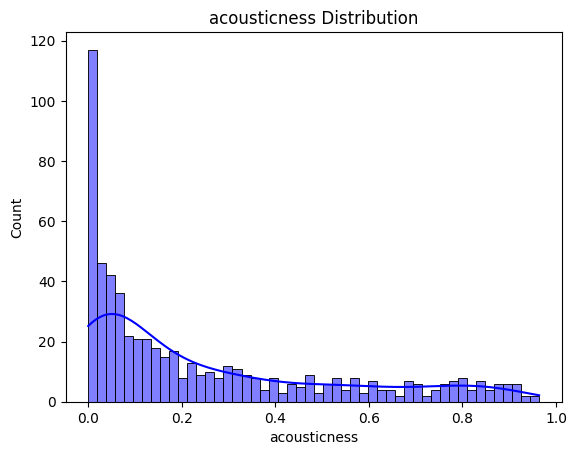


3. Analysing danceability
Central Tendency of danceability:
   Mean danceability: 0.63
   Median danceability: 0.63
   Mode danceability: [0.575]

   danceability Description:
count    604.000000
mean       0.633068
std        0.129681
min        0.247000
25%        0.564000
50%        0.633000
75%        0.726000
max        0.934000
Name: danceability, dtype: float64

   Kurtosis of danceability: 0.0265
   Skewness of danceability: -0.3247



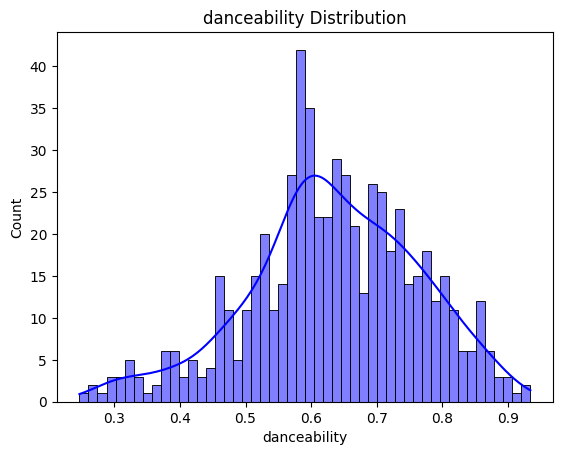


4. Analysing duration_min
Central Tendency of duration_min:
   Mean duration_min: 3.72
   Median duration_min: 3.64
   Mode duration_min: [3.219116666666667, 3.34, 3.57845]

   duration_min Description:
count    604.000000
mean       3.722240
std        0.825629
min        0.603783
25%        3.205192
50%        3.639783
75%        4.109596
max       10.217117
Name: duration_min, dtype: float64

   Kurtosis of duration_min: 8.3893
   Skewness of duration_min: 1.5810



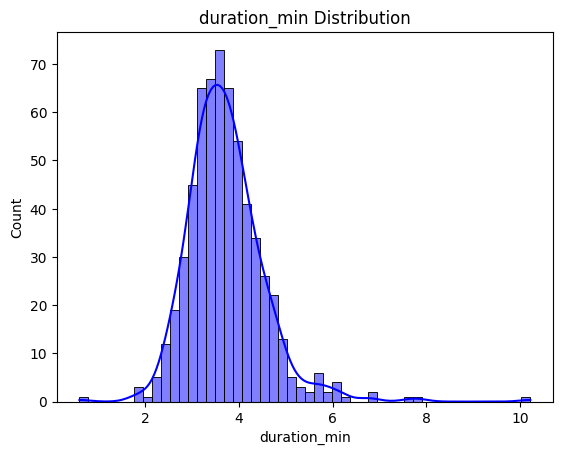


5. Analysing energy
Central Tendency of energy:
   Mean energy: 0.66
   Median energy: 0.69
   Mode energy: [0.741]

   energy Description:
count    604.000000
mean       0.664680
std        0.181191
min        0.051900
25%        0.556750
50%        0.694500
75%        0.799250
max        0.981000
Name: energy, dtype: float64

   Kurtosis of energy: -0.0906
   Skewness of energy: -0.6778



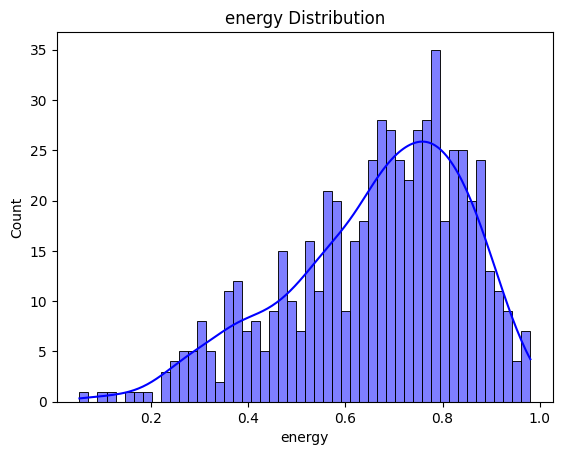


6. Analysing instrumentalness
Central Tendency of instrumentalness:
   Mean instrumentalness: 0.01
   Median instrumentalness: 0.00
   Mode instrumentalness: [0.0]

   instrumentalness Description:
count    604.000000
mean       0.008144
std        0.061085
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000037
max        0.828000
Name: instrumentalness, dtype: float64

   Kurtosis of instrumentalness: 109.0036
   Skewness of instrumentalness: 10.0251



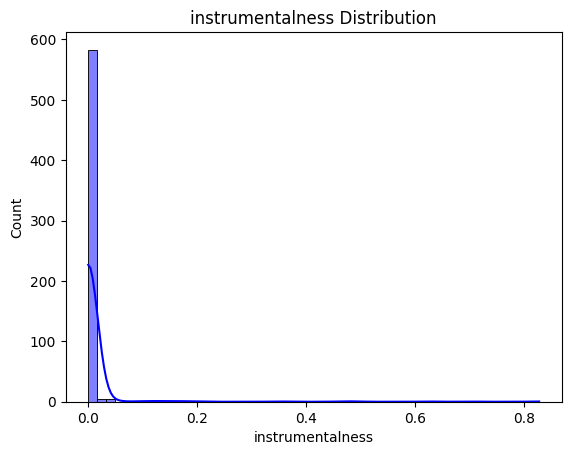


7. Analysing liveness
Central Tendency of liveness:
   Mean liveness: 0.16
   Median liveness: 0.12
   Mode liveness: [0.108]

   liveness Description:
count    604.000000
mean       0.164119
std        0.129077
min        0.022200
25%        0.089400
50%        0.115000
75%        0.185000
max        0.949000
Name: liveness, dtype: float64

   Kurtosis of liveness: 6.3021
   Skewness of liveness: 2.3144



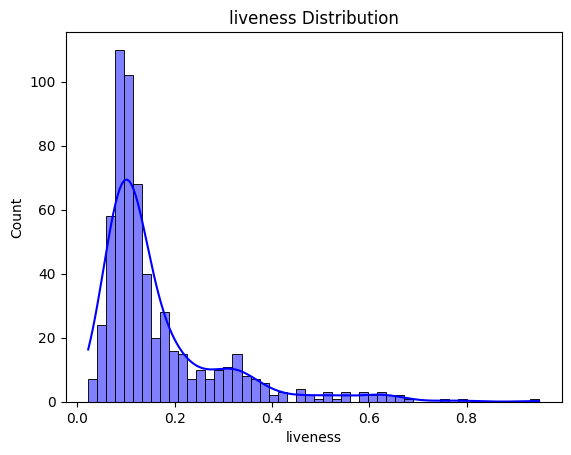


8. Analysing speechiness
Central Tendency of speechiness:
   Mean speechiness: 0.07
   Median speechiness: 0.05
   Mode speechiness: [0.0278]

   speechiness Description:
count    604.000000
mean       0.071548
std        0.061536
min        0.023200
25%        0.035150
50%        0.047100
75%        0.079775
max        0.438000
Name: speechiness, dtype: float64

   Kurtosis of speechiness: 7.8393
   Skewness of speechiness: 2.5671



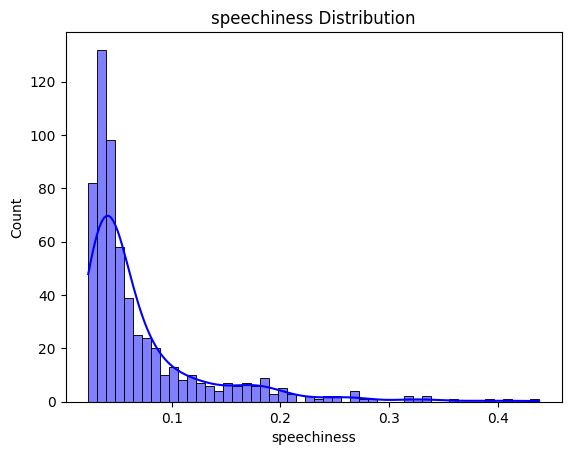


9. Analysing tempo
Central Tendency of tempo:
   Mean tempo: 120.04
   Median tempo: 118.69
   Mode tempo: [130.033]

   tempo Description:
count    604.000000
mean     120.038485
std       27.490409
min       62.881000
25%       97.999500
50%      118.686000
75%      136.001500
max      205.846000
Name: tempo, dtype: float64

   Kurtosis of tempo: -0.3160
   Skewness of tempo: 0.4921



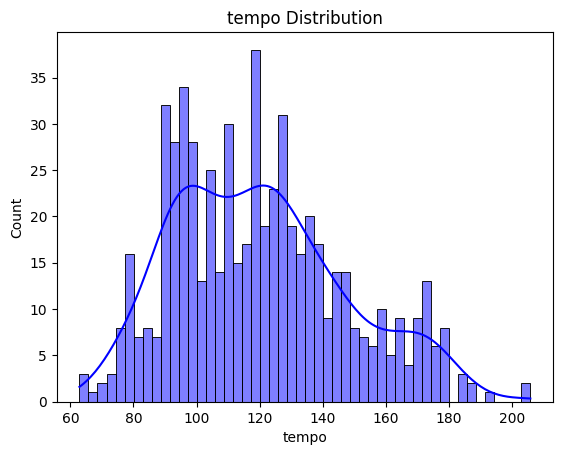


10. Analysing valence
Central Tendency of valence:
   Mean valence: 0.50
   Median valence: 0.50
   Mode valence: [0.534, 0.842]

   valence Description:
count    604.000000
mean       0.502786
std        0.222476
min        0.037400
25%        0.343750
50%        0.497000
75%        0.665000
max        0.979000
Name: valence, dtype: float64

   Kurtosis of valence: -0.7546
   Skewness of valence: 0.0453



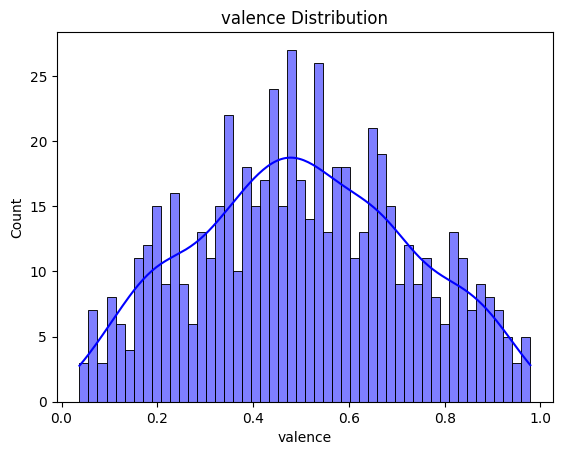

In [ ]:
colsToAnalyse=['popularity' , 'acousticness' , 'danceability' , 'duration_min' ,'energy' , 'instrumentalness' , 'liveness', 'speechiness', 'tempo', 'valence']
i=1
for col in colsToAnalyse:
  print(f'{i}. Analysing {col}')
  print(f"Central Tendency of {col}:")
  print(f"   Mean {col}: {outliers[col].mean():.2f}")
  print(f"   Median {col}: {outliers[col].median():.2f}")
  print(f"   Mode {col}: {outliers[col].mode().tolist()}") # .mode() can return multiple if equally frequent
  print(f"\n   {col} Description:")
  print(outliers[col].describe())
  print(f"\n   Kurtosis of {col}: {outliers[col].kurtosis():.4f}")
  print(f"   Skewness of {col}: {outliers[col].skew():.4f}")
  print()
  i+=1
  sns.histplot(data=outliers, x=col, kde=True,bins=50, color='blue', edgecolor='black')
  plt.title(f'{col} Distribution')
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  plt.xticks(rotation = 0)
  plt.grid(False)
  plt.show()
  print()

**1. Popularity Distribution (Subset)**

​Central Tendency: Mean = 75.65 and Median  = 74.00


Distribution: The distribution is right skewed
​Insight: As we go right, the count of songs decreases. It clearly reflects the same picture that we have got in the popularity distribution including all songs. It proves that real elite class songs are extremely rare.

**​2. Acousticness Distribution (Subset)**

​Central Tendency: Median = 0.13


​Distribution: The distribution is highly clustered near zero
​Insight: Acoustic music is strongly penalized even among hits. The median confirms that the typical hit track has very low acoustic content. While the maximum reaches 0.96, tracks with high acousticness are statistically rare exceptions in the highest popularity tier.

**​3. Danceability Distribution (Subset)**

​Central Tendency: Mean = 0.63 and Median = 0.633


​Distribution: The distribution is well-defined and centered at a high value, with a low standard deviation( approximately 0.130).
​Insight: High Danceability is a necessary, non-negotiable feature of hit songs. The tightness of the distribution confirms that low danceability is strongly filtered out by the time a track reaches this elite popularity tier. The median score is well above the midpoint, indicating a core requirement for rhythmic engagement.

**​4. Duration (min) Distribution (Subset)**

​Central Tendency: Mean =3.72 min and Median = 3.64 min


​Distribution: Extremely concentrated and peaked (Kurtosis=8.389). 75% of tracks are 4.1 minutes or less.
​Insight: The success zone is extremely narrow, confirming an optimal track length for hits centered tightly around 3.5 - 4 minutes. The high concentration highlights the economic pressure for standardization in the streaming age; overly long tracks are statistically excluded from elite success.

**​5. Energy Distribution (Subset)**

​Central Tendency: Mean = 0.66 and Median = 0.69


​Distribution: The distribution is negatively skewed (Skewness=-0.67) and tightly centered toward the high end, peaking around 0.7 to 0.8.
​Insight: High Energy is a defining characteristic of hit songs. The high median and negative skew indicate that success is strongly biased toward intense, loud, and active production. Low-energy tracks rarely break into the highest popularity tier.

**​6. Instrumentalness Distribution (Subset)**
​
​Central Tendency: Median = 0.0


​Distribution: Extreme positive skew (Skewness=10.02) with =75% of tracks having a score of 0.000037 or less.
​Insight: This confirms that vocals are an essential prerequisite for elite success. Instrumental tracks are overwhelmingly statistically excluded from the highest popularity tier. Instrumental music is a niche that does not translate to mass consumption popularity.

**​7. Liveness Distribution (Subset)**

​Central Tendency: Median= 0.115


​Distribution: Highly clustered near zero (Skewness=2.31).
​Insight: Hits are overwhelmingly studio-recorded. The liveness score confirms that the market favors the polished, controlled sound of professional studio production over the unpredictable nature of live recordings, which are rare exceptions in this subset.

**​8. Speechiness Distribution (Subset)**
​
​Central Tendency: Median = 0.047


​Distribution: Highly concentrated and peaked at the low end (Kurtosis=7.839)
​Insight: Success relies heavily on sung vocals, not spoken word. Tracks with significant speech content (scores above 0.4) are virtually absent from the hit list, confirming that Speechiness acts as a strong barrier to mass commercial success.

**​9. Tempo Distribution (Subset)**
​
​Central Tendency: Mean = 120.04 BPM and Median = 118.69 BPM


​Distribution: The distribution is bimodal (or highly multi-modal), showing a clear density around 90-100 BPM and another around 120-130 BPM.
​Insight: Unlike many other features, Tempo is achieved across two major style centers (mid-tempo/hip-hop and dance/pop). The overall average tempo is moderate, but the bimodal shape confirms that success is possible in both slower and faster rhythmic styles.

**10. Valence Distribution (Subset)**

​Central Tendency: Mean/Median =0.50


​Distribution: The distribution is highly symmetrical (Skewness=0.045) and spread across the entire spectrum.
​Insight: Mood is not a strong requirement for success. Hits are normally distributed across the entire mood spectrum. This confirms the earlier finding that both happy and sad songs are equally capable of becoming blockbuster hits.

**Number of Songs ( Outlliers) Released Per Year by Language**

In [ ]:
#Grouping
outliers_per_year = outliers.groupby(['year', 'language']).size().reset_index(name='outlier_count')

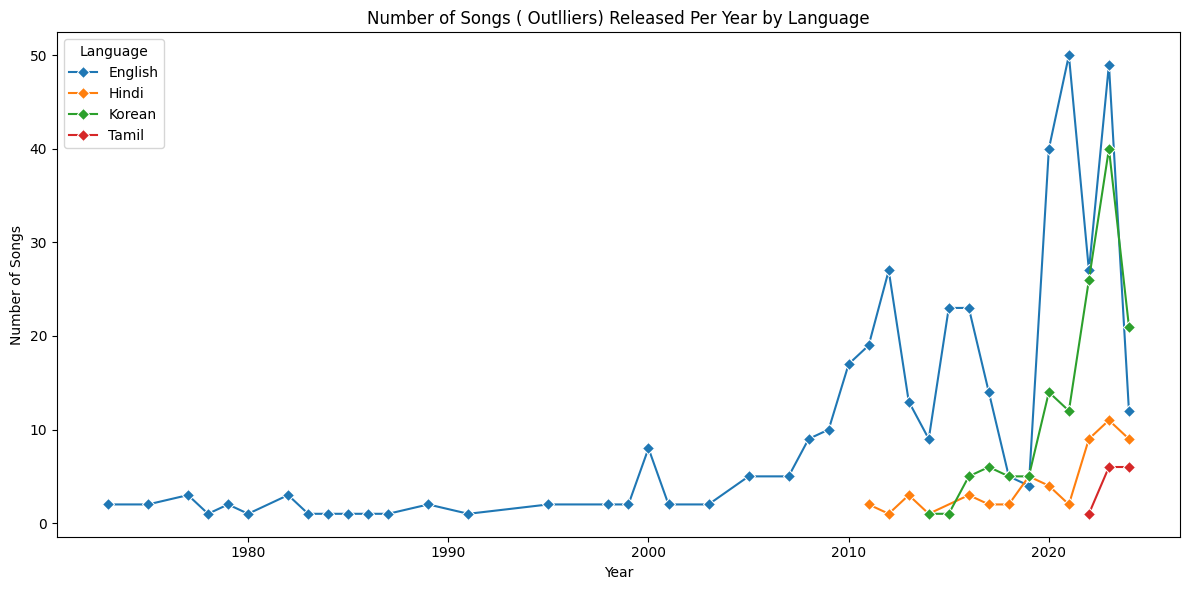

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=outliers_per_year, x='year', y='outlier_count', hue='language', marker='D')

plt.title('Number of Songs ( Outlliers) Released Per Year by Language')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(False)
plt.legend(title='Language')
plt.tight_layout()
plt.show()

**Key Insight (Temporal Surge):** The release of outliers has skyrocketed since 2010, confirming that the rise of digital music platforms has led to a major increase in the diversity and extremity of music being released and collected.

**Key Insight (English Volatility):** English outliers (blue) show extreme volatility and the highest peaks, reaching about 50 outliers per year in the recent period. This reinforces its role as the primary source of non-standard music.

**Key Insight (Korean Growth):** Korean outliers (green) show a steady and accelerating increase since 2015, peaking sharply alongside English. This is strong evidence of the growing experimental and genre-crossing nature of the Korean music market over the last decade.

**Key Insight (Stability)**: Hindi (orange) and Tamil (red) show a much flatter trend line, indicating that the proportional growth in outliers for these languages is minimal.

##**12. Elite Performances**

**Top 10 One Hit Wonders ( by Popularity)**

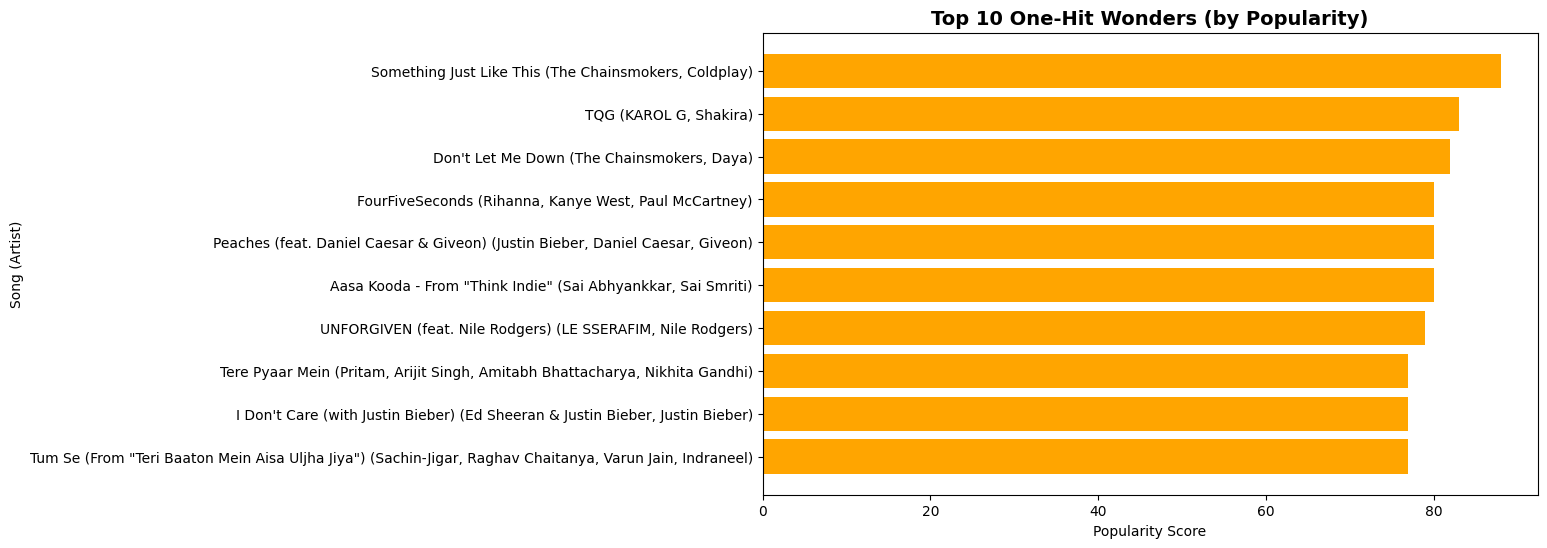

In [ ]:
artist_song_count = df.groupby("artist_name")["track_name"].nunique()
one_hit_artists = artist_song_count[artist_song_count == 1].index
one_hit_songs = df[df["artist_name"].isin(one_hit_artists)][
    ["artist_name", "track_name", "popularity"]
]
top_one_hit = one_hit_songs.sort_values("popularity", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(
    top_one_hit["track_name"] + " (" + top_one_hit["artist_name"] + ")",
    top_one_hit["popularity"],
    color="orange"
)
plt.gca().invert_yaxis()
plt.title("Top 10 One-Hit Wonders (by Popularity)", fontsize=14, weight="bold")
plt.xlabel("Popularity Score")
plt.ylabel("Song (Artist)")
plt.show()

## Interpretation

The chart shows popularity scores for Top 10 one-hit wonder songs, with popularity scores ranging from approximately 77 to 87.

**Key Observations:**

1. **Close Competition**: All songs have popularity scores within a narrow 10-point range (77-87), indicating relatively similar levels of success.

2. **Top Three Dominance**: "Something Just Like This," "TQG," and "Don't Let Me Down" occupy the top positions with scores between 85-87.

3. **Minimal Variation**: The bars are nearly uniform in length, with "Something Just Like This" leading by only a small margin over the last-place song.

4. **Even Distribution**: There's no dramatic drop-off between ranks - the popularity decreases gradually and consistently from #1 to #10.

## Overall Observation

The data reveals a tight clustering of popularity scores, with less than a 10-point spread across all 10 songs. This suggests these one-hit wonders achieved comparable levels of mainstream success.

## Summary

All 10 songs demonstrated strong popularity within a narrow score range of 77-87, with "Something Just Like This" at the top (≈87) and "Tum Se" at the bottom (≈77). The minimal variation indicates these tracks were similarly successful despite their different rankings.

**Top 10 English One Hit Wonders (By Popularity)**

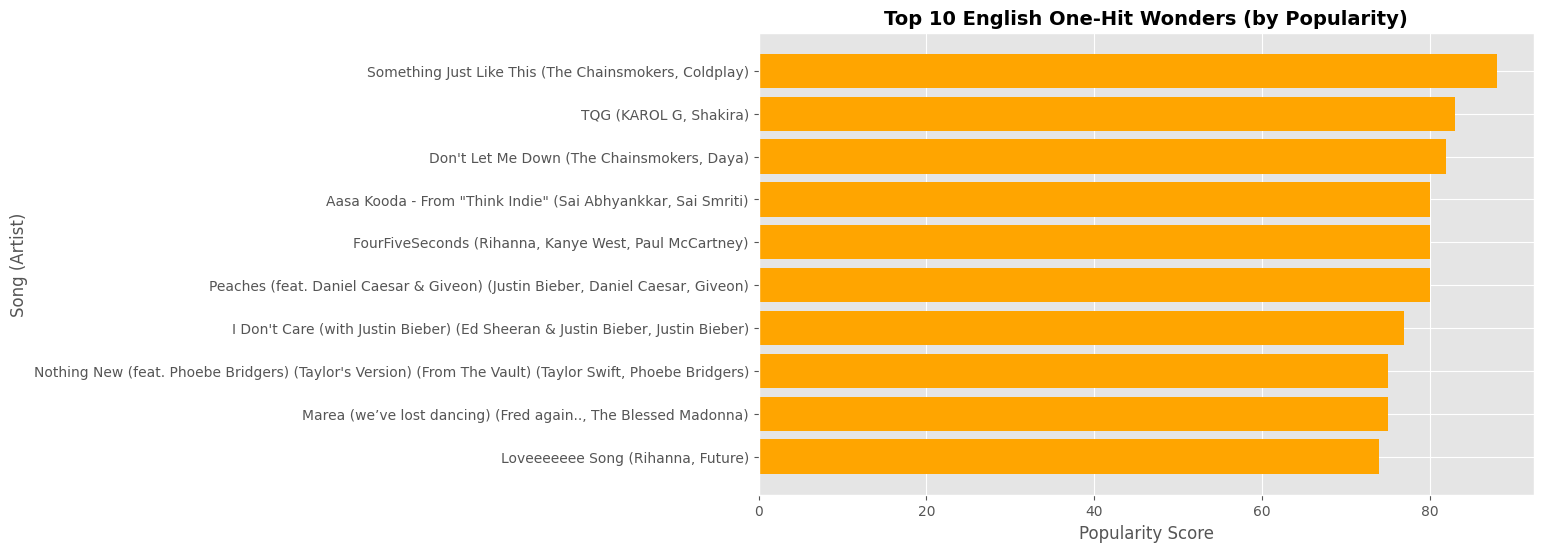

In [ ]:
df_English=df[df['language']=='English']
artist_song_count = df_English.groupby("artist_name")["track_name"].nunique()
one_hit_artists = artist_song_count[artist_song_count == 1].index
one_hit_songs = df_English[df_English["artist_name"].isin(one_hit_artists)][
    ["artist_name", "track_name", "popularity"]
]
top_one_hit = one_hit_songs.sort_values("popularity", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(
    top_one_hit["track_name"] + " (" + top_one_hit["artist_name"] + ")",
    top_one_hit["popularity"],
    color="orange"
)
plt.gca().invert_yaxis()
plt.title("Top 10 English One-Hit Wonders (by Popularity)", fontsize=14, weight="bold")
plt.xlabel("Popularity Score")
plt.ylabel("Song (Artist)")
plt.show()

## Interpretation

The chart displays popularity scores for the top 10 English one-hit wonder songs, ranging from approximately 72 to 88.

**Key Observations:**

1. **Clear Leader**: "Something Just Like This" has the highest popularity score at approximately 88, leading the chart.

2. **Top Three Cluster**: The top three songs ("Something Just Like This," "TQG," and "Don't Let Me Down") have scores between 82-88, showing stronger performance than the rest.

3. **Mid-Tier Grouping**: Songs ranked 4-7 ("Aasa Kooda," "FourFiveSeconds," "Peaches," and "I Don't Care") cluster tightly around the 80-82 range.

4. **Bottom Three Gap**: The last three songs ("Nothing New," "Marea," and "Loveeeeeee Song") show slightly lower scores (72-75), creating a more noticeable separation from the top seven.

5. **Score Spread**: The chart shows approximately a 16-point difference between the highest and lowest ranked songs, indicating moderate variation in popularity levels.

## Overall Observation

While all songs achieved significant popularity as one-hit wonders, there's a gradual decline in scores from top to bottom, with the most noticeable gap appearing between the 7th and 8th positions.

## Summary

The top 10 English one-hit wonders range from popularity scores of 72 to 88, with "Something Just Like This" leading at 88 and "Loveeeeeee Song" at the bottom with approximately 72. The distribution shows tighter clustering in the top seven positions (80-88) and a slight drop-off for the bottom three (72-75).

**Top 10 Hindi One Hit Wonders (By Popularity)**

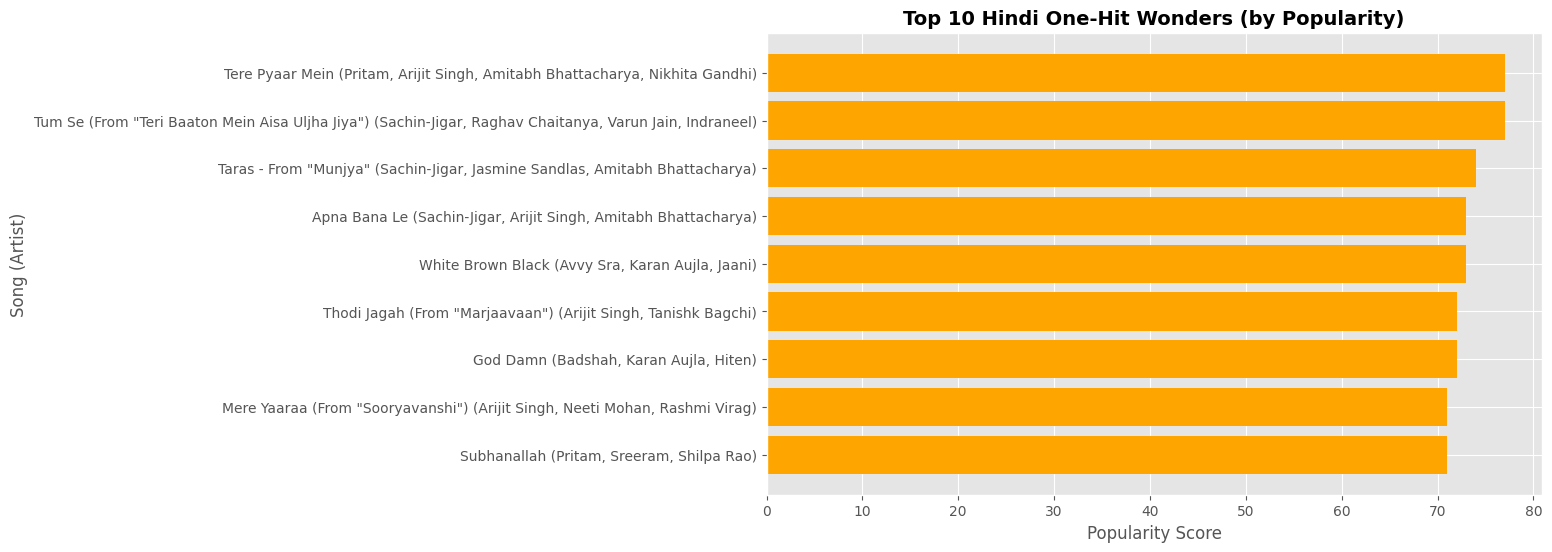

In [ ]:
df_Hindi=df[df['language']=='Hindi']
artist_song_count = df_Hindi.groupby("artist_name")["track_name"].nunique()
one_hit_artists = artist_song_count[artist_song_count == 1].index
one_hit_songs = df_Hindi[df_Hindi["artist_name"].isin(one_hit_artists)][
    ["artist_name", "track_name", "popularity"]
]
top_one_hit = one_hit_songs.sort_values("popularity", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(
    top_one_hit["track_name"] + " (" + top_one_hit["artist_name"] + ")",
    top_one_hit["popularity"],
    color="orange"
)
plt.gca().invert_yaxis()
plt.title("Top 10 Hindi One-Hit Wonders (by Popularity)", fontsize=14, weight="bold")
plt.xlabel("Popularity Score")
plt.ylabel("Song (Artist)")
plt.show()

## Interpretation

The chart displays popularity scores for the top 10 Hindi one-hit wonder songs, with scores ranging from approximately 71 to 77.

**Key Observations:**

1. **Extremely Close Competition**: All songs have popularity scores within a very narrow 6-point range (71-77), indicating nearly identical levels of success.

2. **Top Position**: "Tere Pyaar Mein" leads with the highest score at approximately 77, though the margin over other songs is minimal.

3. **Tight Clustering**: The top three songs ("Tere Pyaar Mein," "Tum Se," and "Taras") score between 75-77, showing virtually no separation.

4. **Uniform Mid-Section**: Songs ranked 4-8 ("Apna Bana Le," "White Brown Black," "Thodi Jagah," "God Damn," and "Mere Yaaraa") cluster tightly between 72-74.

5. **Minimal Drop-Off**: Even the last-placed song "Subhanallah" scores approximately 71, only 6 points behind the leader.

6. **Near-Identical Bar Lengths**: The visual representation shows remarkably similar bar lengths across all 10 songs, emphasizing the minimal variation.

## Overall Observation

The data reveals exceptionally tight clustering with minimal differentiation between ranks. The entire top 10 achieved nearly equivalent popularity levels, with less variation than typical rankings.

## Summary

The top 10 Hindi one-hit wonders show popularity scores ranging from 71 to 77, with "Tere Pyaar Mein" at the top (≈77) and "Subhanallah" at the bottom (≈71). The 6-point total spread indicates these songs achieved remarkably similar popularity levels, making this an unusually competitive ranking.

**Top 10 Artists by Number of Albums**

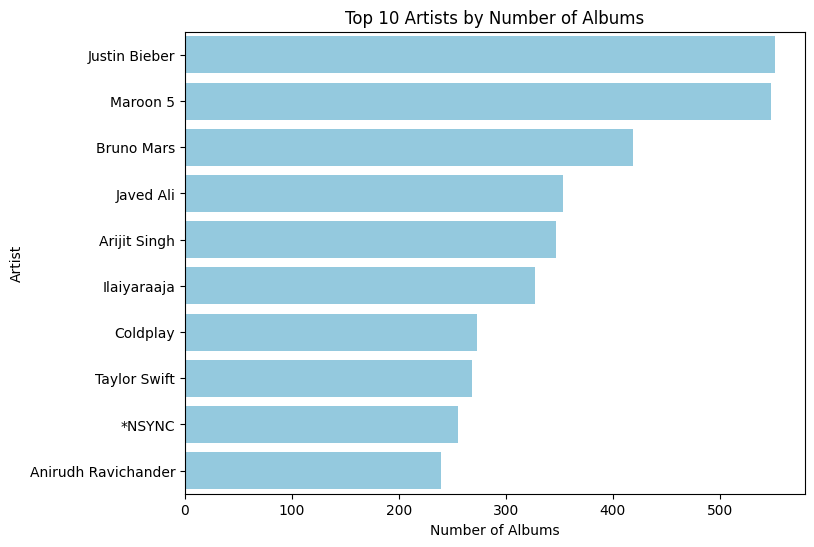

In [ ]:
top_artists = df.groupby("artist_name")["album_name"].nunique().nlargest(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_artists.values, y=top_artists.index, color="skyblue")
plt.xlabel("Number of Albums")
plt.ylabel("Artist")
plt.title("Top 10 Artists by Number of Albums")
plt.show()

## Interpretation

The chart displays the top 10 artists ranked by their number of albums, with counts ranging from approximately 240 to 550 albums.

**Key Observations:**

1. **Clear Top Two**: Justin Bieber and Maroon 5 lead significantly with approximately 550 albums each, substantially ahead of the remaining artists.

2. **Mid-Tier Cluster**: Bruno Mars (≈420 albums) occupies a distinct third position, followed by a tight grouping of Javed Ali, Arijit Singh, and Ilaiyaraaja (≈330-350 albums).

3. **Lower Tier Group**: Coldplay, Taylor Swift, *NSYNC, and Anirudh Ravichander form the bottom cluster with 240-270 albums, showing relatively similar output.

4. **Large Gap**: There's a notable difference of approximately 130 albums between the top two artists and third-placed Bruno Mars.

5. **Gradual Decline**: After the top two, the chart shows a steady, gradual decrease in album counts from rank 3 through rank 10.

## Overall Observation

The data shows a two-tier structure: Justin Bieber and maroon 5 as high-volume outliers, followed by a more gradual distribution among the remaining eight artists.

## Summary

The top 10 artists by album count range from approximately 240 to 550 albums. Justin Bieber and Maroon 5 dominate with around 550 albums each, while Anirudh Ravichander rounds out the list at approximately 240 albums. The 310-album spread indicates significant variation in output among these top artists.

**Top 10 Artists with Longest Singing Career**

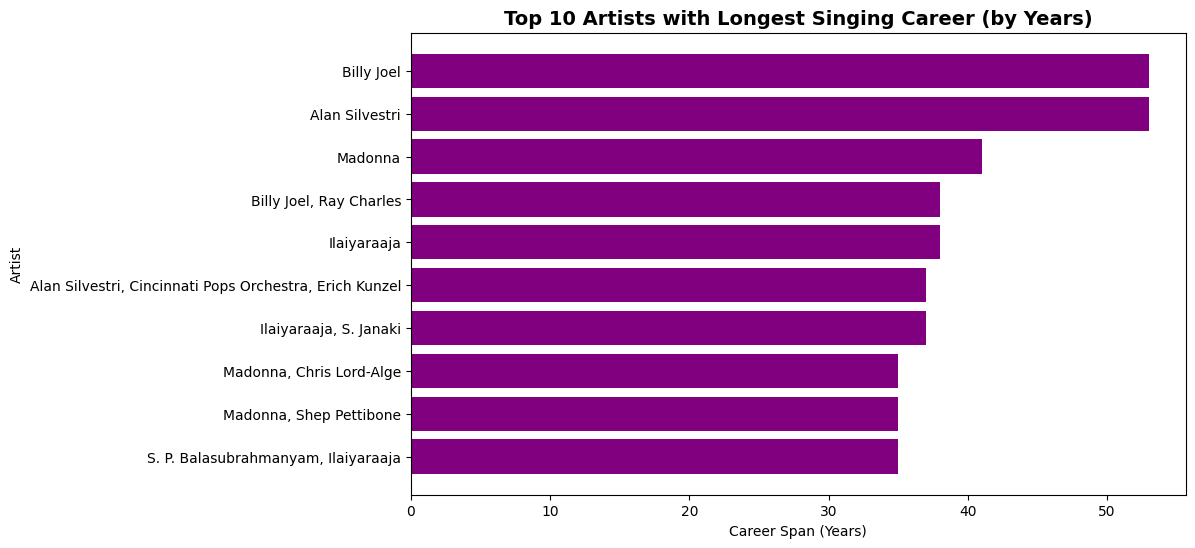

In [ ]:
# Calculate min and max year for each artist
artist_years = df.groupby("artist_name")["year"].agg(["min", "max"])

# Active career span in years
artist_years["career_span"] = artist_years["max"] - artist_years["min"]

# Top 10 longest careers
top_career = artist_years.sort_values("career_span", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_career.index, top_career["career_span"], color="purple")
plt.gca().invert_yaxis()
plt.title("Top 10 Artists with Longest Singing Career (by Years)", fontsize=14, weight="bold")
plt.xlabel("Career Span (Years)")
plt.ylabel("Artist")
plt.grid(False)
plt.show()

## Interpretation

The chart displays the top 10 artists with the longest singing careers, measured in years, with career spans ranging from approximately 35 to 53 years.

**Key Observations:**

1. **Top Two Leaders**: Billy Joel and Alan Silvestri share the longest careers at approximately 53 years each, clearly leading the ranking.

2. **Second Tier**: Madonna follows in third place with approximately 41 years, showing a significant 12-year gap from the top two.

3. **Mid-Range Cluster**: Artists ranked 4-7 (Billy Joel & Ray Charles, Ilaiyaraaja, Alan Silvestri & Cincinnati Pops Orchestra & Erich Kunzel, and Ilaiyaraaja & S. Janaki) have career spans between 37-38 years, forming a tight grouping.

4. **Bottom Three Uniformity**: The last three positions (Madonna & Chris Lord-Alge, Madonna & Shep Pettibone, and S. P. Balasubrahmanyam & Ilaiyaraaja) all show nearly identical career spans of approximately 35 years.

5. **Consistent Decline**: After the top two outliers, there's a gradual, steady decrease in career length from position 3 through position 10.

6. **18-Year Range**: The total spread between longest (53 years) and shortest (35 years) careers is approximately 18 years.

## Overall Observation

The chart reveals two distinct career length leaders at 53 years, followed by a relatively even distribution among the remaining eight artists spanning 35-41 years.

## Summary

The top 10 artists with longest singing careers range from 35 to 53 years. Billy Joel and Alan Silvestri lead with 53-year careers, while S. P. Balasubrahmanyam & Ilaiyaraaja round out the list at 35 years, showing an 18-year difference between the longest and shortest careers in this top 10.

**Artists with Most Songs in Top 10% Popularity**

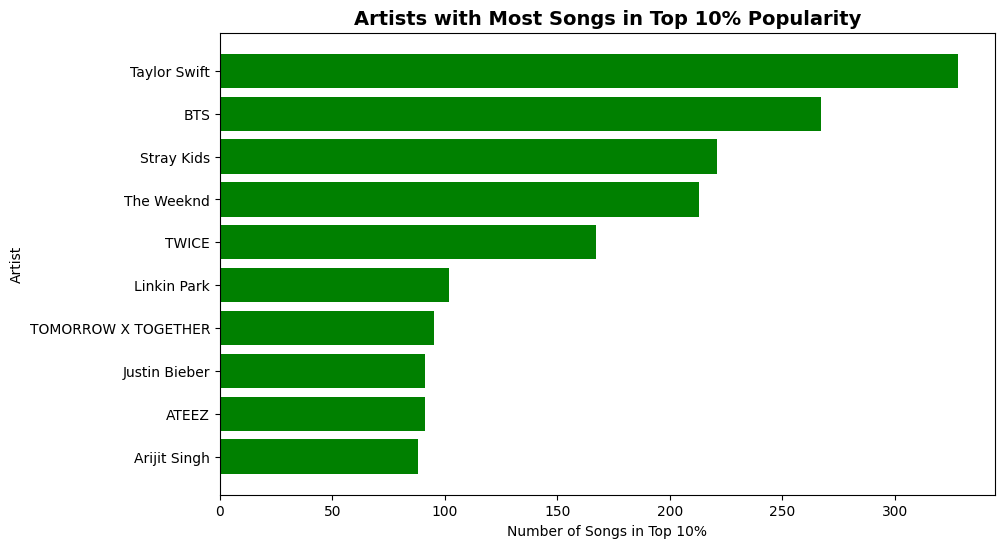

In [ ]:
# Popularity cutoff for top 10% songs
cutoff = df["popularity"].quantile(0.90)

# Keep only top 10% songs
top_songs = df[df["popularity"] >= cutoff]

# Count how many top 10% songs each artist has
artist_top_counts = top_songs["artist_name"].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(artist_top_counts.index, artist_top_counts.values, color="green")
plt.gca().invert_yaxis()
plt.title("Artists with Most Songs in Top 10% Popularity", fontsize=14, weight="bold")
plt.xlabel("Number of Songs in Top 10%")
plt.ylabel("Artist")
plt.show()

## Interpretation

The chart displays artists ranked by the number of songs they have in the top 10% popularity bracket, with counts ranging from approximately 90 to 330 songs.

**Key Observations:**

1. **Clear Leader**: Taylor Swift dominates with approximately 330 songs in the top 10% popularity, significantly ahead of all other artists.

2. **Second Position**: BTS holds second place with approximately 270 songs, showing a 60-song gap from Taylor Swift.

3. **Third and Fourth Tier**: Stray Kids (≈220 songs) and The Weeknd (≈215 songs) occupy positions 3-4 with very similar counts.

4. **Mid-Range Drop**: TWICE appears in fifth with approximately 170 songs, showing a notable 45-song decline from The Weeknd.

5. **Lower Tier Clustering**: Artists ranked 6-10 (Linkin Park, TOMORROW X TOGETHER, Justin Bieber, ATEEZ, and Arijit Singh) are tightly grouped between 90-105 songs, with minimal variation among them.

6. **Large Spread**: The 240-song difference between first and last place indicates substantial variation in popular song output across these top artists.

## Overall Observation

The chart shows a clear hierarchy with Taylor Swift as the dominant leader, followed by a gradual decline through BTS and mid-tier artists, before leveling off significantly among the bottom five artists.

## Summary

Artists with the most songs in the top 10% popularity range from 90 to 330 songs. Taylor Swift leads with 330 songs, while Arijit Singh rounds out the top 10 with approximately 90 songs, representing a 240-song spread across the ranking.

**Grouped Popularity of Top Songs by Rank Across Languages**

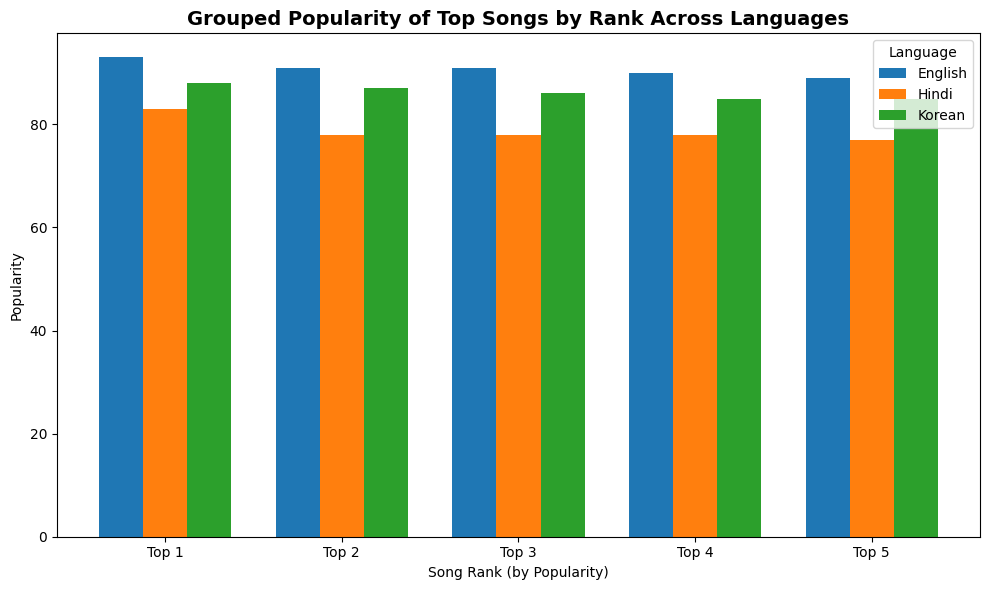

In [ ]:
languages = ["english", "hindi", "korean"]

# Collect top 5 songs (popularity) for each language
top_songs_per_lang = {}
for lang in languages:
    top_songs = (
        df[df["language"].str.lower() == lang]
        .nlargest(5, "popularity")[["artist_name", "popularity"]]
        .reset_index(drop=True)
    )
    # Store popularity values only
    top_songs_per_lang[lang.capitalize()] = top_songs["popularity"].tolist()

# Make DataFrame with rank as index (1st–5th) and languages as columns
max_rank = max(len(v) for v in top_songs_per_lang.values())
for lang in top_songs_per_lang:
    # pad with zeros if fewer than 5 songs
    top_songs_per_lang[lang] += [0] * (max_rank - len(top_songs_per_lang[lang]))

plot_df = pd.DataFrame(top_songs_per_lang, index=[f"Top {i}" for i in range(1, max_rank+1)])

# Plot grouped bar chart
x = np.arange(len(plot_df.index))  # rank positions
bar_width = 0.25

plt.figure(figsize=(10,6))
for i, lang in enumerate(plot_df.columns):
    plt.bar(x + i*bar_width, plot_df[lang], width=bar_width, label=lang)

plt.xticks(x + bar_width, plot_df.index)
plt.title("Grouped Popularity of Top Songs by Rank Across Languages", fontsize=14, weight="bold")
plt.xlabel("Song Rank (by Popularity)")
plt.ylabel("Popularity")
plt.legend(title="Language")
plt.tight_layout()
plt.show()

**​Context**: This chart compares the raw popularity scores of the absolute Top 5 songs for each language (English, Hindi, Korean).


**​Key Insight (Absolute Peak)**: English tracks hold the highest absolute popularity for the Top 1, Top 2, Top 3, and Top 4 rankings. The highest single popularity score in the dataset belongs to the Top 1 English song (95).


​Interpretation: While Korean dominates the average modern success, English still produces the world's most popular single tracks—the blockbusters.


**​Key Insight (Korean Consistency):** Korean tracks are extremely competitive, consistently holding the second or third highest score and maintaining a very tight range ( 85 to 88) across all Top 5 ranks.


​Interpretation: This confirms Korean music's high hit-making efficiency and reliability at the top tier.


**​Key Insight (Hindi Ceiling):** Hindi tracks show the lowest popularity ceiling among these three languages at the very top of the rankings (78 to 82).


​Interpretation: This confirms that Hindi hits, while significant, have a lower overall absolute popularity than their English and Korean counterparts, suggesting a more regionalized peak success.

**Average Popularity of Songs Across Eras (Language-wise)**

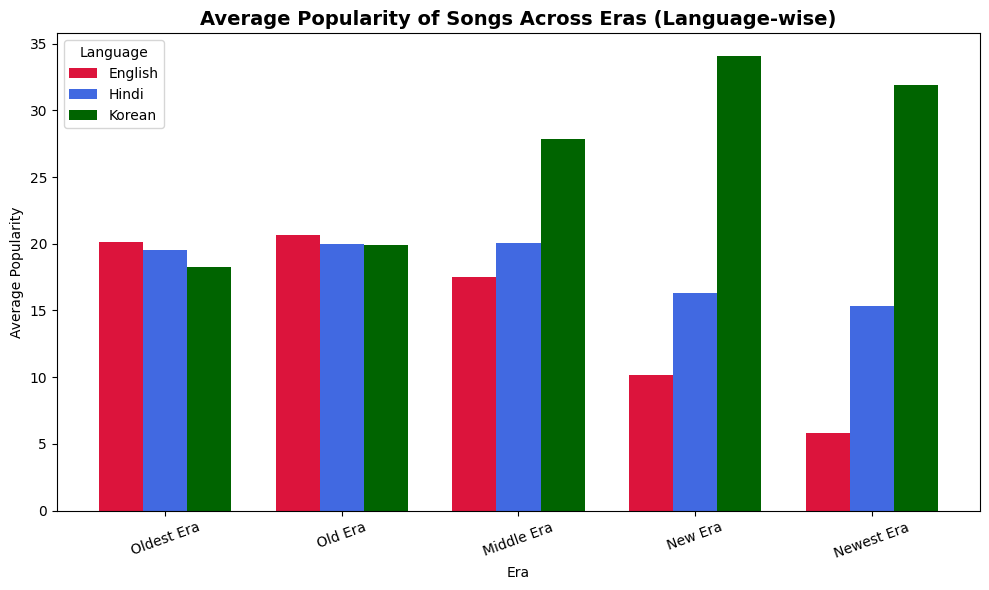

In [ ]:
# Define eras (5 bins) with duplicate handling
df["era"] = pd.qcut(
    df["year"],
    q=5,
    labels=["Oldest Era", "Old Era", "Middle Era", "New Era", "Newest Era"],
    duplicates="drop"
)

# Filter only the required languages
languages = ["english", "hindi", "korean"]
era_popularity = (
    df[df["language"].str.lower().isin(languages)]
    .groupby(["era", df["language"].str.lower()])["popularity"]
    .mean()
    .unstack(fill_value=0)
)

# Ensure consistent order
era_popularity = era_popularity.reindex(columns=["english", "hindi", "korean"], fill_value=0)

# Custom colors
colors = {"english": "#DC143C", "hindi": "#4169E1", "korean": "#006400"}

# Plot grouped bar chart
x = np.arange(len(era_popularity.index))
bar_width = 0.25

plt.figure(figsize=(10,6))
for i, lang in enumerate(era_popularity.columns):
    plt.bar(x + i*bar_width, era_popularity[lang], width=bar_width,
            color=colors[lang], label=lang.capitalize())

plt.xticks(x + bar_width, era_popularity.index, rotation=20)
plt.title("Average Popularity of Songs Across Eras (Language-wise)", fontsize=14, weight="bold")
plt.xlabel("Era")
plt.ylabel("Average Popularity")
plt.legend(title="Language")
plt.tight_layout()
plt.show()


**​Key Insight (Temporal Shift in Dominance):** There is a clear shift in which language group holds the highest average popularity over time.


​Historical: In the Oldest and Old Eras, English and Hindi tracks held the highest average popularity, generally clustered around 18 to 20.


​Modern: In the New and Newest Eras, Korean music has taken over, exhibiting the highest average popularity (peaking at 34 in the New Era). This confirms the finding that Korean music has been exceptionally successful and highly concentrated in recent times.


**​Key Insight (Decline of English):** The average popularity of English tracks shows a distinct decline across the Eras, dropping from 20 in the oldest period to 6 in the newest period.


**​Interpretation:** While English still generates the highest max popularity (as seen in earlier charts), its average popularity is falling rapidly. This validates the "Long Tail" effect within the English catalog: more tracks are being released, but most of them are gaining very little traction, dragging the average down.

**Popularity Share by Song Duration Category**

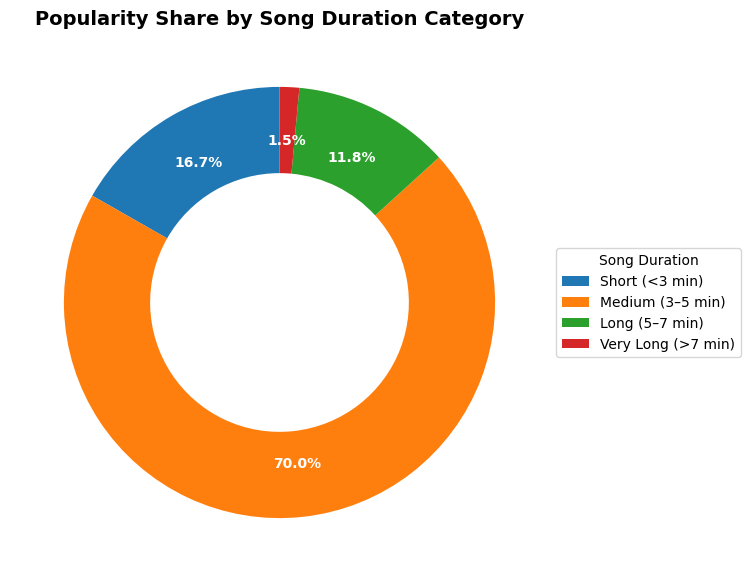

In [ ]:
# Define duration bins (in milliseconds)
bins = [0, 180000, 300000, 420000, float("inf")]  # <3 min, 3–5 min, 5–7 min, >7 min
labels = ["Short (<3 min)", "Medium (3–5 min)", "Long (5–7 min)", "Very Long (>7 min)"]

df["duration_category"] = pd.cut(df["duration_ms"], bins=bins, labels=labels, right=False)

# Calculate popularity share (with observed=True to avoid FutureWarning)
popularity_share = df.groupby("duration_category", observed=True)["popularity"].sum()

# Donut chart
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    popularity_share,
    labels=None,   # remove labels from inside pie
    autopct='%1.1f%%',
    pctdistance=0.75,   # keep percentages inside
    startangle=90,
    textprops={'fontsize': 10, 'weight': 'bold', 'color': 'white'},
    wedgeprops=dict(width=0.4)  # Makes it a donut
)

# Add legend for duration categories
plt.legend(
    wedges, popularity_share.index,
    title="Song Duration",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Popularity Share by Song Duration Category", fontsize=14, weight="bold")
plt.show()

**​Context**: This chart shows which duration categories account for the total accumulated popularity across the entire dataset.
​Medium Duration Dominance: The Medium (3-5 min) category drives the vast majority of all consumed popularity, accounting for a massive 70.0% share.


**​Insight**: This confirms that the industry standard track length is the economic backbone of the music market. Listeners overwhelmingly concentrate their consumption on tracks within this traditional pop/radio window.
​Short Duration's Role: Short (<3 min) tracks hold the next largest share at 16.7%.
​Insight: This relatively large share highlights the impact of platforms that favor short-form content and the effectiveness of modern short singles.
​Long-Form Penalty: Long (5-7 min) tracks account for a modest 11.8%, and Very Long (>7 min) tracks account for a negligible 1.5%.
​Insight: This demonstrates a definitive consumption penalty for long-form music. Tracks exceeding 5 minutes, and especially 7 minutes, hold a disproportionately tiny share of overall popularity, regardless of their content.

**Top 1% Songs by Language (Popularity Share)**

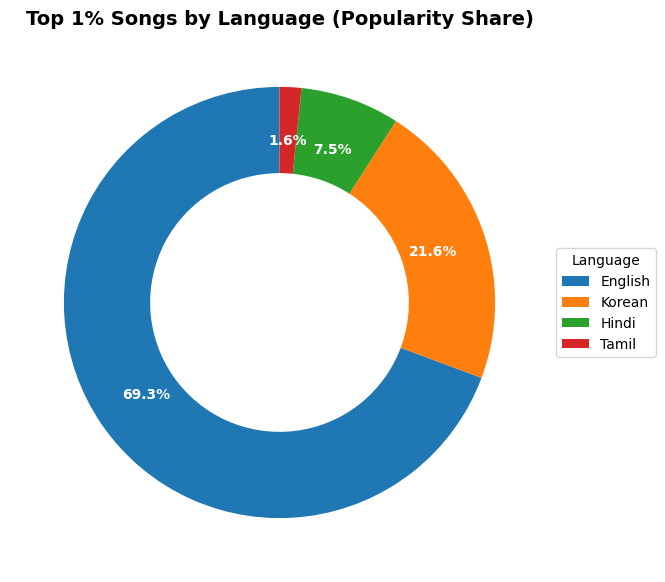

In [ ]:
# Find the cutoff for top 1% songs by popularity
cutoff = df["popularity"].quantile(0.99)

# Filter top 1% songs
top_1_percent = df[df["popularity"] >= cutoff]

# Popularity share by language
lang_share = top_1_percent.groupby("language")["popularity"].sum().sort_values(ascending=False)

# Donut chart
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    lang_share,
    labels=None,   # keep labels outside via legend
    autopct='%1.1f%%',
    pctdistance=0.75,   # percentages inside
    startangle=90,
    textprops={'fontsize': 10, 'weight': 'bold', 'color': 'white'},
    wedgeprops=dict(width=0.4)  # donut effect
)

# Add legend
plt.legend(
    wedges, lang_share.index,
    title="Language",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Top 1% Songs by Language (Popularity Share)", fontsize=14, weight="bold")
plt.show()

**​Context:** This chart shows which languages account for the total accumulated popularity within the Top 1% of the entire dataset.
​English Dominance: English overwhelmingly accounts for the largest share, driving 69.3% of the popularity of all top 1% songs.


**​Insight:** This reinforces English's status as the global currency for elite music success. The highest-performing hits are disproportionately in English, far exceeding its general proportion in the full dataset.

​Korean Performance: Korean music drives the second-largest share at 21.6%.
​Insight: Given Korean's smaller overall volume compared to English and Tamil (from earlier analysis), this 21.6\% share is extremely high-leverage. It confirms the explosive global popularity and high hit-making efficiency of Korean music in this dataset.

​Minimal Contribution: Hindi (7.5%) and Tamil (1.6%) combine for less than 10% of the top 1% popularity share.


**​Insight**: Since, English is the global language, English songs have an unfair advantage of having a readily available group of listeners in every corner of the world. Here, the unusual success of Korean songs makes them the most important study elements for music producers and mixing engineers.

##**13. Recommendation for the mixing engineer supported by insight**


**1. Core Track Structure**

Keep duration in the 3–5 min sweet spot; avoid extremes.
Target tempo range: 80–200 BPM, balancing radio-friendly and energetic pacing.

**2. Sound & Energy Profile**

Mix for moderate-to-high energy and danceability (0.5–0.8).
Favor digital/electronic textures; minimize excessive acousticness.
Maintain loudness clarity with dynamic control—energy should feel strong but not distorted.

**3. Emotional & Creative Factors**

Both happy (high valence) and sad (low valence) songs can succeed; focus on mix quality over mood.

Experiment with genre fusions—cross-style collaborations often yield standout tracks.

**4. Market & Audience Orientation**

English remains dominant, but K-pop and Hindi show rapid growth—adapt mixing aesthetics accordingly.

Solo tracks perform slightly better on average, but international collaborations create global hits.

**Market & Language Insights :**

Top 1% Songs by Language: English (69.3%) dominates, Korean (21.6%) rising, Hindi (7.5%) and Tamil (1.6%) smaller shares.
Popularity by Language: English highest median (approx 62), others lower (8–30).
Energy by Language: Korean highest (approx 0.8), English lowest median (approx 0.5).
Tempo by Language: Stable medians around 115–125 BPM, Malayalam peaked at ~145 BPM (2000s).
Danceability by Language: All languages stable (approx 0.6–0.7).
Valence by Language: Tamil highest (approx 0.7), English lowest (approx 0.4).

**Top-N Analysis (Artists & Tracks) :**

Chainsmokers: 2 collabs in global top 3 one-hit wonders  cross-collaboration success.
Justin Bieber: Featured in 3 top one-hit wonders - frequent collaborator pattern.
Hindi One-Hit Wonders: 9 of top 10 from films; Sachin-Jigar appear 3 times, Arijit Singh in 4 songs.
Top Artists by Albums: Justin Bieber & Maroon 5 lead with 550+ albums; Bruno Mars follows with 420.
Longest Careers: Billy Joel & Alan Silvestri ~53 years; Madonna 41 years; Ilaiyaraaja multiple appearances.
Most Songs in Top 10% Popularity: Taylor Swift dominates with 330+ songs; 5 K-pop groups in top 10.
Song Duration Popularity (Top 1%): Medium (3–5 min) = 70%, Short = 16.7%, Long = ~13%.

**Time Series Insights for Mixing Engineers**

**1. Track Releases & Growth**

English: Explosive rise from ~900 (2019) to 3,300+ songs (2025) - dominant production volume.
Hindi: Minimal for decades, but sharp surge post-2023, reaching 1,100+ songs.
Korean: Grew from near zero (2010) to 600–700 songs (2025) - reflects K-pop’s global boom.
Overall: 2019–2020 = inflection point across languages due to digital platforms

**2. Popularity Trends Over Time**

Maximum Popularity: Climbed from ~52 (1970) to ~93 (2025), but with high volatility (50–90).
Median Popularity: Peaked ~46 (mid-1970s), collapsed below 10 in 1980s, stayed low (5–20) since.
Minimum Popularity: Fell near-zero after 1976, stayed at 0–1 for 50+ years.
Pattern: Rising inequality - few mega-hits dominate, while most songs remain obscure.

**3. Music Feature Evolution**

Acousticness: Shift from mostly acoustic (1970s) to mostly electronic/digital (2000s onwards).
Danceability: Stable over 50 years (~0.6).
Energy: Significant rise post-2000 → songs became more intense and energetic.

**4. Collaboration Trends by Language**

Hindi: 100% collaborations (2003–2007), then solos dominated; recently (2023–2024) collabs surged again to 85–92%.
English: Predominantly solos until 1990s (95–100%), then collabs rose to 40–50% in 2019–2024.
Korean: Consistently solo (95–100%), tiny rise to ~10–12% collabs in 2023–2024.
Tamil: Opposite trend—65–100% collabs (1976–2010), then flipped to 70–100% solos post-2015.

**5. Changing Correlations with Popularity**

Danceability vs Popularity: Strong in 1970s (0.77), now near zero.
Duration vs Popularity: Strong in 1970s (0.81), now near zero.
Energy vs Popularity: Moderate in 1970s (0.67), still slightly positive today.

**6. Outliers & Distributions**

Danceability: Bell curve centered at ~0.6.
Valence: Normal distribution around ~0.45 (slightly negative lean).
Liveness & Speechiness: Heavily skewed low → most songs are studio-recorded, not speech-heavy.
Popularity: Right-skewed, top cluster ~70–73 → only a few tracks achieve high success.

**Future Work Directions:**

**1. User Listening Behaviors**

Study how listeners engage with tracks over time.

**2. Recommendation System Development**

Build smarter systems using feature relationships.

**3. Exploring Lyrics Aspects**

Extend analysis beyond audio to lyrical content.